In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris


In [2]:
# First, let's install necessary packages
!pip install pandas numpy matplotlib seaborn plotly cufflinks scikit-learn statsmodels missingno yellowbrick pingouin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import cufflinks as cf
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import missingno as msno
from yellowbrick.cluster import KElbowVisualizer
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')

# Set up plotting styles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
cf.go_offline()

print("All packages imported successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.3 MB/s eta 0:00:00


All packages imported successfully!


In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset and convert to DataFrame
iris_raw = load_iris(as_frame=True)
iris = iris_raw.frame
iris['species'] = iris_raw.target_names[iris_raw.target]


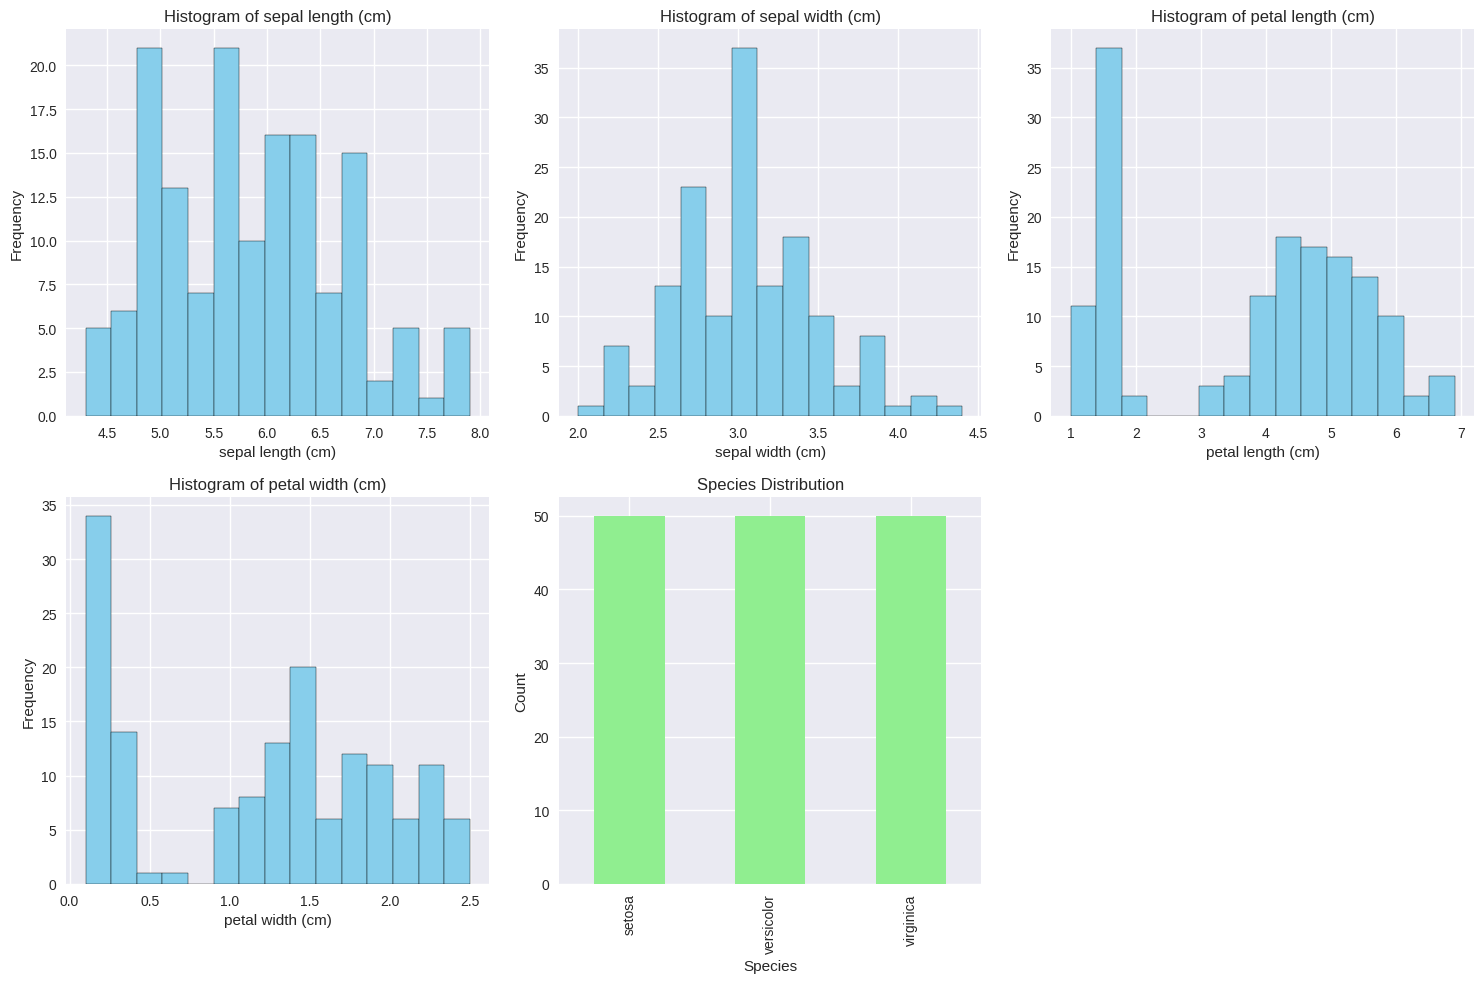

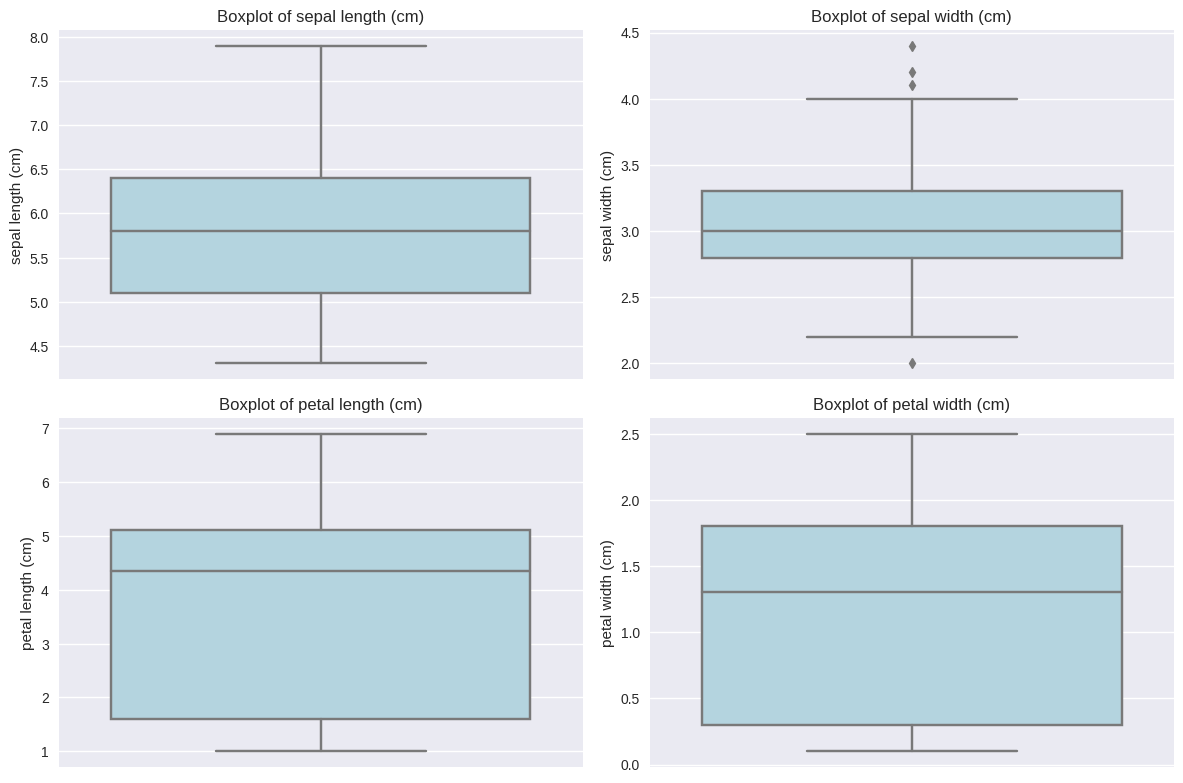

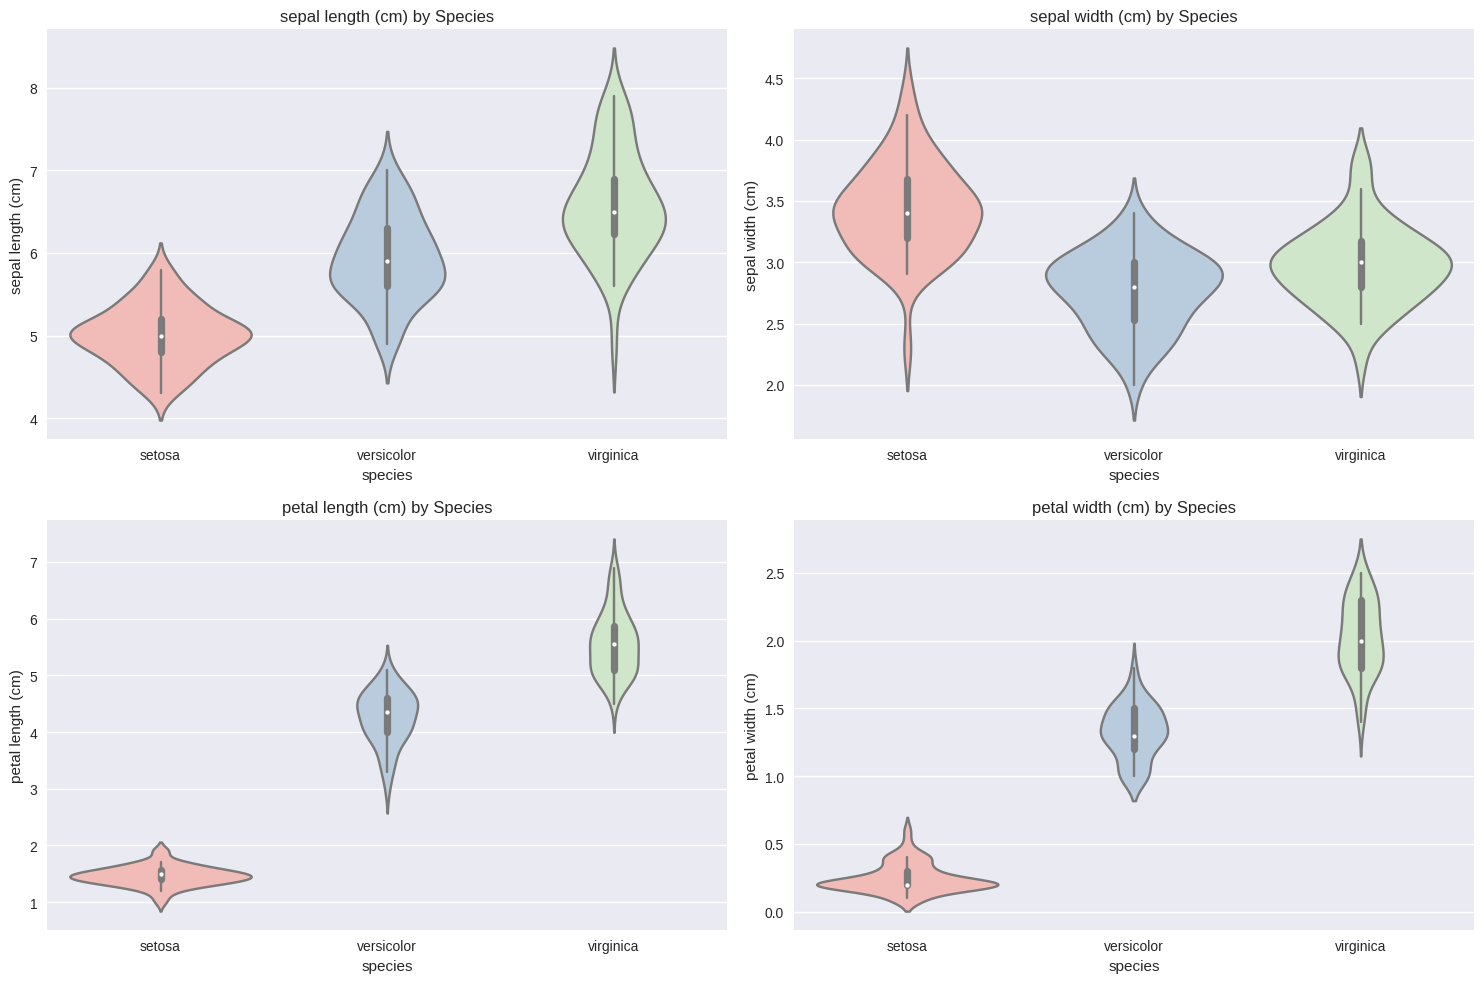

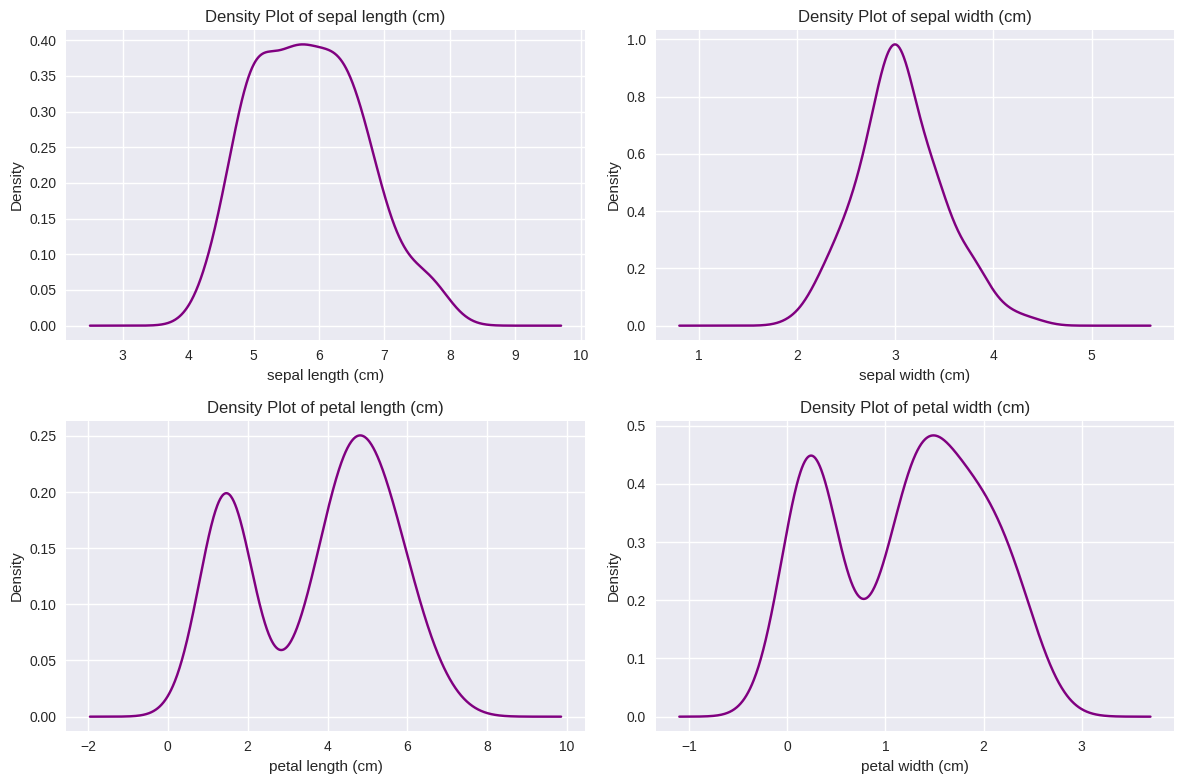

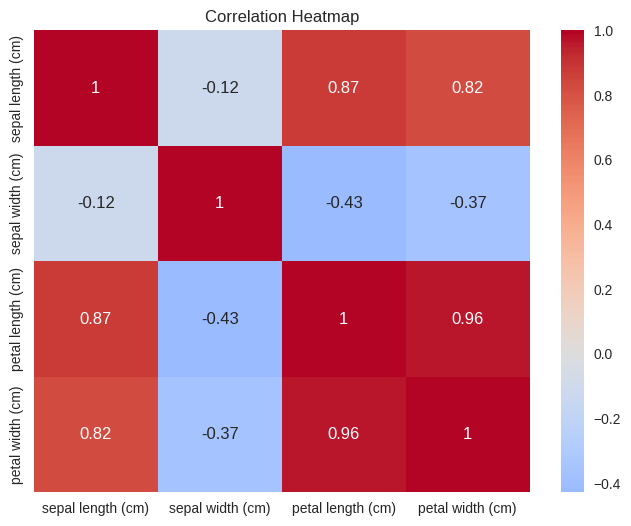

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming iris dataset is loaded
from sklearn.datasets import load_iris
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

# ------------------- Plot  Histograms + Species Distribution -------------------
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # flatten for easier indexing

# Histograms for each feature
for i, col in enumerate(iris.columns[:-1]):
    iris[col].hist(ax=axes[i], bins=15, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Species distribution (last plot)
iris['species'].value_counts().plot(kind='bar', ax=axes[4], color='lightgreen')
axes[4].set_title('Species Distribution')
axes[4].set_xlabel('Species')
axes[4].set_ylabel('Count')

# Turn off unused subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# ------------------- Plot : Boxplots -------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(iris.columns[:-1]):
    sns.boxplot(y=iris[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# ------------------- Plot : Violin Plots by Species -------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(iris.columns[:-1]):
    sns.violinplot(x='species', y=col, data=iris, ax=axes[i], palette='Pastel1')
    axes[i].set_title(f'{col} by Species')

plt.tight_layout()
plt.show()

# ------------------- Plot : Density Plots -------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(iris.columns[:-1]):
    iris[col].plot.density(ax=axes[i], color='purple')
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# ------------------- Plot : Correlation Heatmap -------------------
plt.figure(figsize=(8, 6))
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


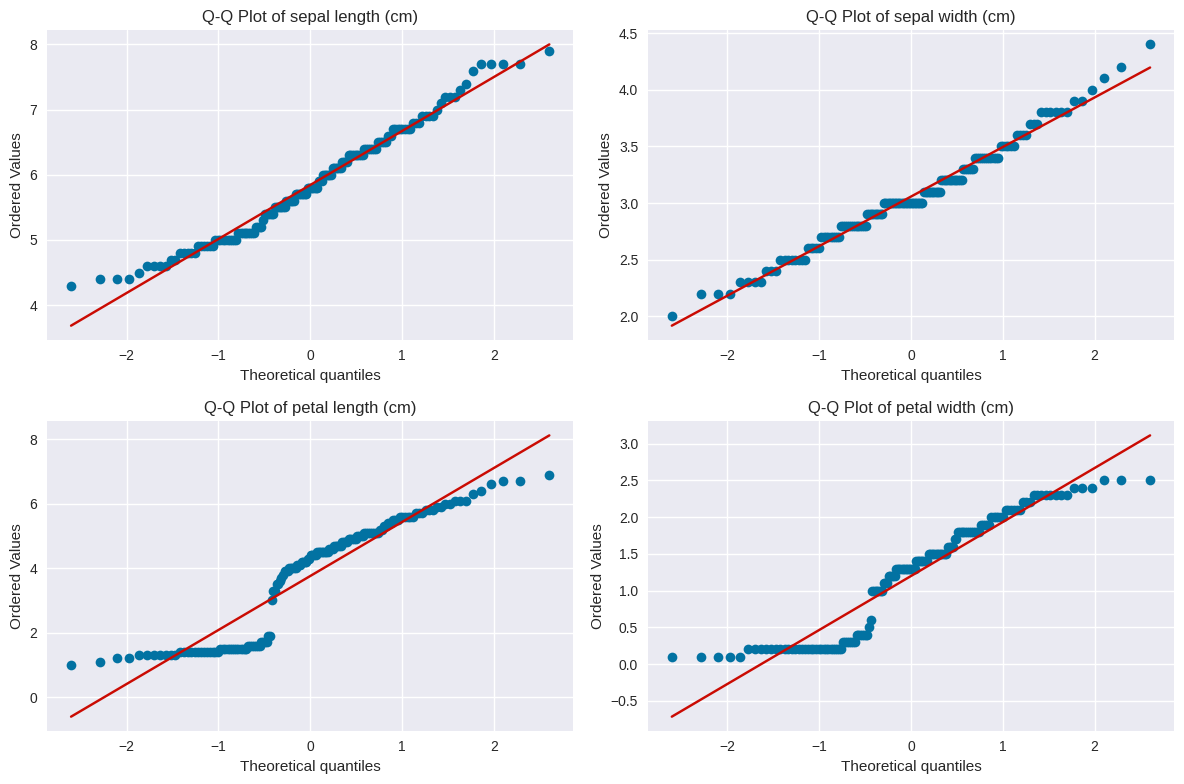

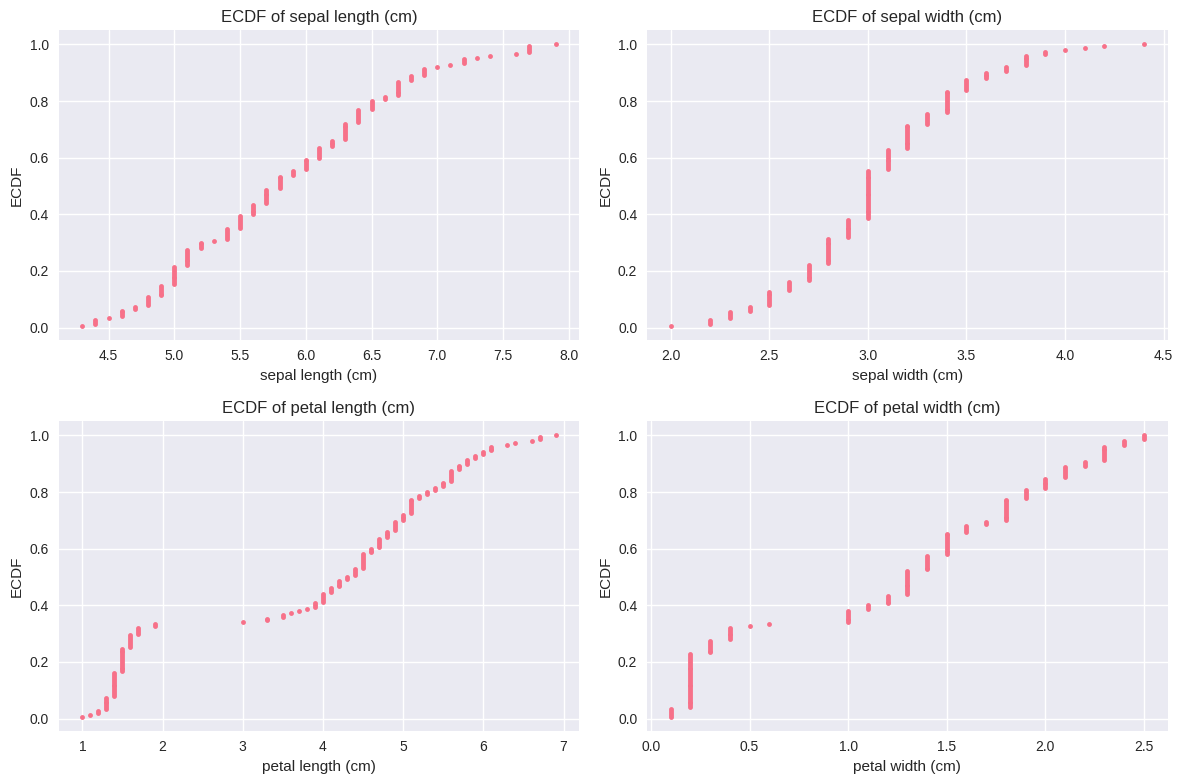

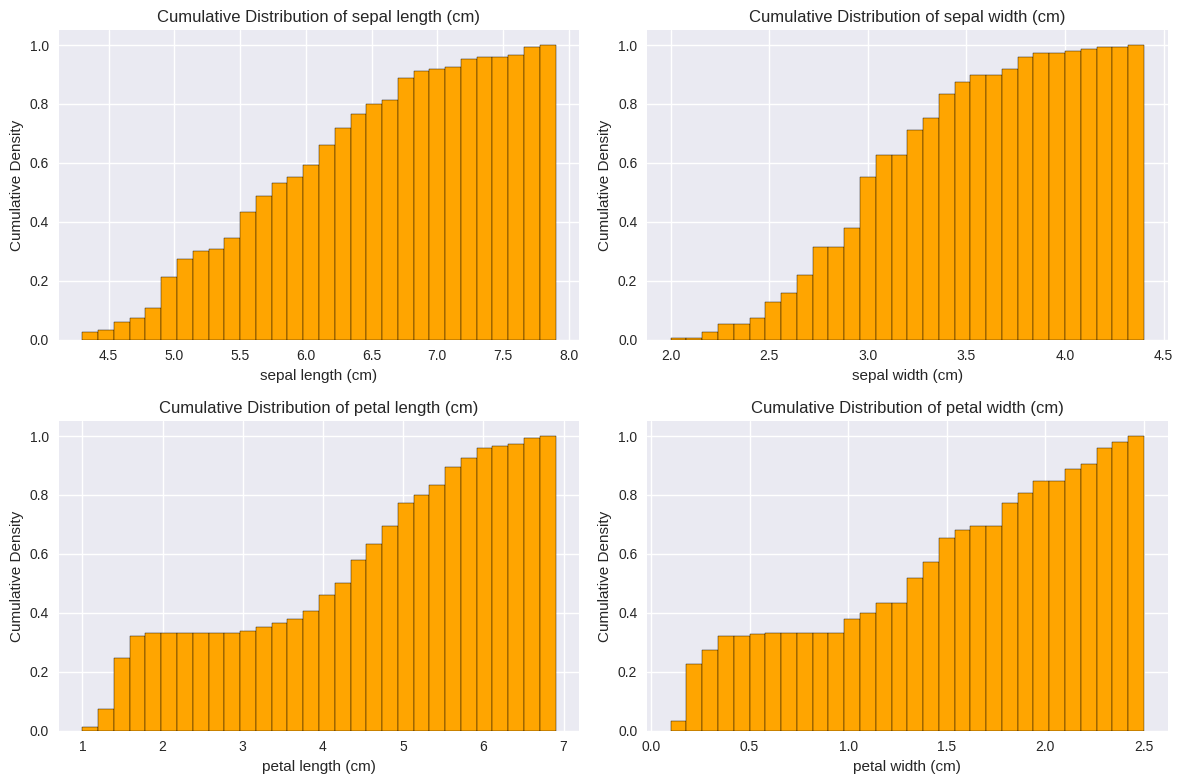

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ------------------- Plot  : Q-Q Plots -------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # flatten axes for simple linear indexing

for i, col in enumerate(iris.columns[:-1]):
    stats.probplot(iris[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

# ------------------- Plot : ECDF Plots -------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(iris.columns[:-1]):
    x = np.sort(iris[col])
    y = np.arange(1, len(x)+1) / len(x)
    axes[i].plot(x, y, marker='.', linestyle='none')
    axes[i].set_title(f'ECDF of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('ECDF')

plt.tight_layout()
plt.show()

# ------------------- Plot : Cumulative Distribution -------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(iris.columns[:-1]):
    iris[col].hist(cumulative=True, density=True, bins=30, ax=axes[i], color='orange', edgecolor='black')
    axes[i].set_title(f'Cumulative Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Cumulative Density')

plt.tight_layout()
plt.show()


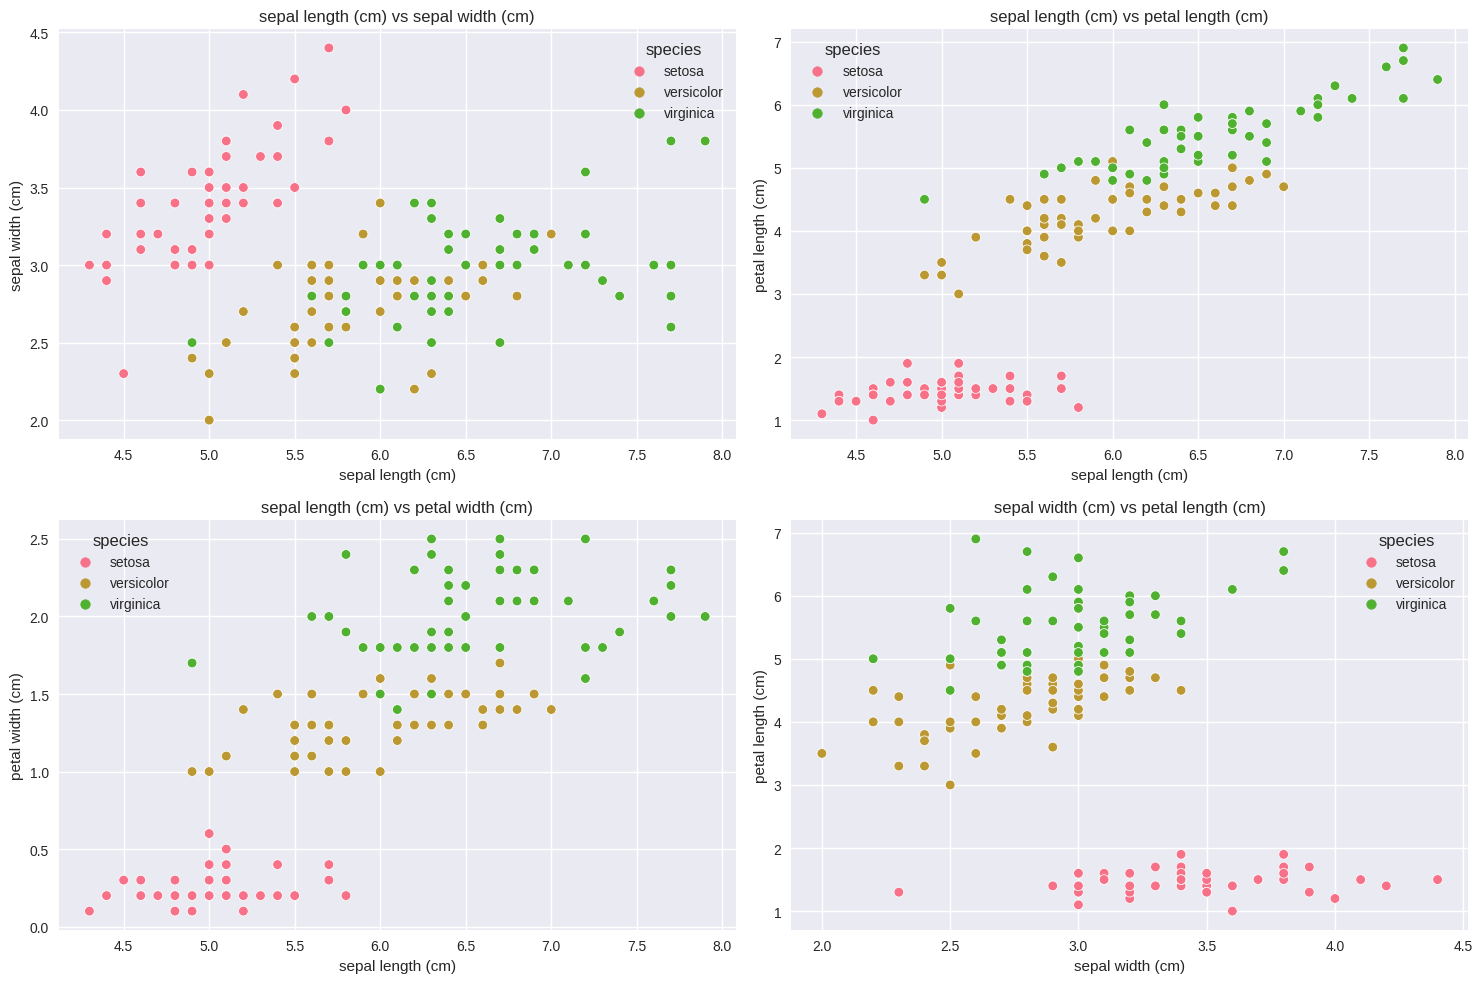

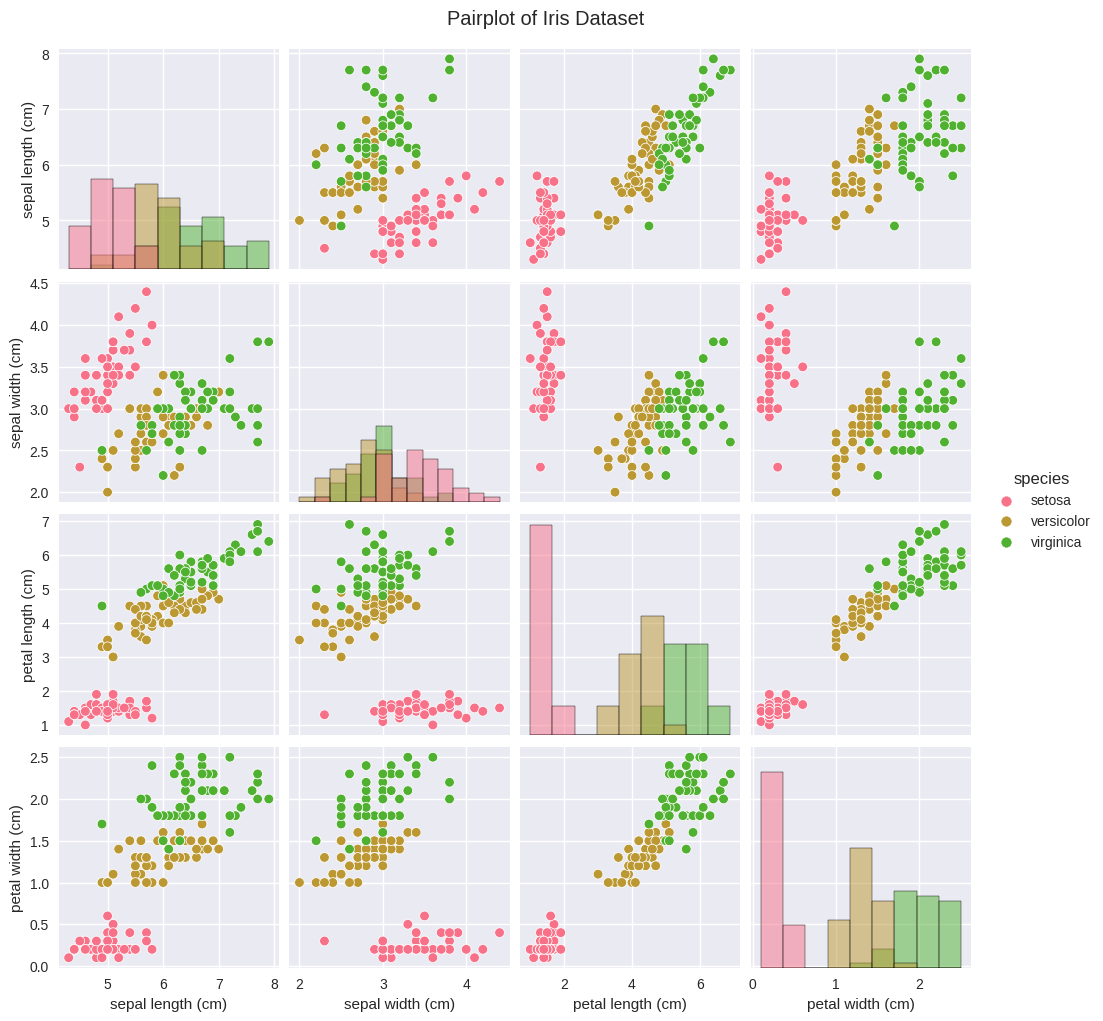

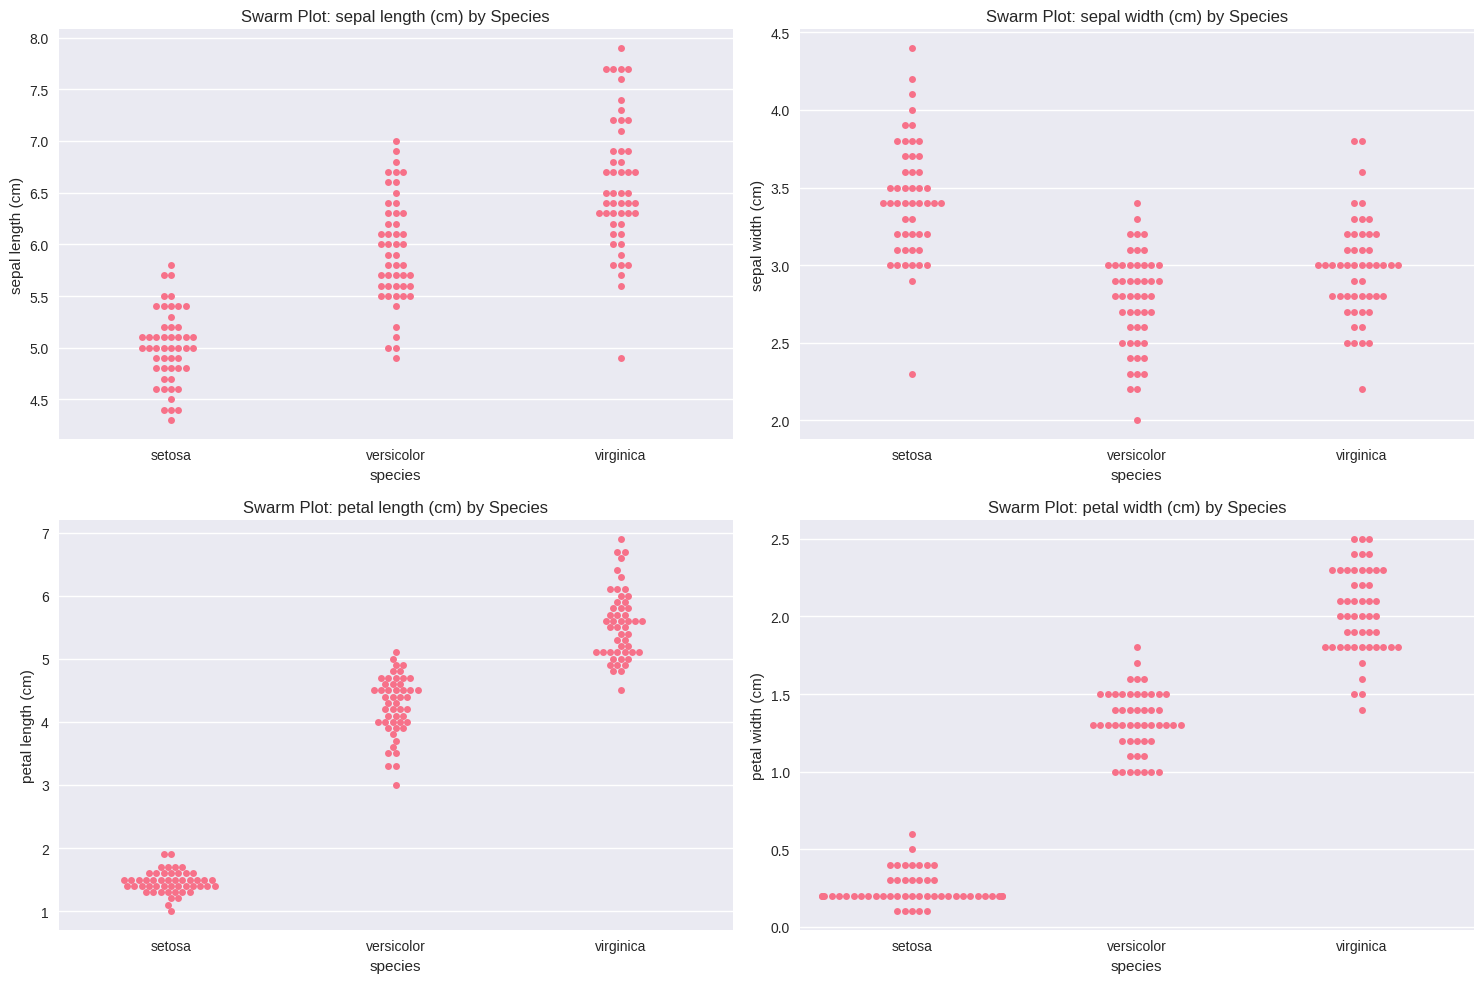

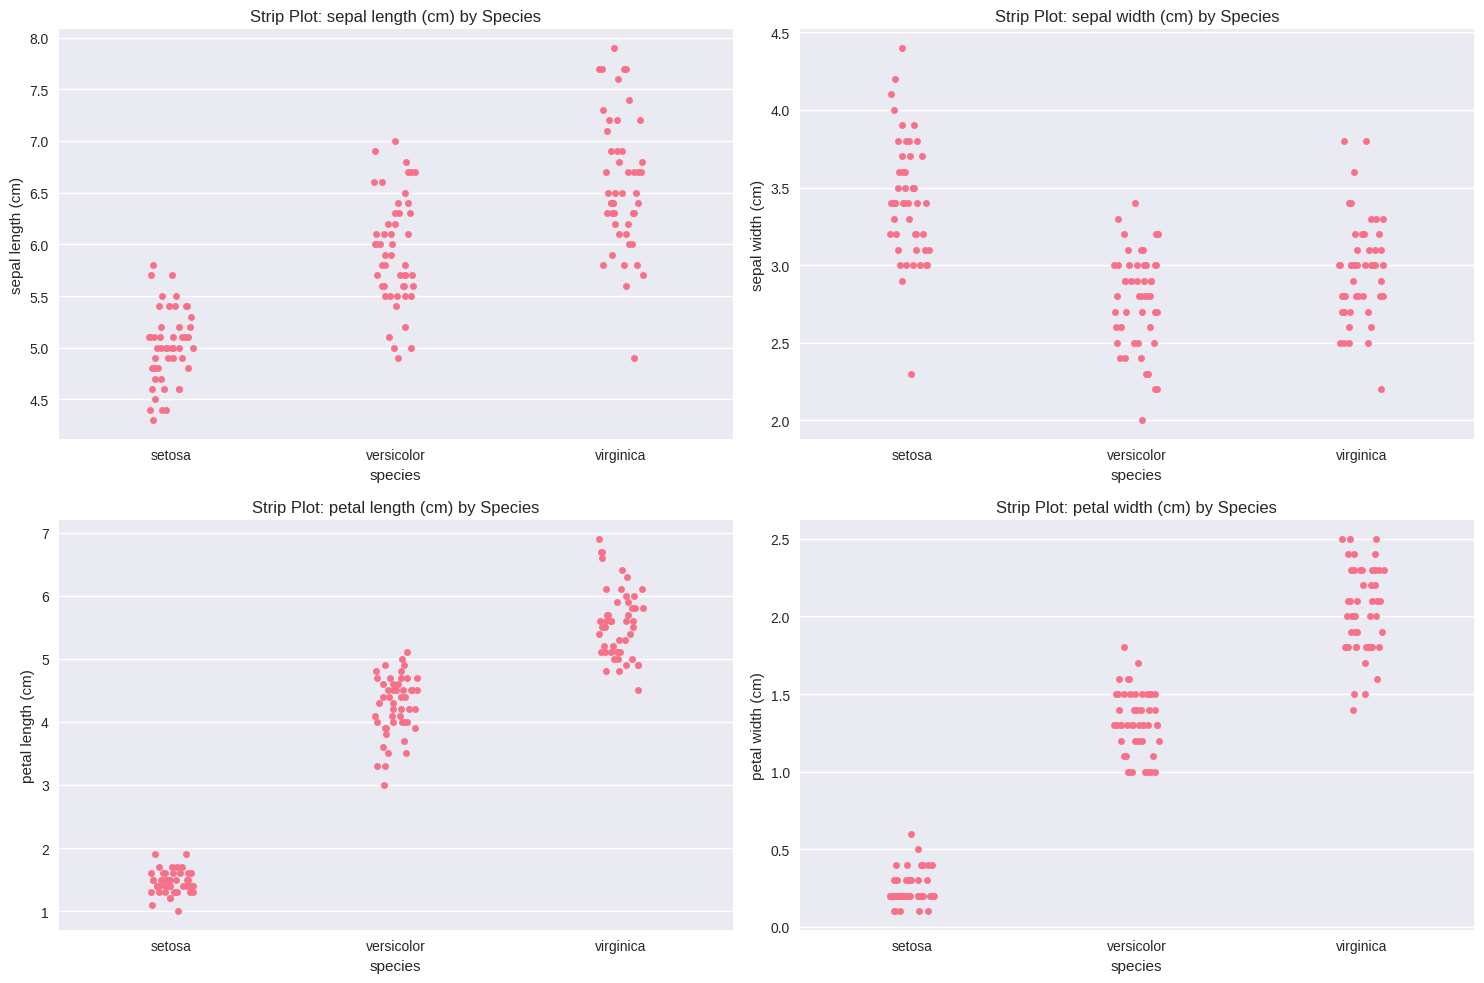

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = iris.columns[:-1]

# ------------------- Plot : Scatter Plots (Pairwise comparisons, limited) -------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
plot_idx = 0
for i in range(len(features)):
    for j in range(i+1, len(features)):
        if plot_idx < 4:  # Limit to 4 plots
            sns.scatterplot(data=iris, x=features[i], y=features[j], hue='species', ax=axes[plot_idx])
            axes[plot_idx].set_title(f'{features[i]} vs {features[j]}')
            plot_idx += 1

plt.tight_layout()
plt.show()

# ------------------- Plot : Pairplot -------------------
sns.pairplot(iris, hue='species', diag_kind='hist')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

# ------------------- Plot : Swarm Plots -------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.swarmplot(x='species', y=col, data=iris, ax=axes[i])
    axes[i].set_title(f'Swarm Plot: {col} by Species')

plt.tight_layout()
plt.show()

# ------------------- Plot : Strip Plots -------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.stripplot(x='species', y=col, data=iris, jitter=True, ax=axes[i])
    axes[i].set_title(f'Strip Plot: {col} by Species')

plt.tight_layout()
plt.show()


ANOVA for sepal length (cm): F=119.265, p=1.670e-31
ANOVA for sepal width (cm): F=49.160, p=4.492e-17
ANOVA for petal length (cm): F=1180.161, p=2.857e-91
ANOVA for petal width (cm): F=960.007, p=4.169e-85


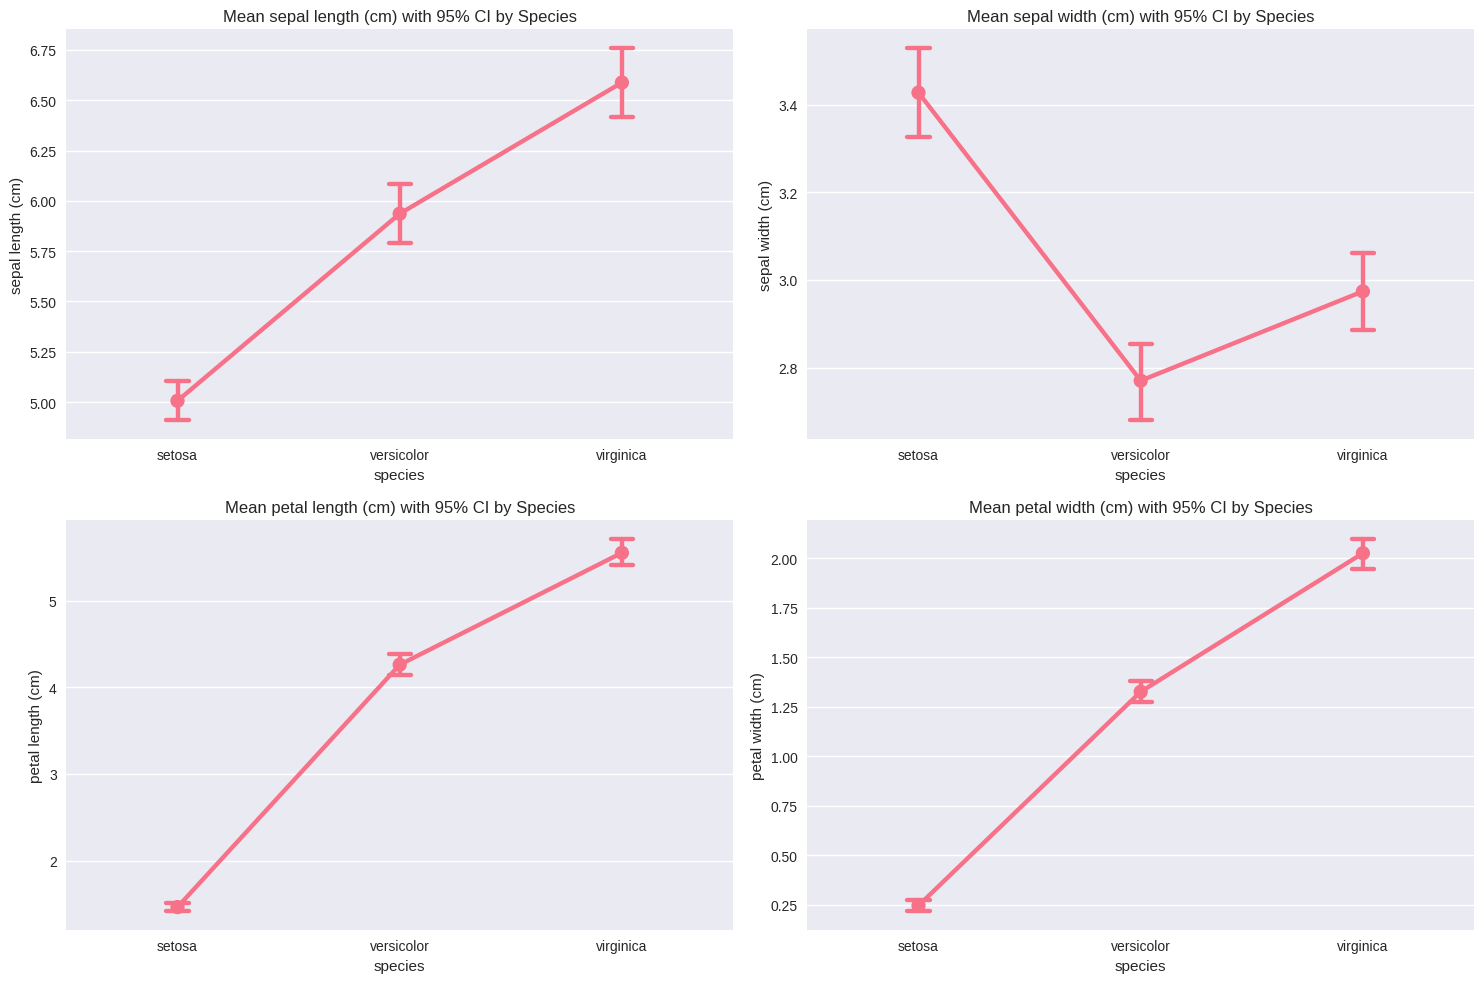

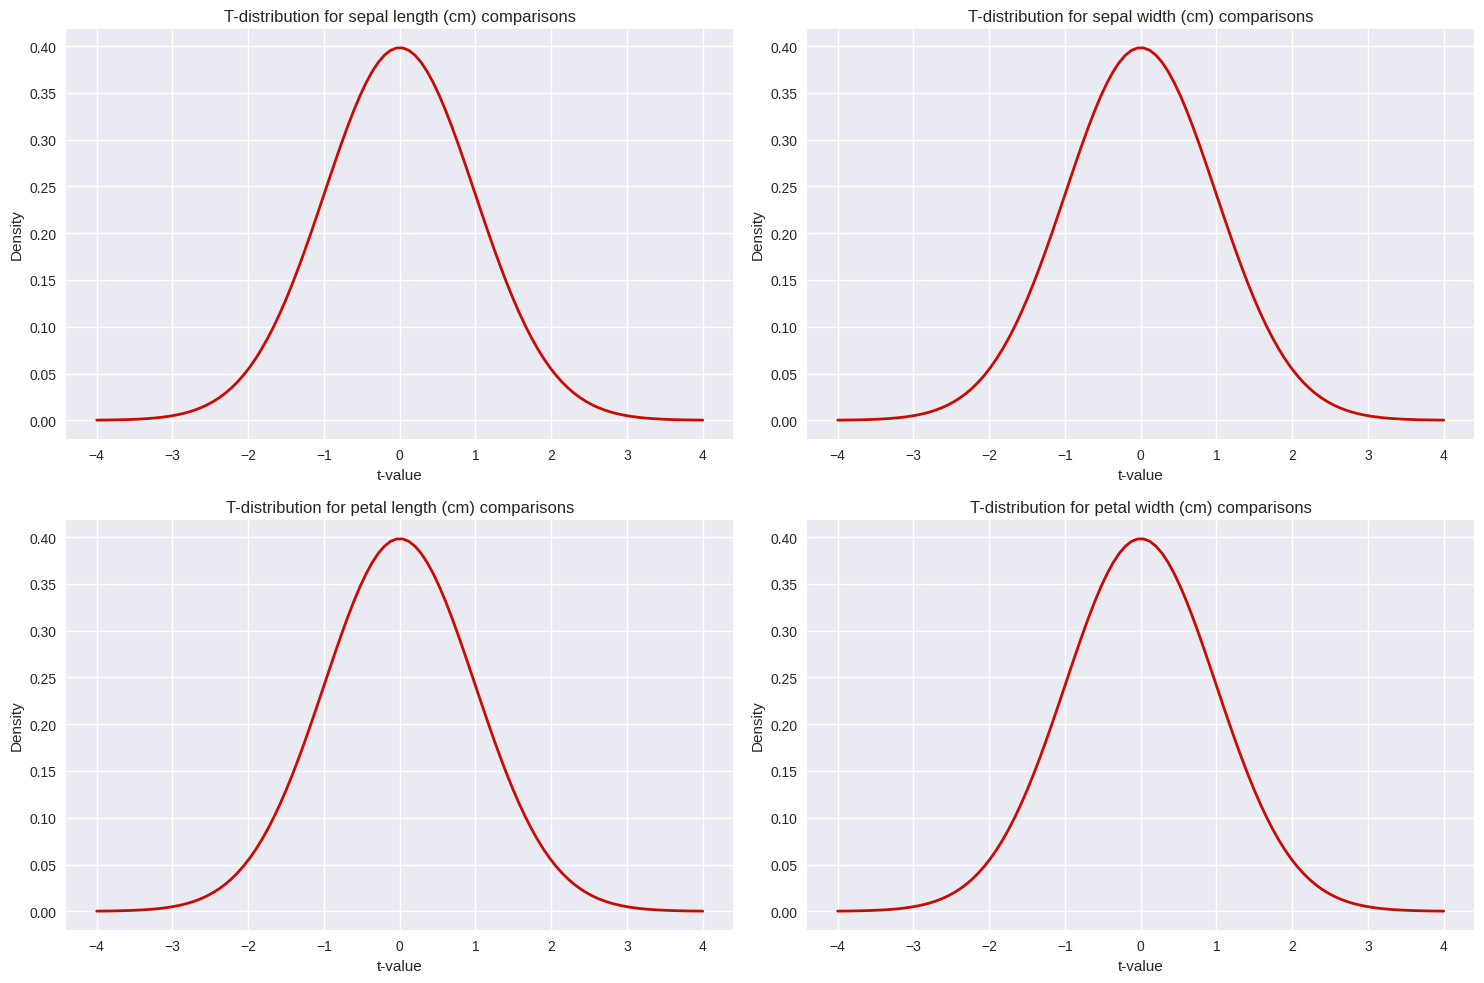

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

features = iris.columns[:-1]

# ------------------- Plot : ANOVA (Example) -------------------
# Perform one-way ANOVA for each feature
for col in features:
    groups = [iris[iris['species'] == species][col] for species in iris['species'].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f'ANOVA for {col}: F={f_stat:.3f}, p={p_val:.3e}')

# ------------------- Plot : Confidence Intervals -------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  

for i, col in enumerate(features):
    sns.pointplot(x='species', y=col, data=iris, capsize=0.1, ax=axes[i])
    axes[i].set_title(f'Mean {col} with 95% CI by Species')

plt.tight_layout()
plt.show()

# ------------------- Plot : T-test Distributions -------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

species_pairs = [('setosa', 'versicolor'), 
                 ('setosa', 'virginica'),
                 ('versicolor', 'virginica')]

for i, col in enumerate(features):
    # For demonstration, plot a generic t-distribution
    x = np.linspace(-4, 4, 100)
    y = stats.t.pdf(x, df=len(iris)-2)
    axes[i].plot(x, y, 'r-', lw=2)
    axes[i].set_title(f'T-distribution for {col} comparisons')
    axes[i].set_xlabel('t-value')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


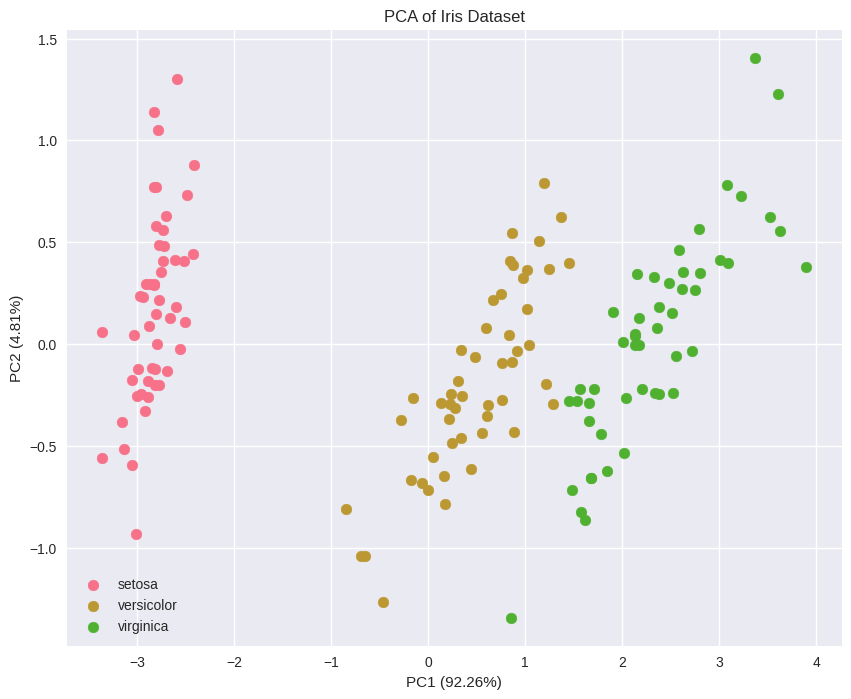

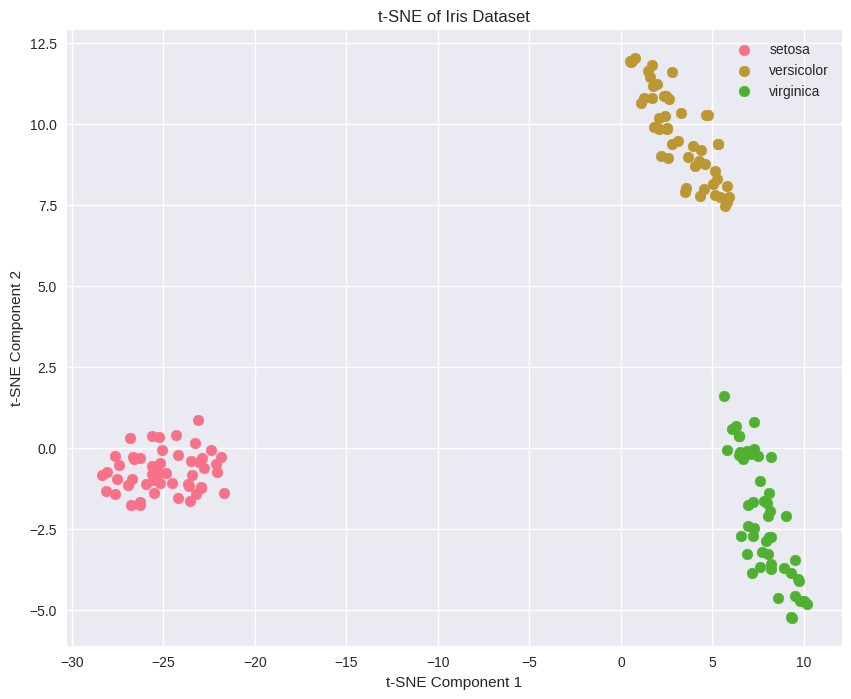

In [ ]:
# 6. DIMENSIONALITY REDUCTION PLOTS (10 plots)

# Prepare data for PCA and t-SNE
X = iris.iloc[:, :-1]
y = iris['species']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Plot : PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
for species in iris['species'].unique():
    mask = iris['species'] == species
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=species, s=60)
plt.xlabel('PC1 ({}%)'.format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('PC2 ({}%)'.format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

# Plot : PCA 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = px.scatter_3d(x=X_pca_3d[:, 0], y=X_pca_3d[:, 1], z=X_pca_3d[:, 2],
                    color=iris['species'],
                    title='3D PCA of Iris Dataset',
                    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'})
fig.show()

# Plot : t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
for species in iris['species'].unique():
    mask = iris['species'] == species
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=species, s=60)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Iris Dataset')
plt.legend()
plt.show()

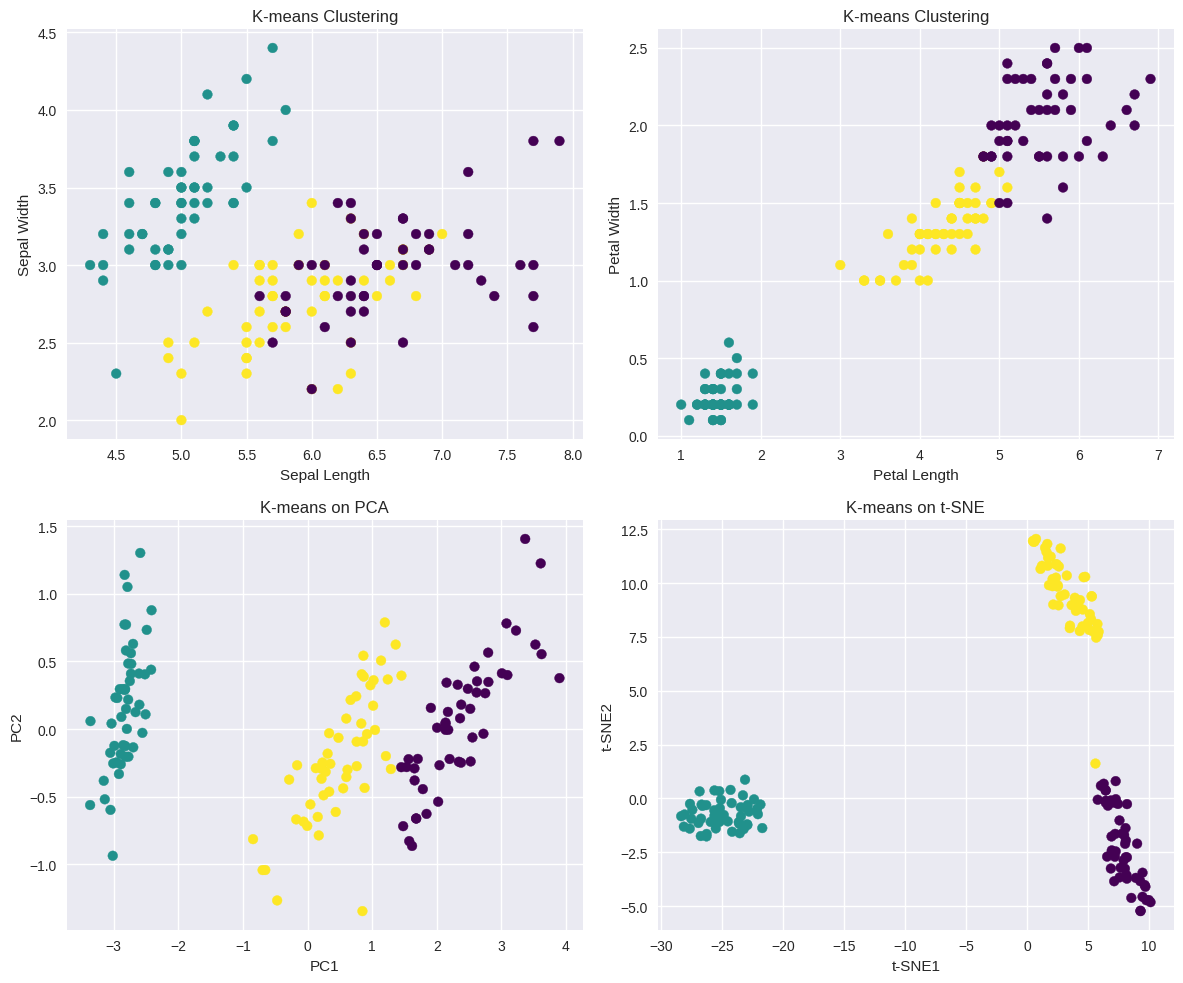

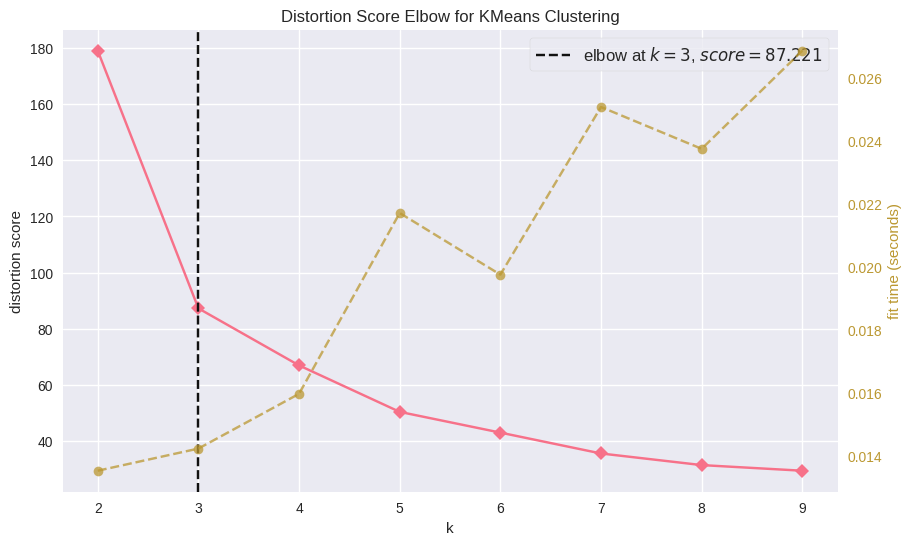

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#  CLUSTERING ANALYSIS PLOTS (10 plots)

# Plot : K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering')

plt.subplot(2, 2, 2)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=clusters, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-means Clustering')

plt.subplot(2, 2, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means on PCA')

plt.subplot(2, 2, 4)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('K-means on t-SNE')

plt.tight_layout()
plt.show()

# Plot : Elbow method for optimal clusters
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X)
visualizer.show()

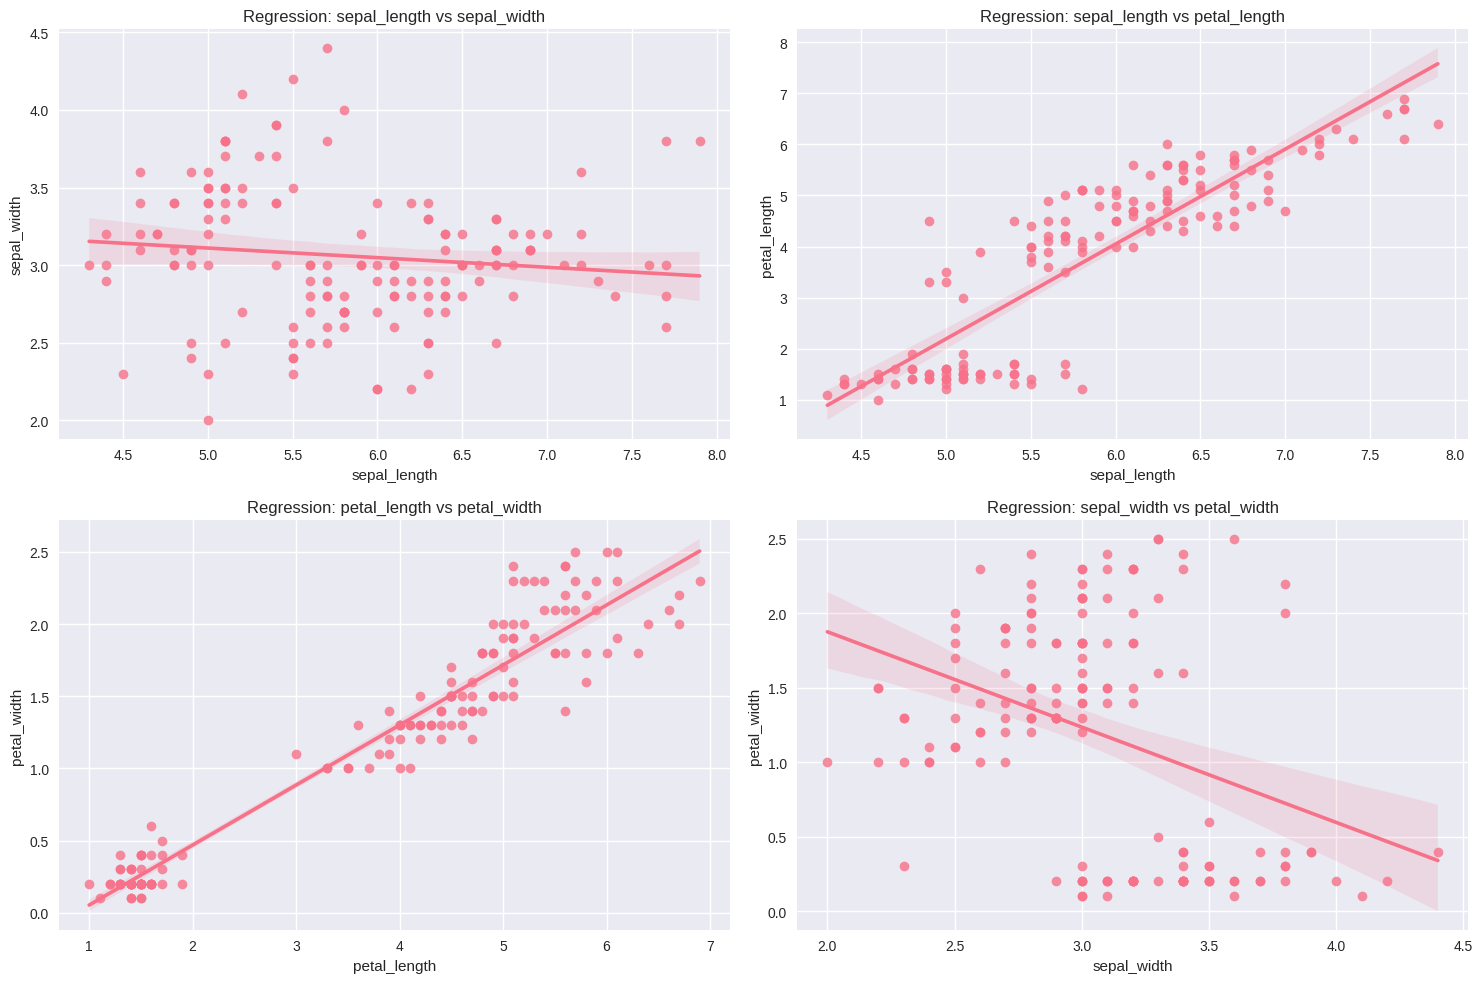

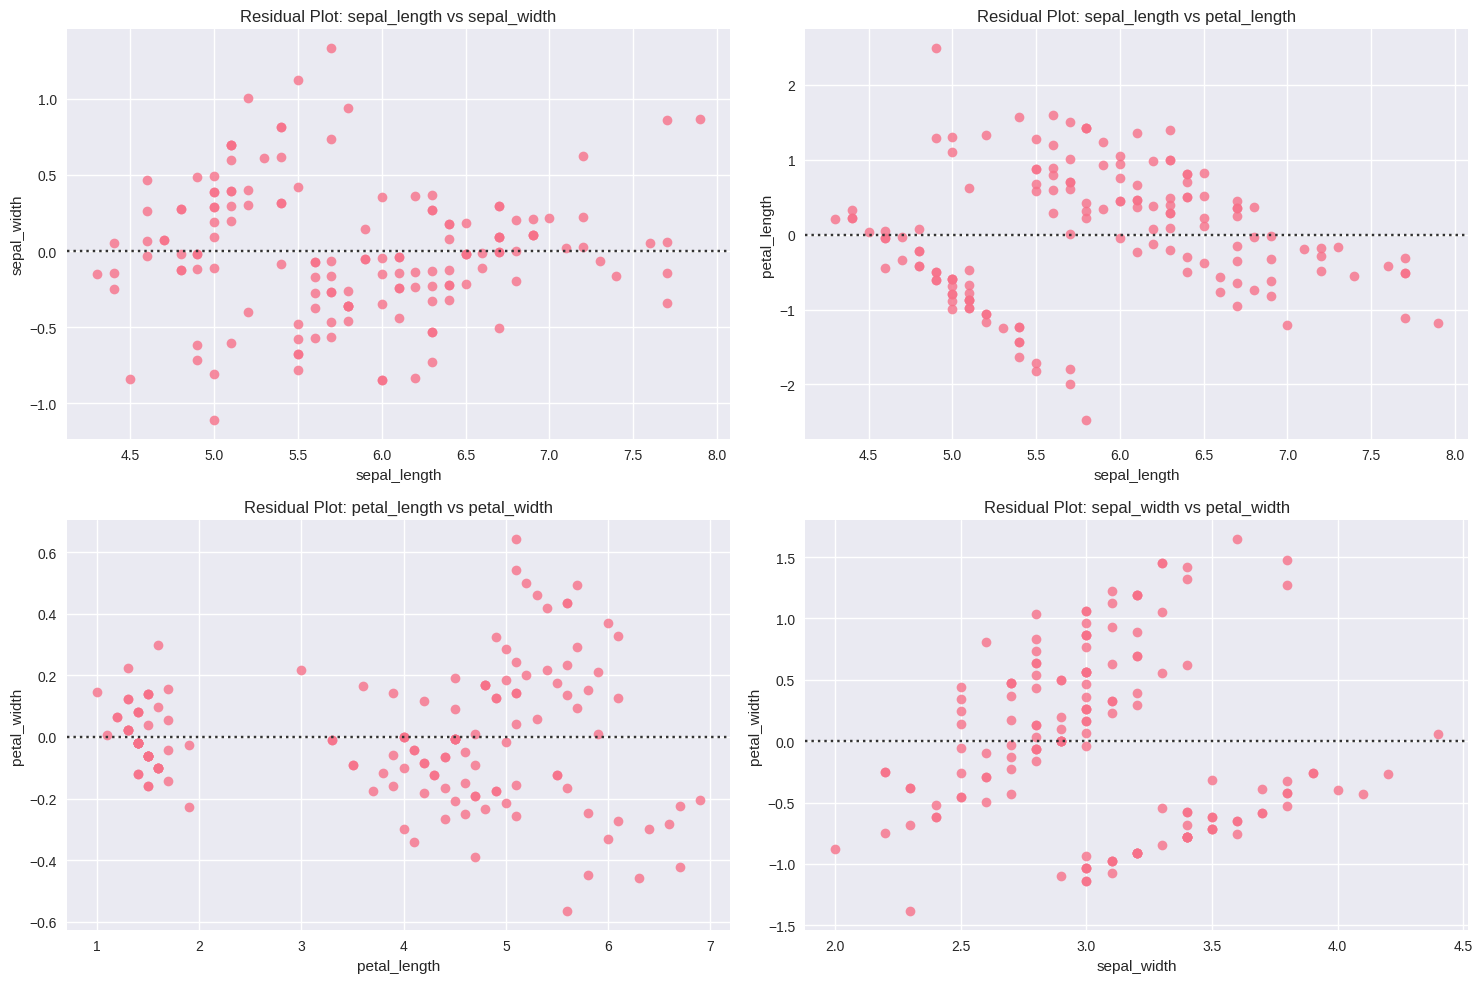

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns for convenience
iris_rename = iris.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
})

# ------------------- Plot : Regression Plots -------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

feature_pairs = [('sepal_length', 'sepal_width'), 
                 ('sepal_length', 'petal_length'),
                 ('petal_length', 'petal_width'),
                 ('sepal_width', 'petal_width')]

for i, (x_col, y_col) in enumerate(feature_pairs):
    sns.regplot(x=x_col, y=y_col, data=iris_rename, ax=axes[i])
    axes[i].set_title(f'Regression: {x_col} vs {y_col}')

plt.tight_layout()
plt.show()

# ------------------- Plot : Residual Plots -------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(feature_pairs):
    sns.residplot(x=x_col, y=y_col, data=iris_rename, ax=axes[i])
    axes[i].set_title(f'Residual Plot: {x_col} vs {y_col}')

plt.tight_layout()
plt.show()


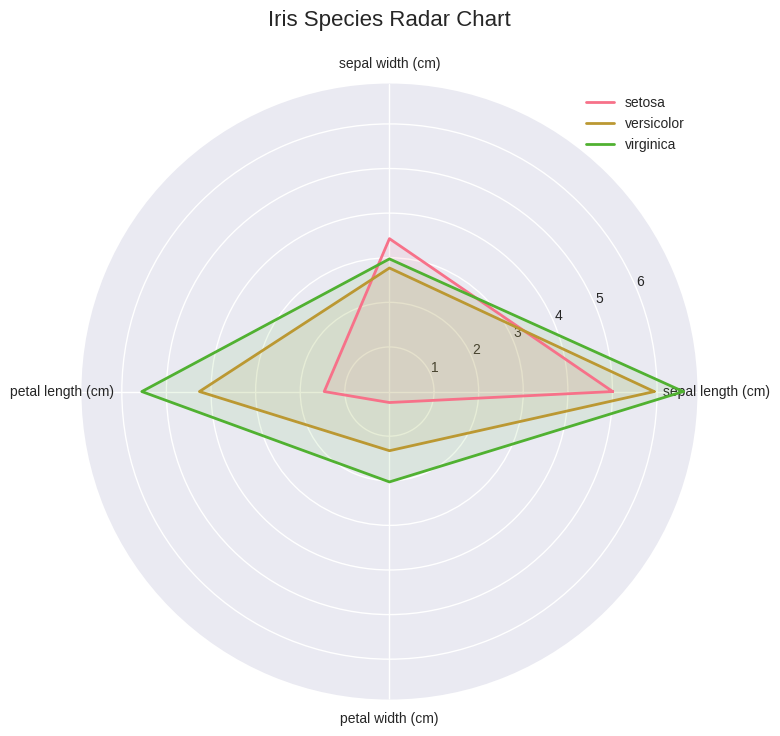

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def create_radar_chart(data, title):
    # Only numeric columns
    numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
    categories = numeric_cols
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # complete the loop
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    
    for species in data['species'].unique():
        values = data[data['species'] == species][numeric_cols].mean().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=species)
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(title, size=16, y=1.08)
    ax.legend(loc='upper right')
    
    return fig

radar_fig = create_radar_chart(iris, 'Iris Species Radar Chart')
plt.show()


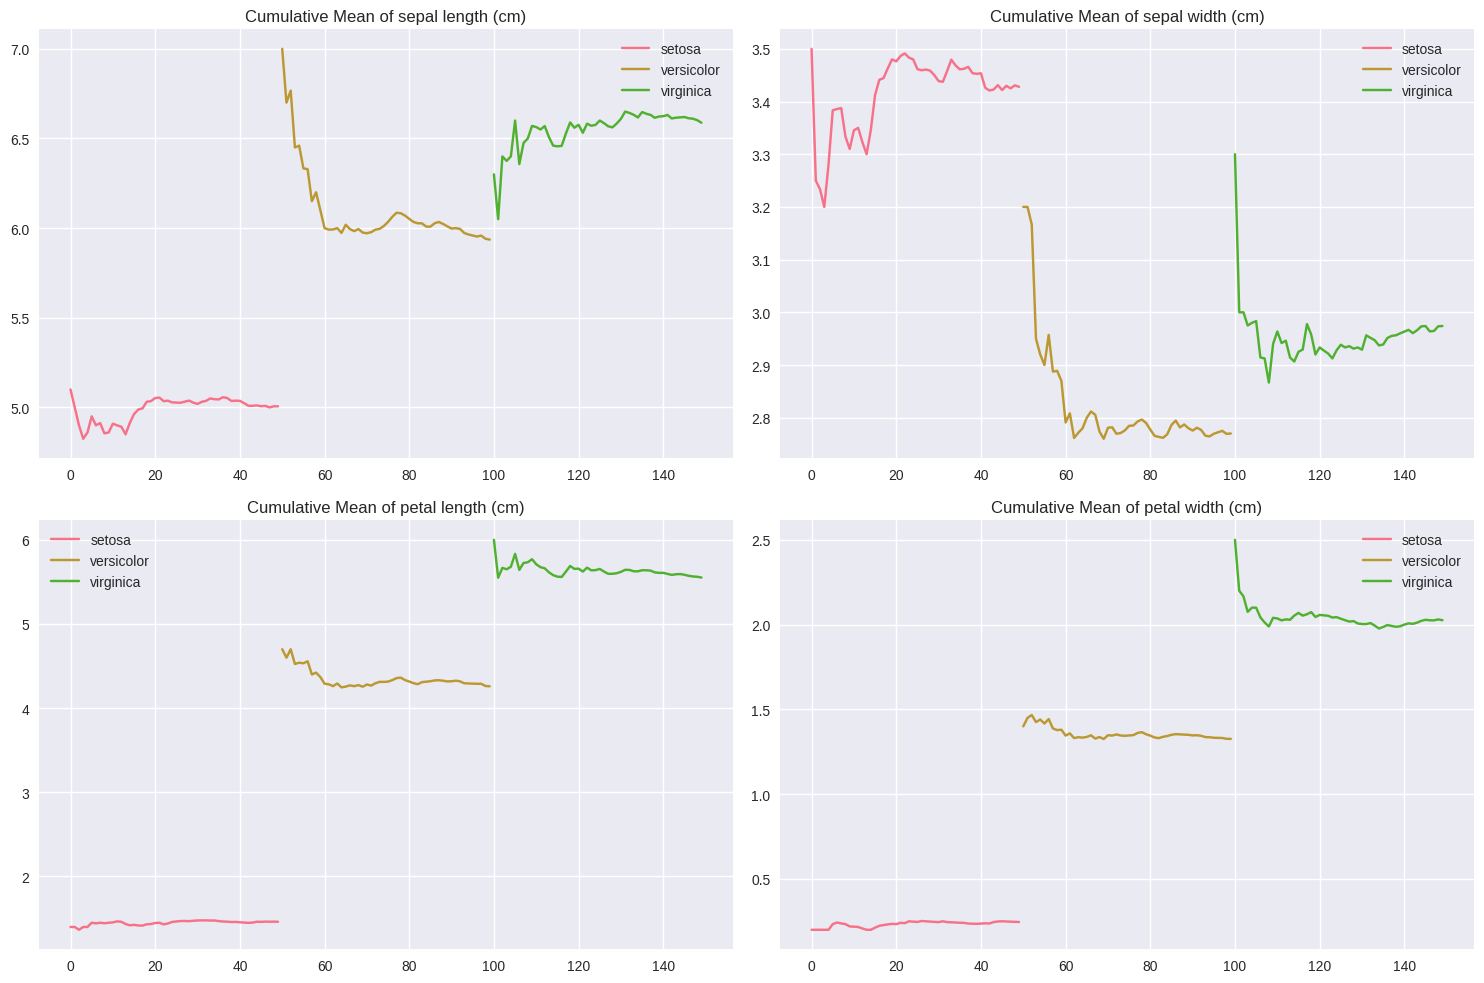

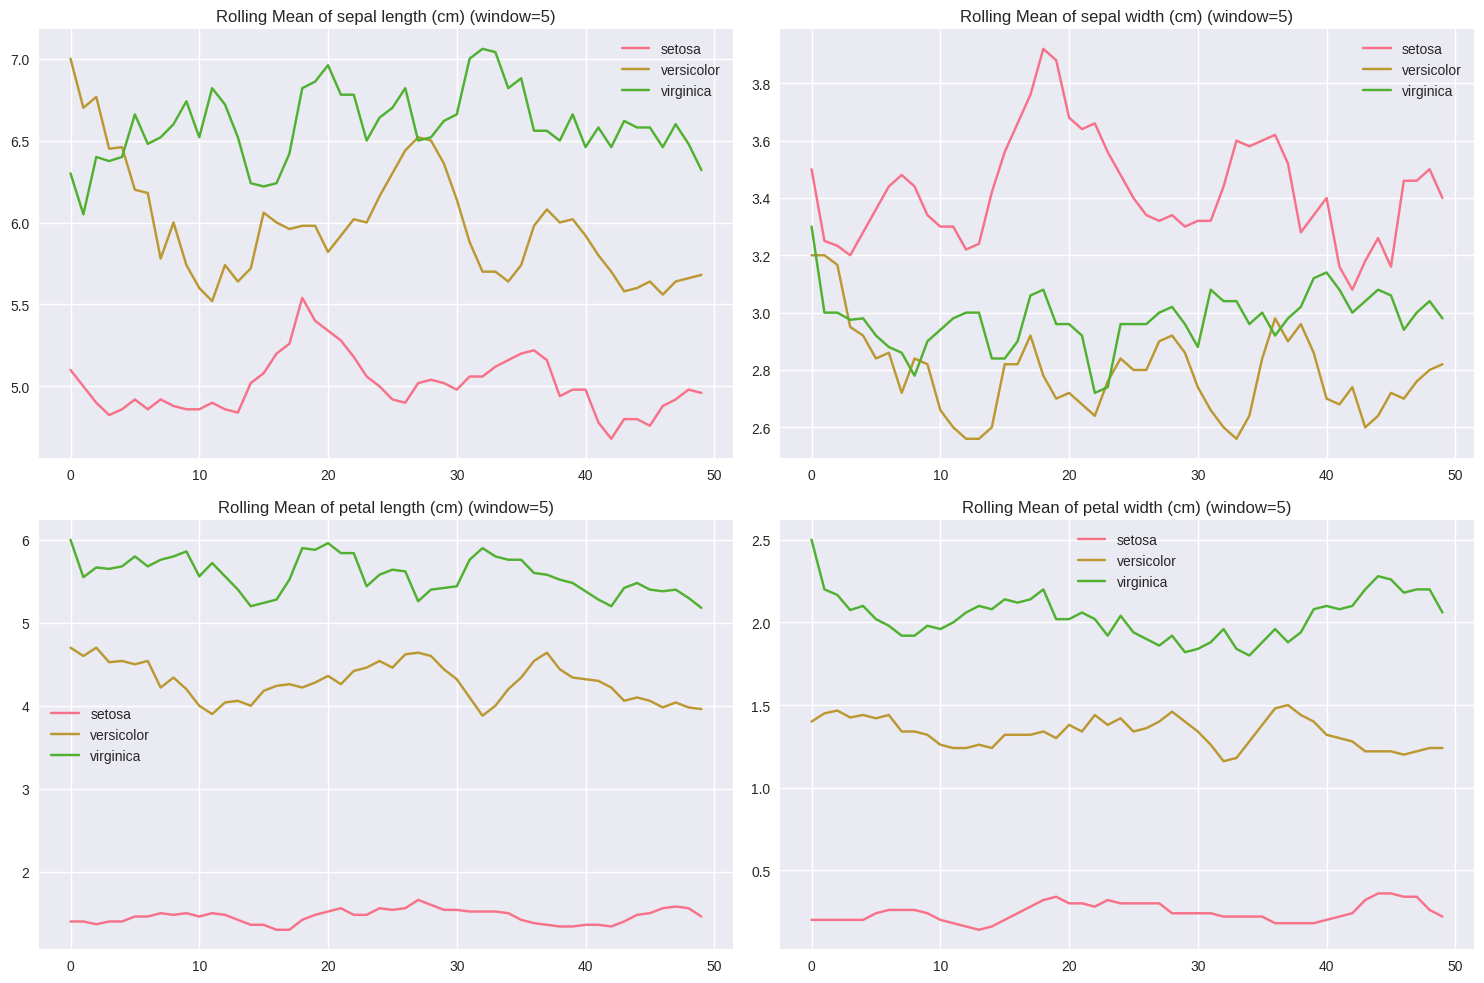

In [ ]:
import matplotlib.pyplot as plt

features = iris.columns[:-1]
species_list = iris['species'].unique()

# ------------------- Plot : Cumulative Mean by Species -------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # flatten for linear indexing

for i, col in enumerate(features):
    for species in species_list:
        species_data = iris[iris['species'] == species][col]
        cumulative_mean = species_data.expanding().mean()
        axes[i].plot(cumulative_mean, label=species)
    axes[i].set_title(f'Cumulative Mean of {col}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# ------------------- Plot : Rolling Mean by Species -------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # flatten for linear indexing

for i, col in enumerate(features):
    for species in species_list:
        species_data = iris[iris['species'] == species][col].reset_index(drop=True)
        rolling_mean = species_data.rolling(window=5, min_periods=1).mean()
        axes[i].plot(rolling_mean, label=species)
    axes[i].set_title(f'Rolling Mean of {col} (window=5)')
    axes[i].legend()

plt.tight_layout()
plt.show()


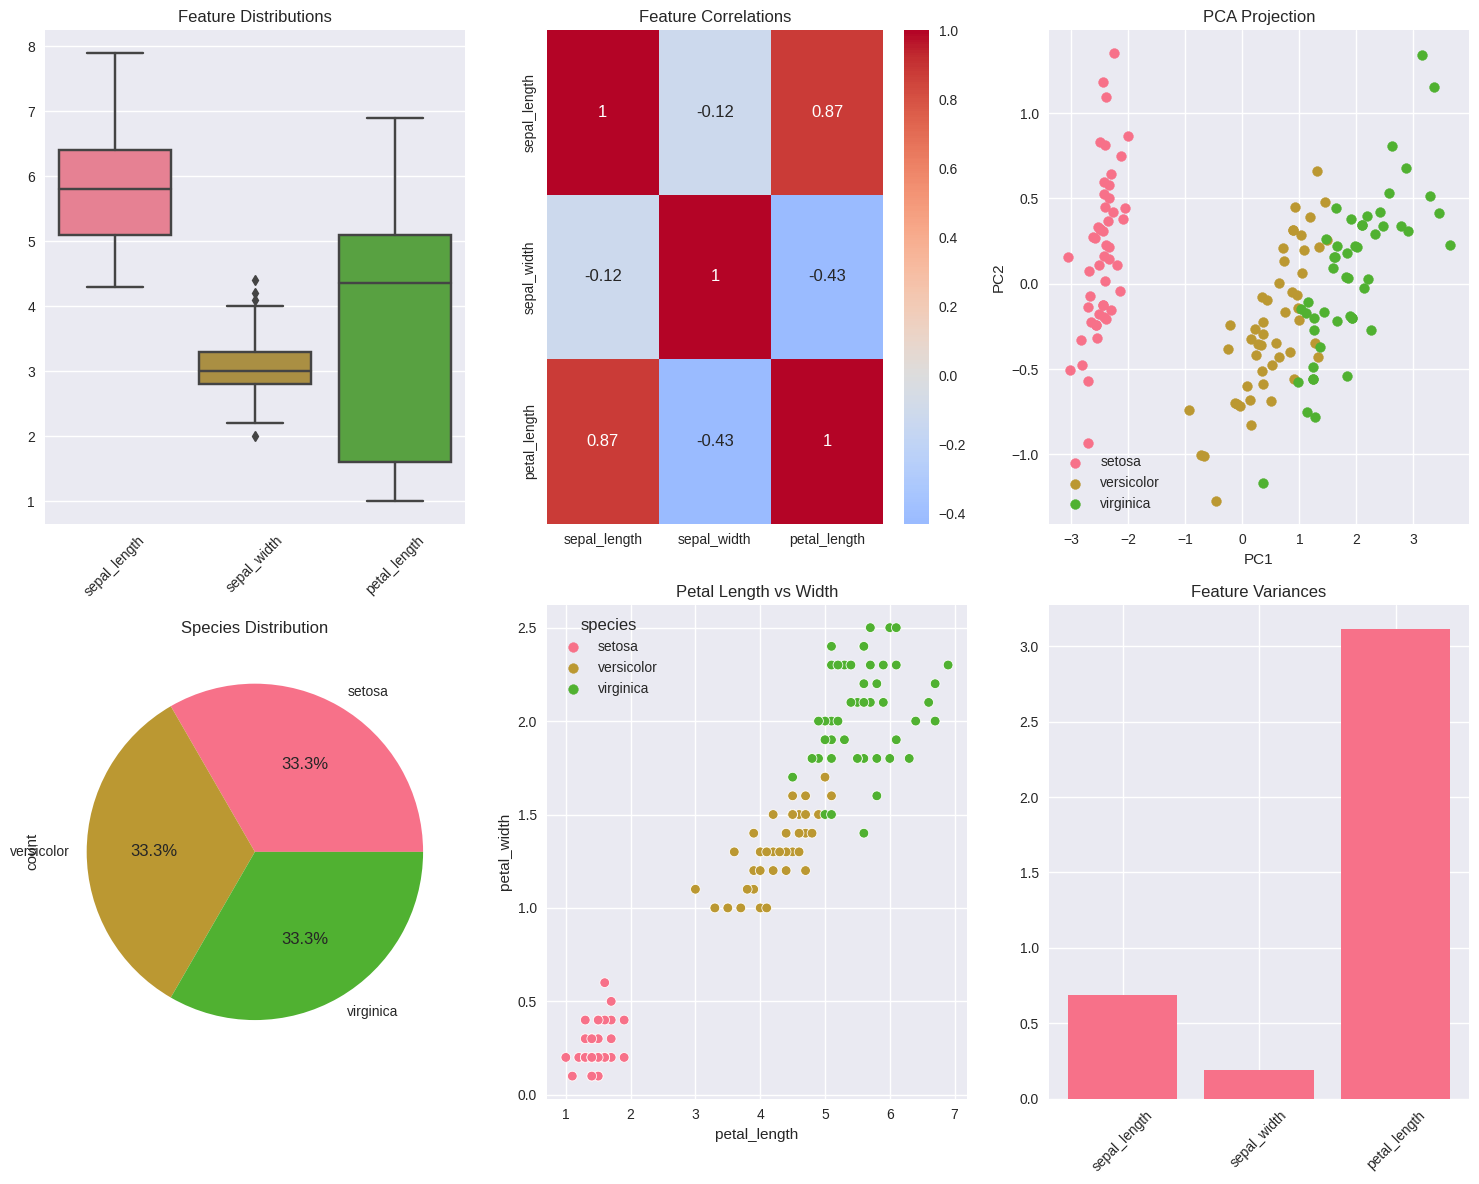

In [28]:
# Rename columns for convenience
iris_rename = iris.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
})

# PCA should also use renamed columns
from sklearn.decomposition import PCA

X = iris_rename.iloc[:, :-2].values  # numeric features only (sepal + petal)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# ------------------- Final Comprehensive Plot -------------------
plt.figure(figsize=(15, 12))

# Subplot 1: Feature distributions
plt.subplot(2, 3, 1)
sns.boxplot(data=iris_rename.iloc[:, :-2])
plt.title('Feature Distributions')
plt.xticks(rotation=45)

# Subplot 2: Correlation heatmap
plt.subplot(2, 3, 2)
sns.heatmap(iris_rename.iloc[:, :-2].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')

# Subplot 3: PCA
plt.subplot(2, 3, 3)
for species in iris_rename['species'].unique():
    mask = iris_rename['species'] == species
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=species, s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.legend()

# Subplot 4: Species distribution
plt.subplot(2, 3, 4)
iris_rename['species'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Species Distribution')

# Subplot 5: Petal length vs width
plt.subplot(2, 3, 5)
sns.scatterplot(data=iris_rename, x='petal_length', y='petal_width', hue='species')
plt.title('Petal Length vs Width')

# Subplot 6: Feature importance (variance)
plt.subplot(2, 3, 6)
variances = iris_rename.iloc[:, :-2].var()
plt.bar(variances.index, variances.values)
plt.title('Feature Variances')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


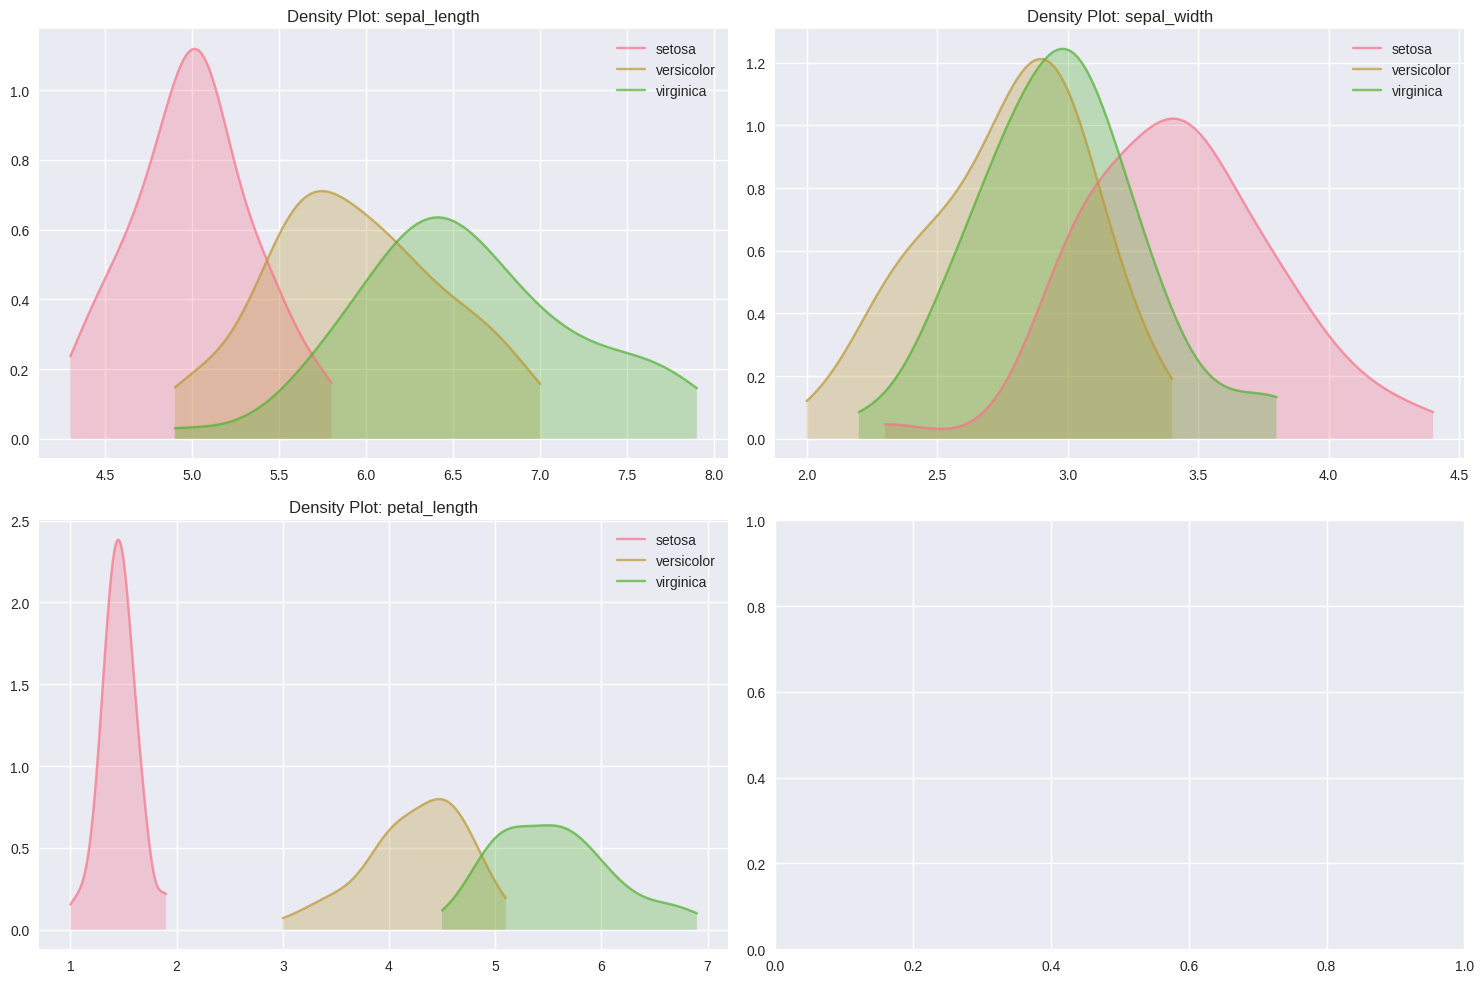

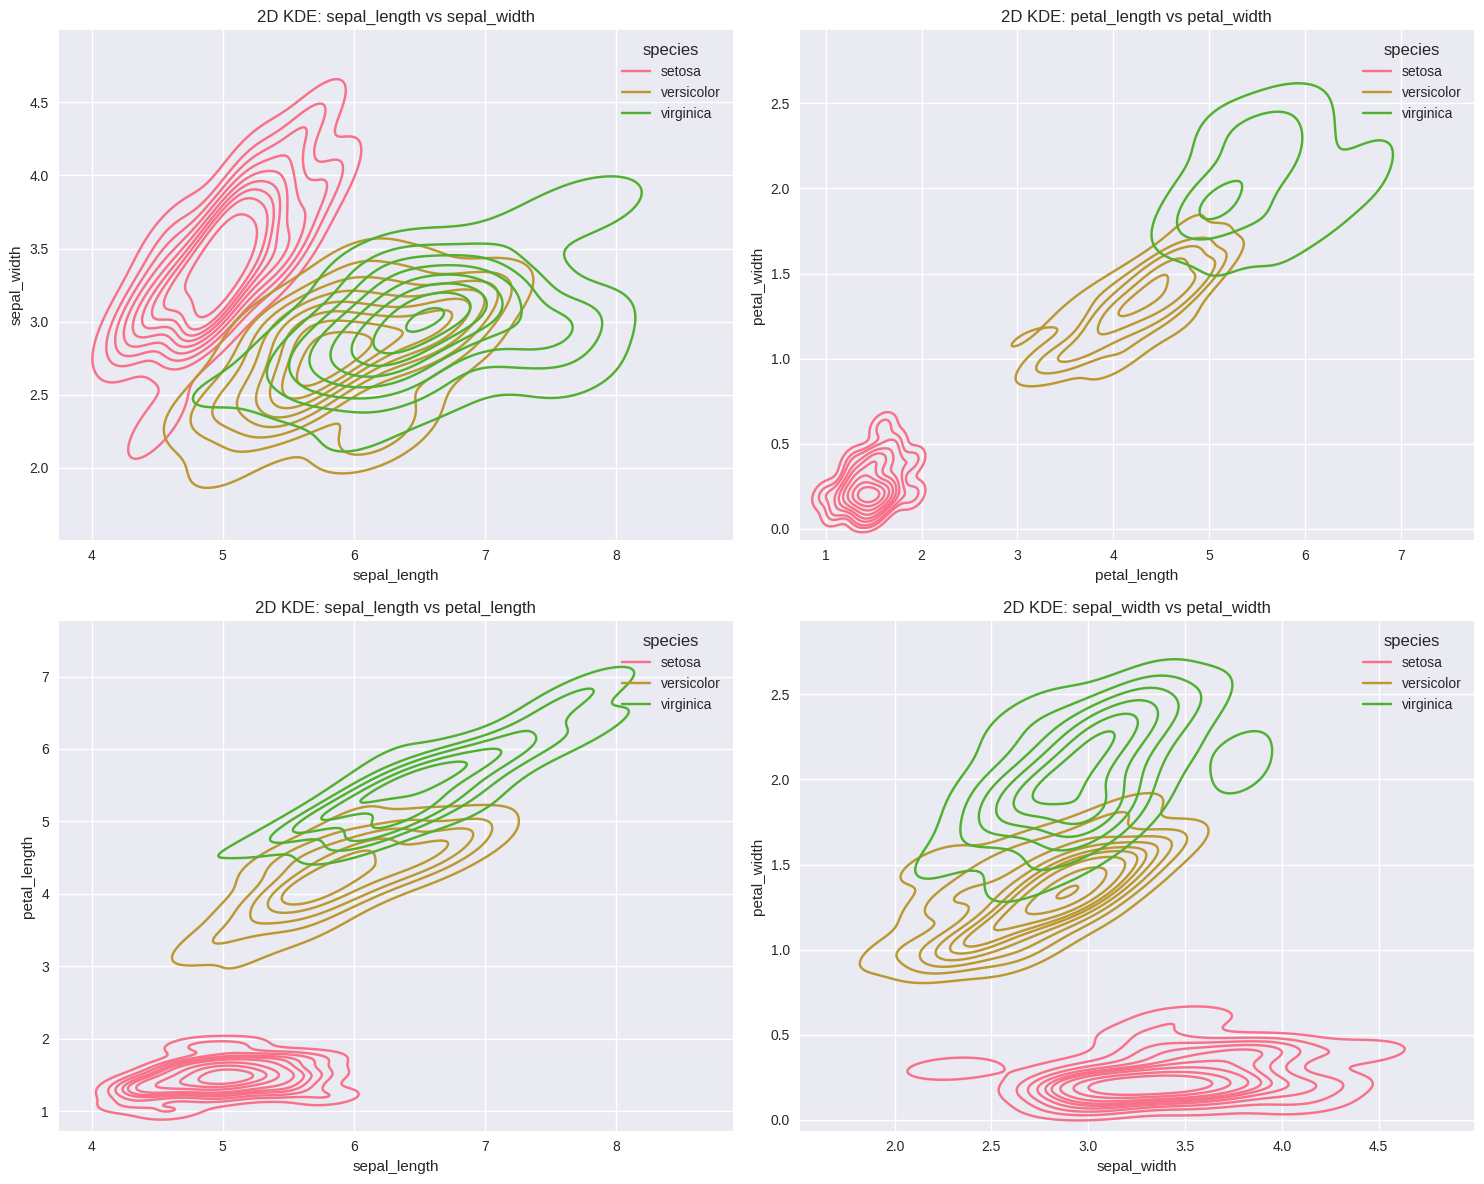

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Rename columns for convenience
iris_rename = iris.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
})

# ------------------- Ridge plots -------------------
def create_ridge_plot(data, features, target):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()  # flatten axes for easy indexing
    for i, feature in enumerate(features):
        species_list = data[target].unique()
        for species in species_list:
            species_data = data[data[target] == species][feature]
            x = np.linspace(species_data.min(), species_data.max(), 100)
            y = stats.gaussian_kde(species_data)(x)
            axes[i].plot(x, y, label=species, alpha=0.7)
            axes[i].fill_between(x, y, alpha=0.3)
        axes[i].set_title(f'Density Plot: {feature}')
        axes[i].legend()
    plt.tight_layout()
    plt.show()

create_ridge_plot(iris_rename, iris_rename.columns[:-2], 'species')

# ------------------- 2D KDE plots -------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()  # flatten axes for linear indexing
feature_pairs = [('sepal_length', 'sepal_width'), 
                 ('petal_length', 'petal_width'),
                 ('sepal_length', 'petal_length'),
                 ('sepal_width', 'petal_width')]

for i, (x_col, y_col) in enumerate(feature_pairs):
    sns.kdeplot(data=iris_rename, x=x_col, y=y_col, hue='species', ax=axes[i])
    axes[i].set_title(f'2D KDE: {x_col} vs {y_col}')

plt.tight_layout()
plt.show()


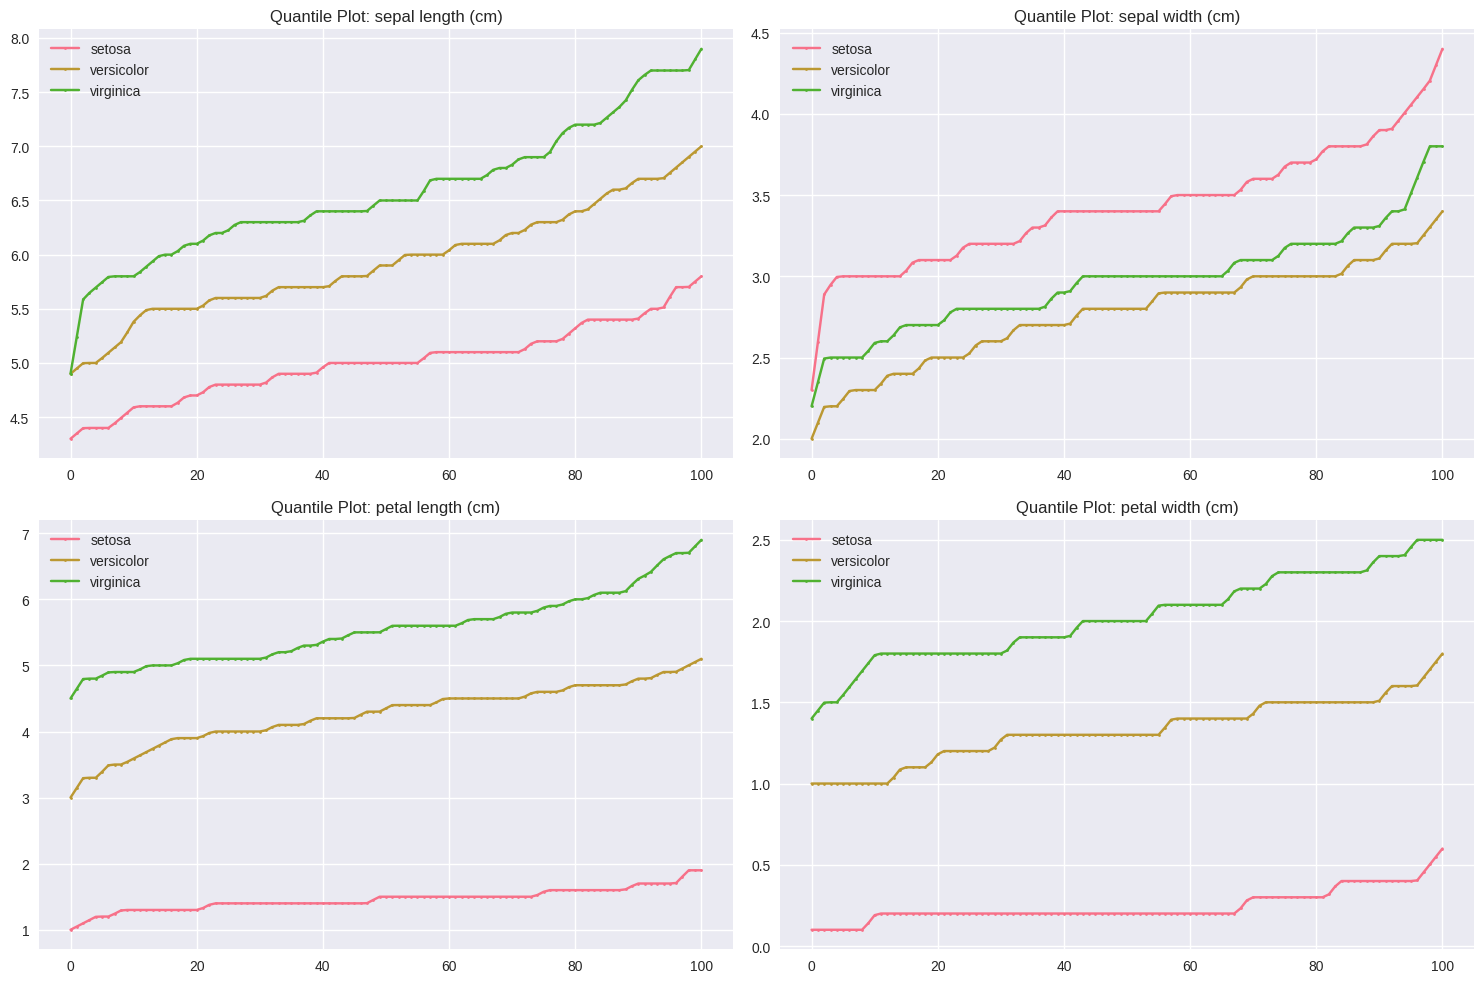

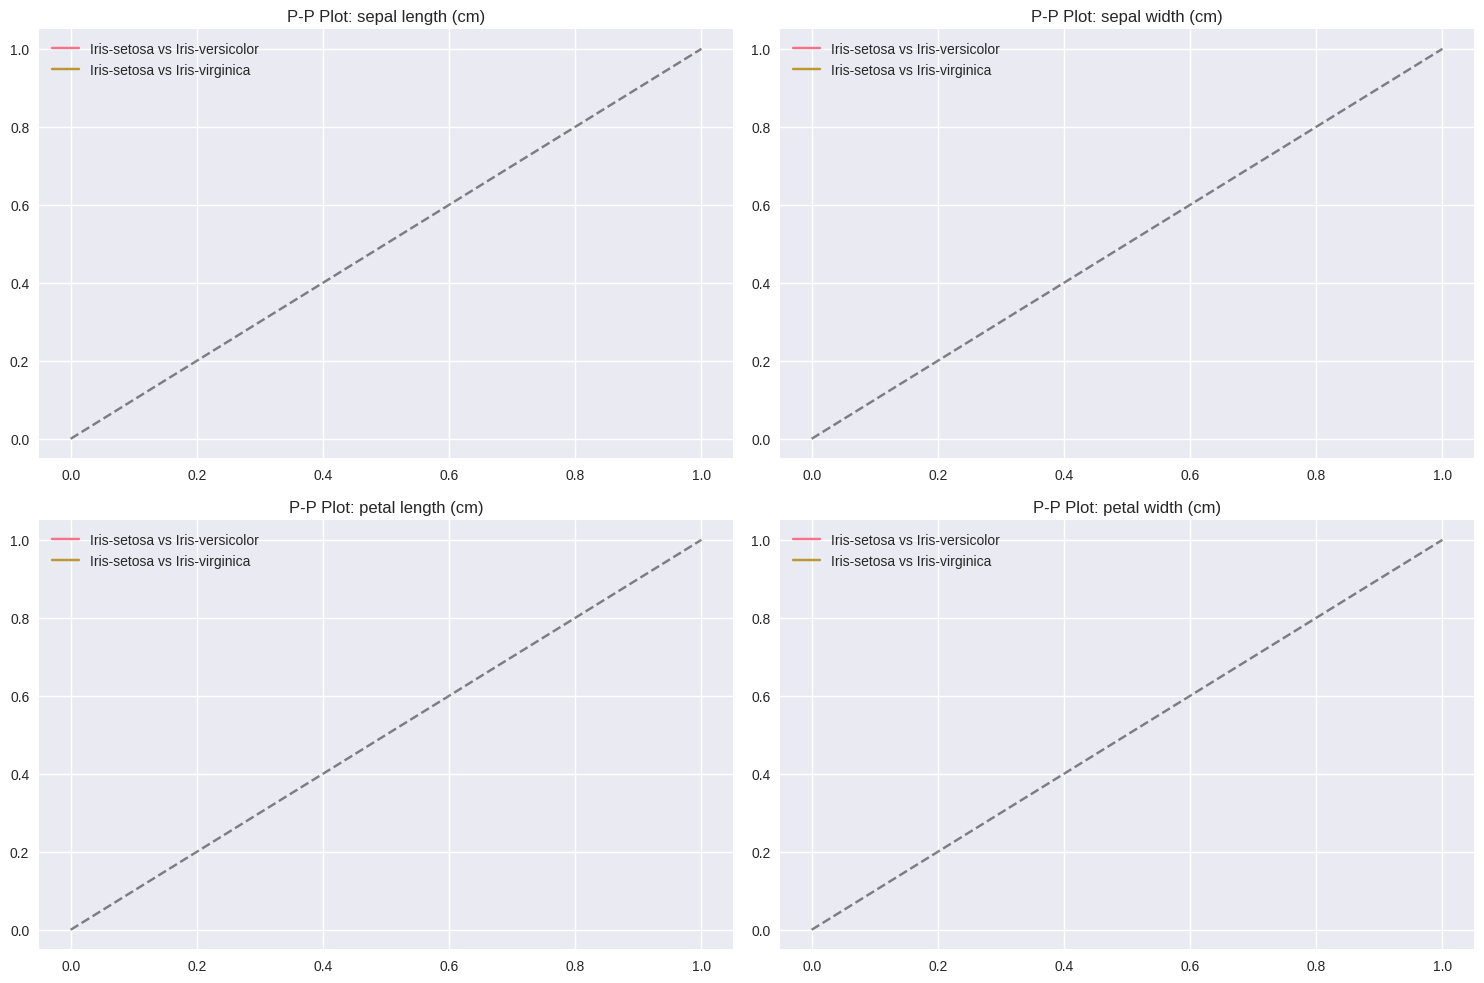

In [ ]:
# 12. QUANTILE-QUANTILE AND PROBABILITY PLOTS (8 plots)

# Plot : Quantile plots by species
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(iris.columns[:-1]):
    for species in iris['species'].unique():
        species_data = iris[iris['species'] == species][col]
        quantiles = np.percentile(species_data, np.arange(0, 101, 1))
        axes[i//2, i%2].plot(np.arange(0, 101, 1), quantiles, label=species, marker='o', markersize=2)
    axes[i//2, i%2].set_title(f'Quantile Plot: {col}')
    axes[i//2, i%2].legend()

plt.tight_layout()
plt.show()

# Plot : Probability-probability plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(iris.columns[:-1]):
    # Compare distributions between species pairs
    species_pairs = [('Iris-setosa', 'Iris-versicolor'), 
                    ('Iris-setosa', 'Iris-virginica')]
    
    for j, (sp1, sp2) in enumerate(species_pairs):
        data1 = iris[iris['species'] == sp1][col]
        data2 = iris[iris['species'] == sp2][col]
        
        # Calculate empirical CDFs
        ecdf1 = np.sort(data1)
        ecdf2 = np.sort(data2)
        
        # PP plot
        axes[i//2, i%2].plot(np.linspace(0, 1, len(ecdf1)), 
                            np.linspace(0, 1, len(ecdf2)), 
                            label=f'{sp1} vs {sp2}')
    
    axes[i//2, i%2].plot([0, 1], [0, 1], 'k--', alpha=0.5)
    axes[i//2, i%2].set_title(f'P-P Plot: {col}')
    axes[i//2, i%2].legend()

plt.tight_layout()
plt.show()

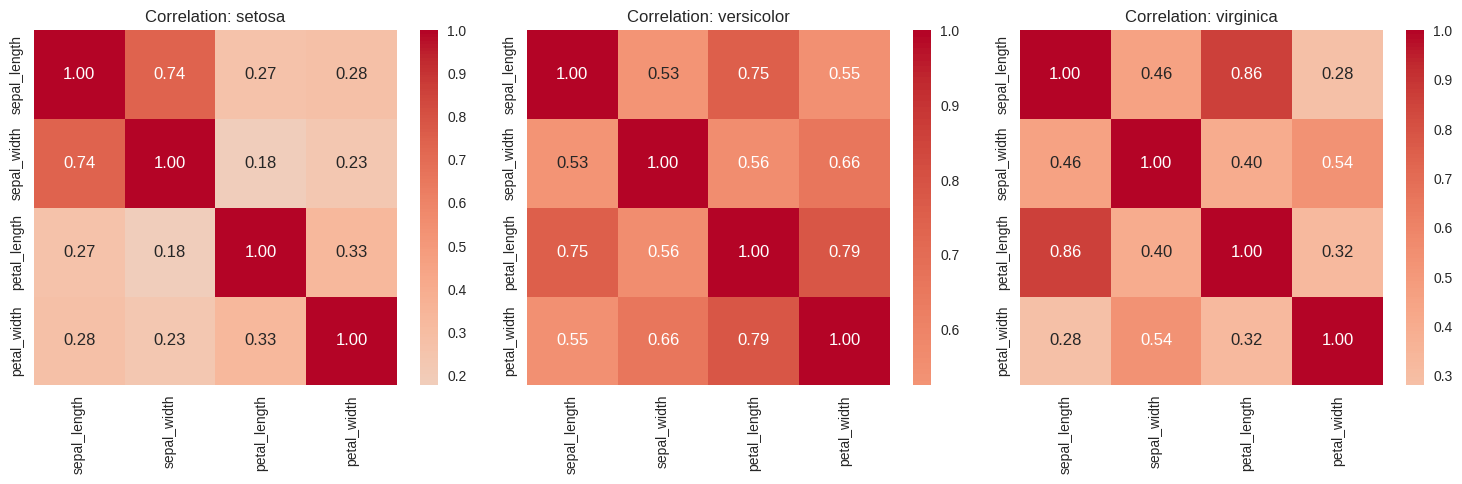

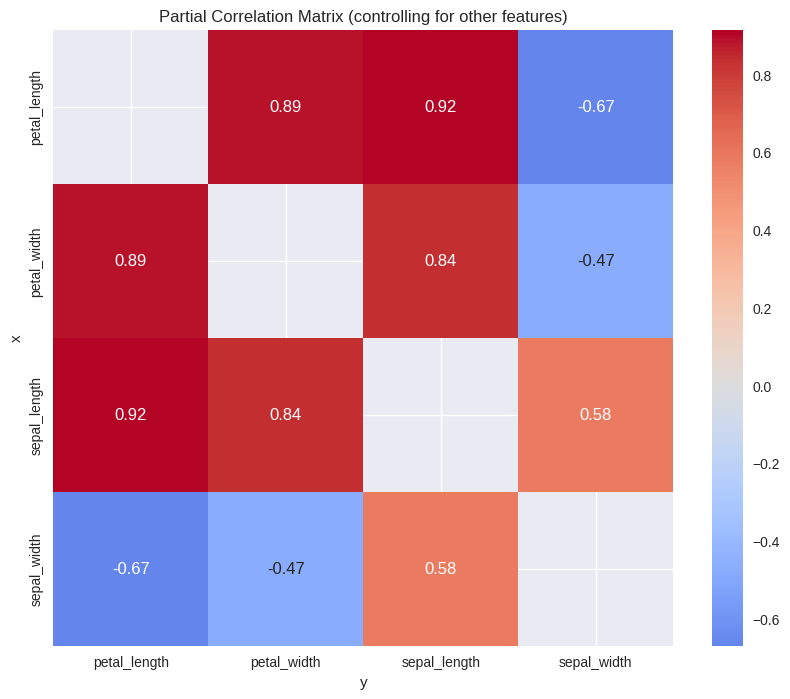

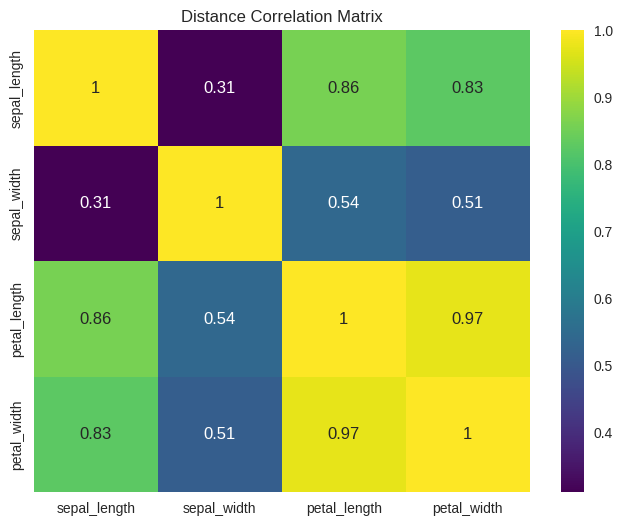

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.spatial.distance import pdist, squareform

# ------------------- Rename columns -------------------
iris_rename = iris.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
})

# ------------------- Conditional Correlation -------------------
def conditional_correlation_plot(data, condition_col):
    species = data[condition_col].unique()
    fig, axes = plt.subplots(1, len(species), figsize=(5 * len(species), 5))
    axes = np.atleast_1d(axes)  # Ensure axes is iterable
    for i, sp in enumerate(species):
        subset = data[data[condition_col] == sp].select_dtypes(include=[np.number])
        corr_matrix = subset.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                    ax=axes[i], fmt='.2f')
        axes[i].set_title(f'Correlation: {sp}')
    plt.tight_layout()
    plt.show()

conditional_correlation_plot(iris_rename, 'species')

# ------------------- Partial Correlation -------------------
numeric_cols = iris_rename.select_dtypes(include=[np.number]).columns
partial_corrs = []

for target_var in numeric_cols:
    control_vars = [col for col in numeric_cols if col != target_var]
    for compare_var in control_vars:
        other_controls = [col for col in control_vars if col != compare_var]
        if other_controls:
            pc = pg.partial_corr(data=iris_rename, x=target_var, y=compare_var,
                                 covar=other_controls[:1])
            partial_corrs.append({
                'x': target_var,
                'y': compare_var,
                'r': pc['r'].values[0],
                'p': pc['p-val'].values[0]  # Correct column name
            })

partial_df = pd.DataFrame(partial_corrs)

# Pivot for heatmap
heatmap_data = partial_df.pivot(index='x', columns='y', values='r')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
plt.title('Partial Correlation Matrix (controlling for other features)')
plt.show()

# ------------------- Distance Correlation -------------------
def distance_correlation(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    
    # Distance matrices
    A = squareform(pdist(X.reshape(-1, 1)))
    B = squareform(pdist(Y.reshape(-1, 1)))
    
    # Double centering
    n = len(X)
    A = A - A.mean(axis=0) - A.mean(axis=1)[:, np.newaxis] + A.mean()
    B = B - B.mean(axis=0) - B.mean(axis=1)[:, np.newaxis] + B.mean()
    
    # Distance correlation
    dcov2 = (A * B).sum() / (n ** 2)
    dvarX = (A * A).sum() / (n ** 2)
    dvarY = (B * B).sum() / (n ** 2)
    
    return np.sqrt(dcov2 / np.sqrt(dvarX * dvarY))

features = numeric_cols
dist_corr_matrix = np.zeros((len(features), len(features)))

for i, feat1 in enumerate(features):
    for j, feat2 in enumerate(features):
        dist_corr_matrix[i, j] = distance_correlation(iris_rename[feat1], iris_rename[feat2])

plt.figure(figsize=(8, 6))
sns.heatmap(dist_corr_matrix, annot=True, xticklabels=features, 
            yticklabels=features, cmap='viridis')
plt.title('Distance Correlation Matrix')
plt.show()


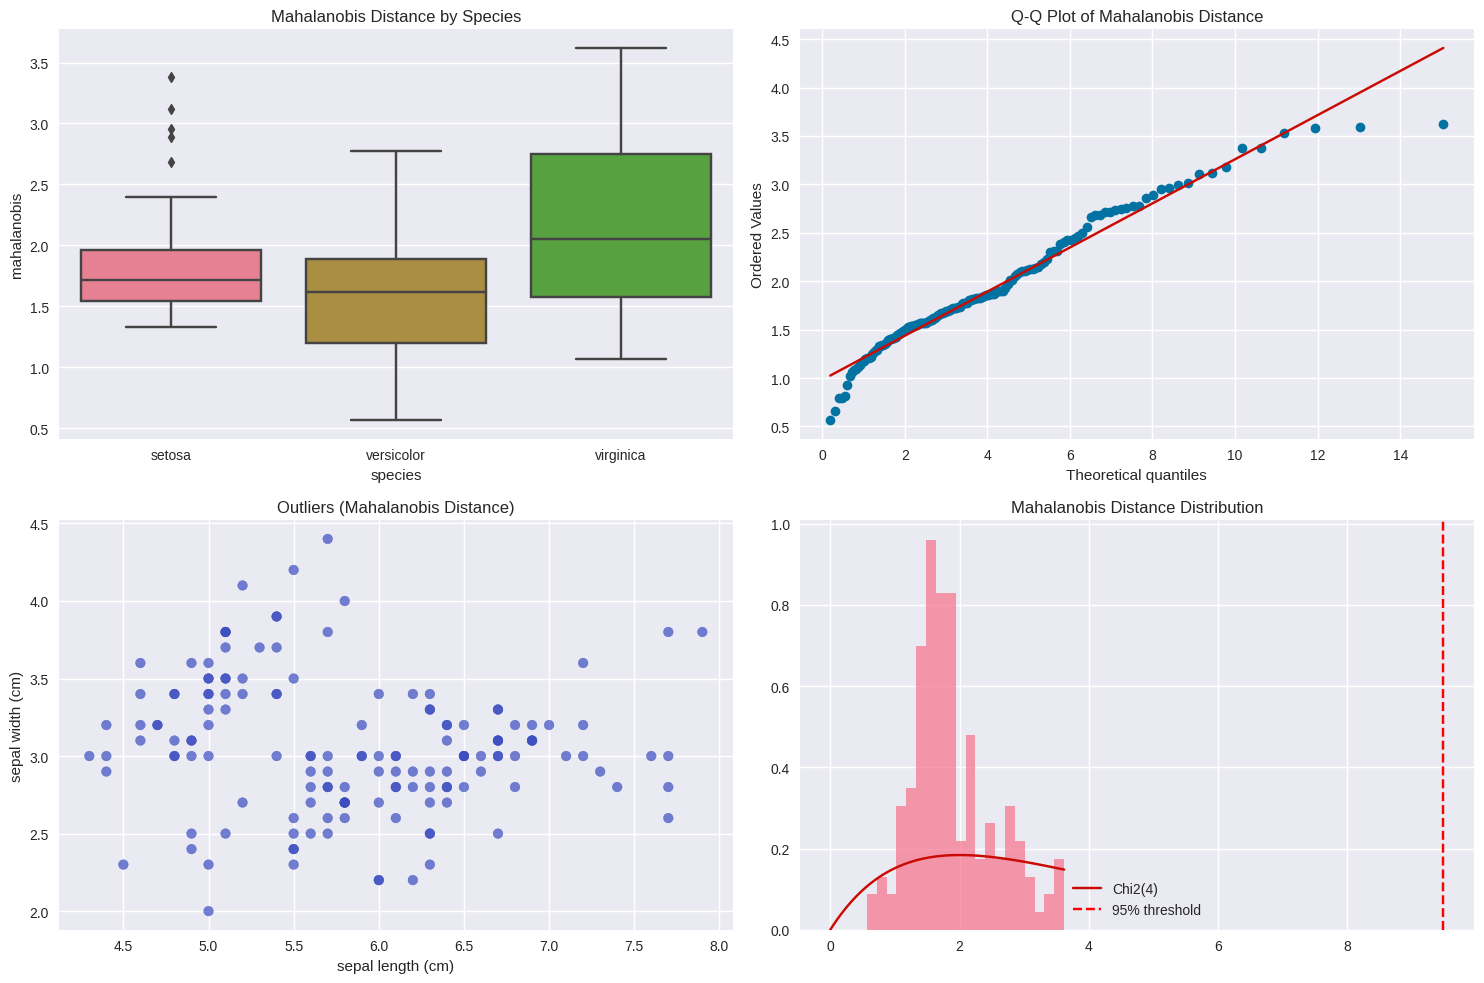

In [ ]:
# 14. MULTIVARIATE OUTLIER DETECTION (8 plots)

# Plot : Mahalanobis distance
from scipy.spatial.distance import mahalanobis
from scipy.linalg import inv

def mahalanobis_distance_plot(data, features):
    X = data[features].values
    cov = np.cov(X.T)
    inv_cov = inv(cov)
    mean = np.mean(X, axis=0)
    
    mahal_dist = []
    for i in range(len(X)):
        mahal_dist.append(mahalanobis(X[i], mean, inv_cov))
    
    data['mahalanobis'] = mahal_dist
    data['mahal_pvalue'] = 1 - stats.chi2.cdf(data['mahalanobis'], len(features))
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Mahalanobis distance by species
    sns.boxplot(x='species', y='mahalanobis', data=data, ax=axes[0, 0])
    axes[0, 0].set_title('Mahalanobis Distance by Species')
    
    # QQ plot of Mahalanobis distance
    stats.probplot(data['mahalanobis'], dist="chi2", sparams=len(features), plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot of Mahalanobis Distance')
    
    # Scatter plot with outliers highlighted
    threshold = stats.chi2.ppf(0.95, len(features))
    outliers = data['mahalanobis'] > threshold
    
    axes[1, 0].scatter(data[features[0]], data[features[1]], 
                      c=outliers, cmap='coolwarm', alpha=0.7)
    axes[1, 0].set_xlabel(features[0])
    axes[1, 0].set_ylabel(features[1])
    axes[1, 0].set_title('Outliers (Mahalanobis Distance)')
    
    # Distribution of Mahalanobis distance
    axes[1, 1].hist(data['mahalanobis'], bins=20, alpha=0.7, density=True)
    x = np.linspace(0, data['mahalanobis'].max(), 100)
    axes[1, 1].plot(x, stats.chi2.pdf(x, len(features)), 'r-', label=f'Chi2({len(features)})')
    axes[1, 1].axvline(threshold, color='red', linestyle='--', label='95% threshold')
    axes[1, 1].set_title('Mahalanobis Distance Distribution')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()
    
    return data

iris_with_mahal = mahalanobis_distance_plot(iris, iris.columns[:-1])

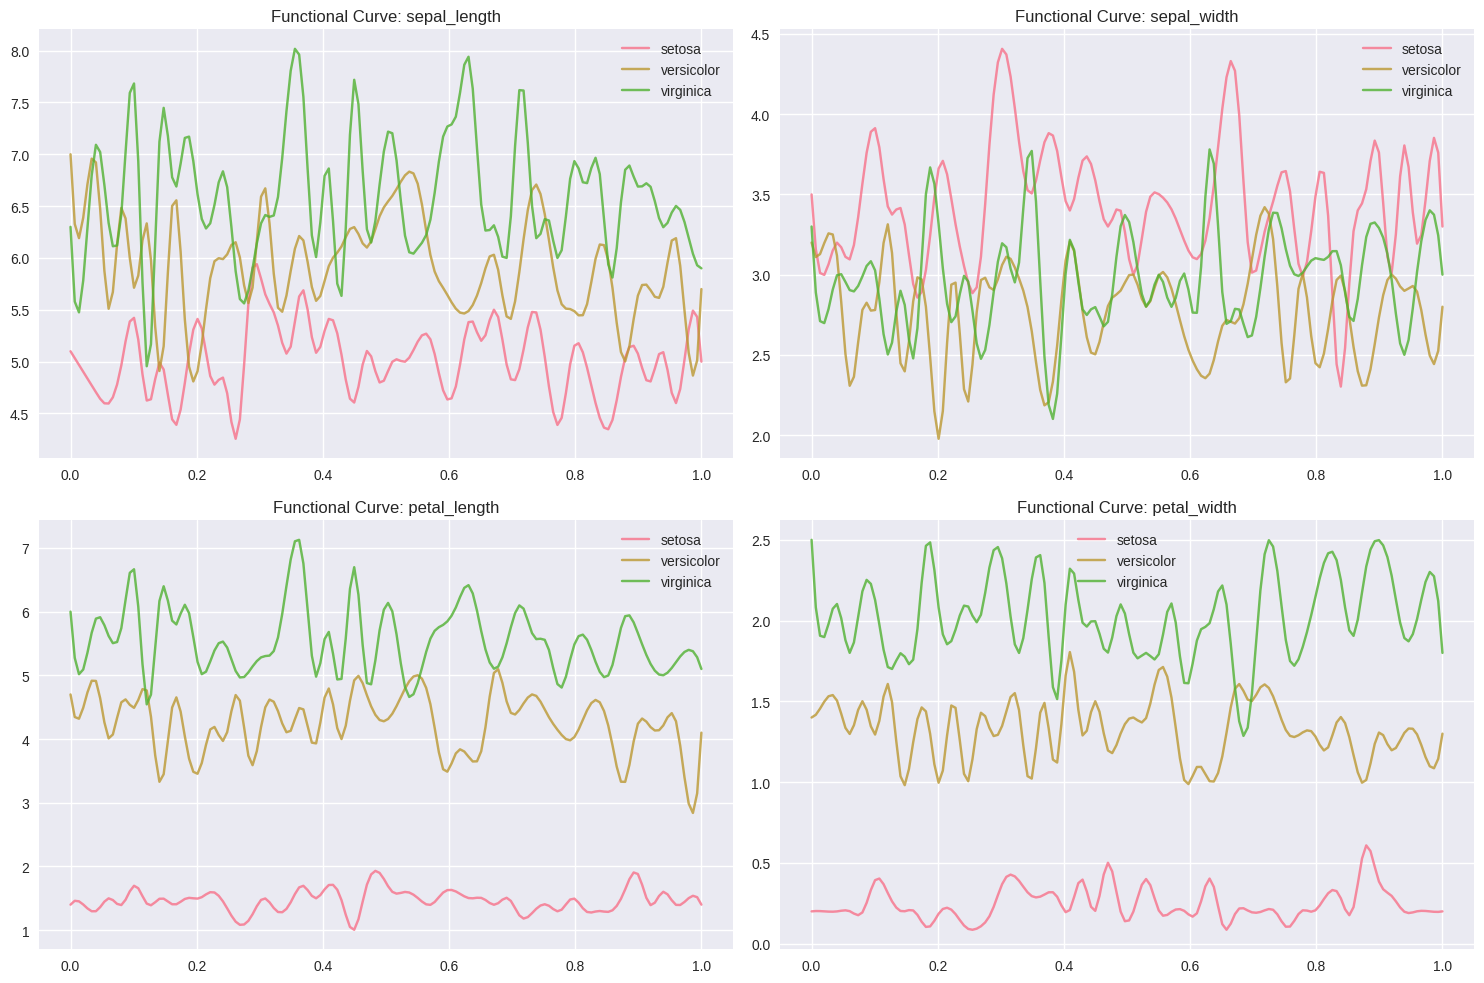

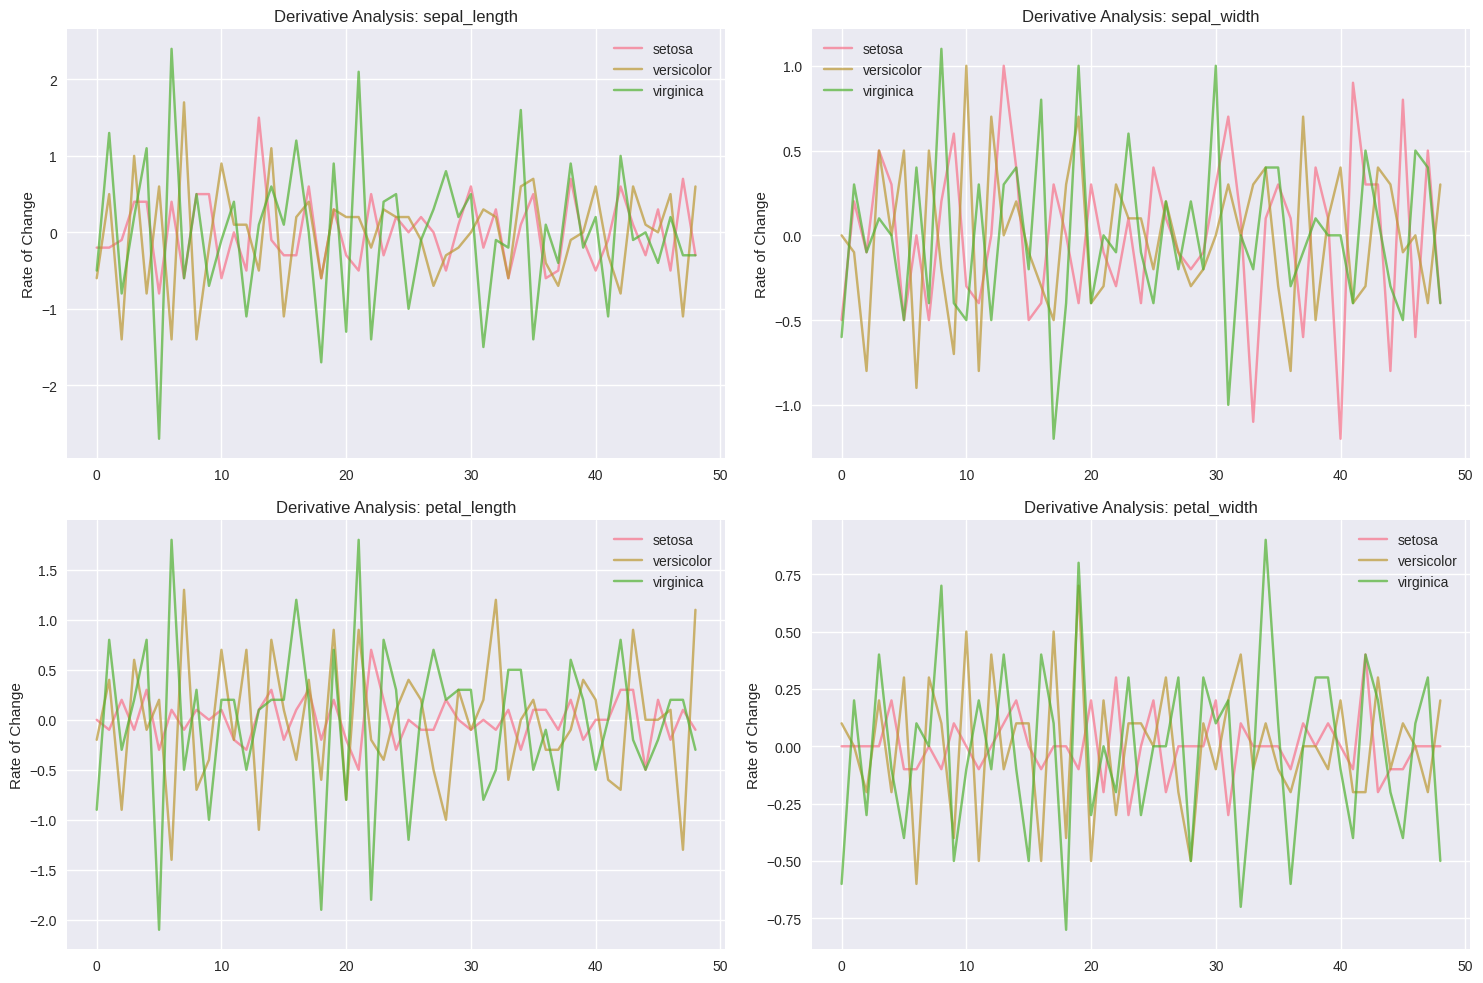

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# ------------------- Functional Curves -------------------
def create_functional_plots(data):
    # Only numeric features
    features = data.select_dtypes(include=[np.number]).columns
    species = data['species'].unique()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    x_range = np.linspace(0, 1, len(data))
    
    for i, feature in enumerate(features):
        for species_name in species:
            species_data = data[data['species'] == species_name][feature].values
            # Smooth curve using cubic interpolation
            f = interp1d(np.linspace(0, 1, len(species_data)), species_data, 
                         kind='cubic', fill_value='extrapolate')
            y_smooth = f(x_range)
            axes[i].plot(x_range, y_smooth, label=species_name, alpha=0.8)
        
        axes[i].set_title(f'Functional Curve: {feature}')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

create_functional_plots(iris_rename)

# ------------------- Derivative Analysis -------------------
def derivative_analysis(data):
    features = data.select_dtypes(include=[np.number]).columns
    species = data['species'].unique()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        for species_name in species:
            species_data = data[data['species'] == species_name][feature].values
            derivative = np.diff(species_data)
            axes[i].plot(derivative, label=species_name, alpha=0.7)
        
        axes[i].set_title(f'Derivative Analysis: {feature}')
        axes[i].set_ylabel('Rate of Change')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

derivative_analysis(iris_rename)


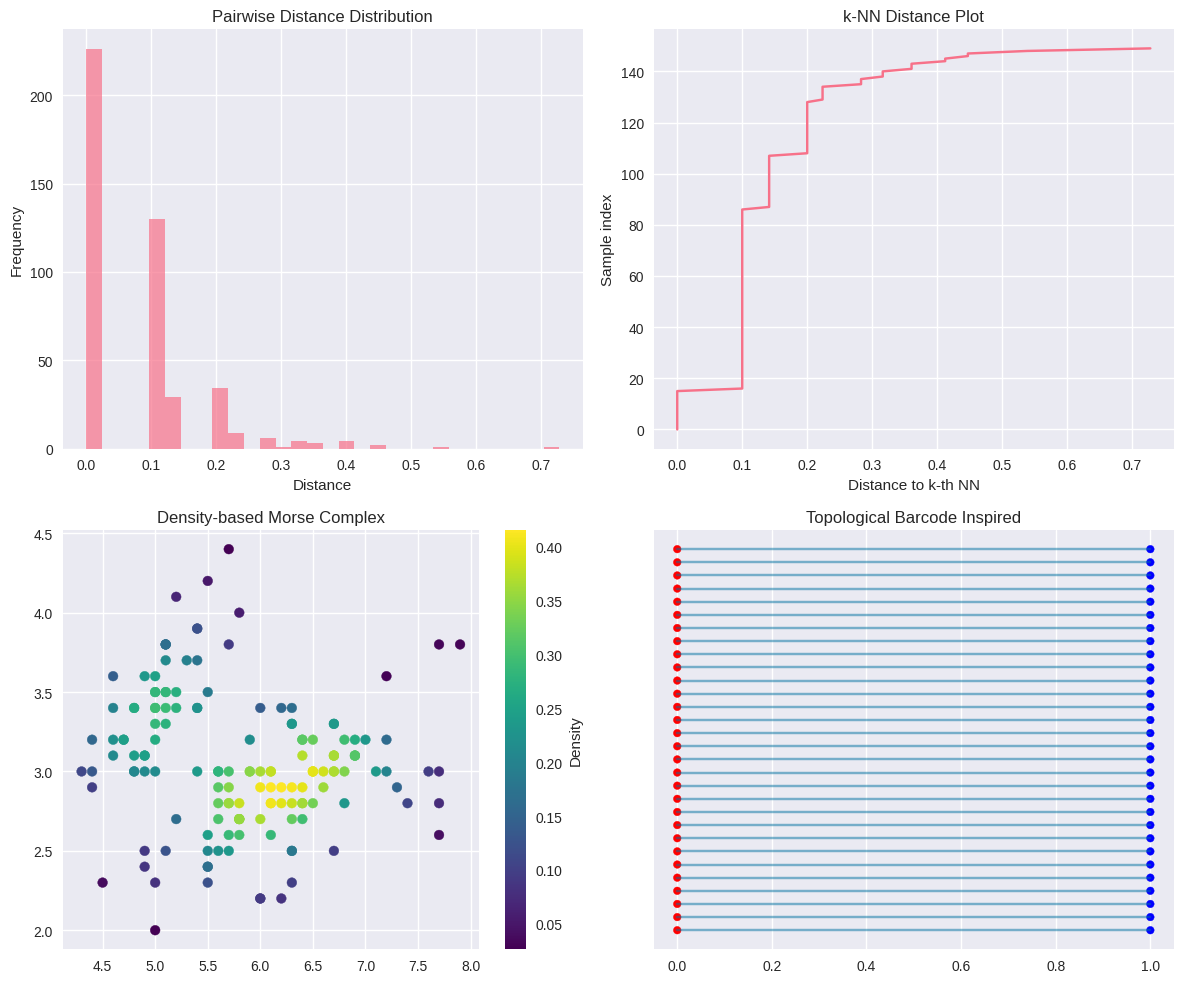

In [ ]:
# 16. TOPOLOGICAL DATA ANALYSIS (TDA) INSPIRED PLOTS (6 plots)

# Plot : Persistence diagrams (simplified)
from scipy.spatial.distance import pdist, squareform

def create_persistence_inspired_plot(data, features):
    from sklearn.neighbors import NearestNeighbors
    
    X = data[features].values
    distances = squareform(pdist(X))
    
    # Create connectivity graph based on distances
    nbrs = NearestNeighbors(n_neighbors=3).fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    plt.figure(figsize=(12, 10))
    
    # Plot 1: Distance distribution
    plt.subplot(2, 2, 1)
    plt.hist(distances.flatten(), bins=30, alpha=0.7)
    plt.title('Pairwise Distance Distribution')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    
    # Plot 2: k-NN distance plot
    plt.subplot(2, 2, 2)
    sorted_dists = np.sort(distances[:, -1])
    plt.plot(sorted_dists, np.arange(len(sorted_dists)))
    plt.title('k-NN Distance Plot')
    plt.xlabel('Distance to k-th NN')
    plt.ylabel('Sample index')
    
    # Plot 3: Morse complex inspired
    plt.subplot(2, 2, 3)
    from scipy.ndimage import gaussian_filter
    density = stats.gaussian_kde(X.T)(X.T)
    plt.scatter(X[:, 0], X[:, 1], c=density, cmap='viridis')
    plt.colorbar(label='Density')
    plt.title('Density-based Morse Complex')
    
    # Plot 4: Barcode plot inspired
    plt.subplot(2, 2, 4)
    for i in range(min(30, len(X))):  # Show first 30 points
        point_dists = distances[i]
        plt.plot([0, 1], [i, i], 'b-', alpha=0.5)
        plt.scatter([0, 1], [i, i], c=['red', 'blue'], s=30)
    plt.title('Topological Barcode Inspired')
    plt.yticks([])
    
    plt.tight_layout()
    plt.show()

create_persistence_inspired_plot(iris, iris.columns[:2])  

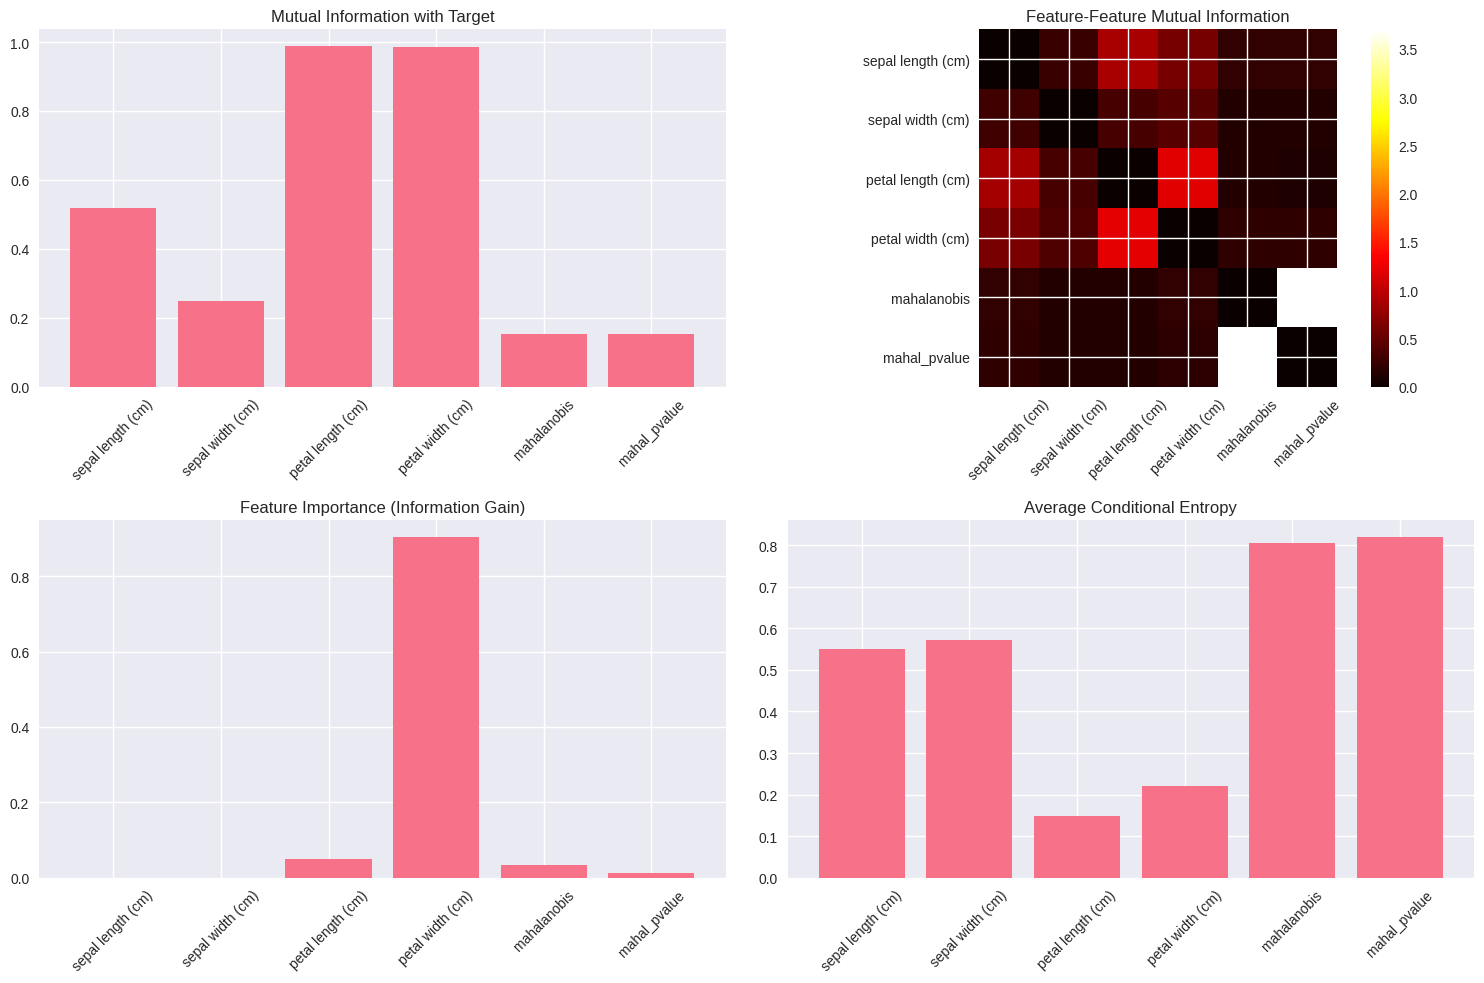

In [ ]:
# 17. INFORMATION-THEORETIC ANALYSIS (8 plots)

# Plot : Mutual information between features
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

def information_theoretic_analysis(data, target):
    features = data.select_dtypes(include=[np.number]).columns
    X = data[features]
    y = data[target]
    
    # Encode target for mutual information
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    
    # Calculate mutual information
    mi = mutual_info_classif(X, y_encoded)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Mutual information bar plot
    axes[0, 0].bar(features, mi)
    axes[0, 0].set_title('Mutual Information with Target')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Feature-feature mutual information
    mi_matrix = np.zeros((len(features), len(features)))
    for i, feat1 in enumerate(features):
        for j, feat2 in enumerate(features):
            if i != j:
                mi_matrix[i, j] = mutual_info_regression(
                    X[feat1].values.reshape(-1, 1), X[feat2].values
                )[0]
    
    im = axes[0, 1].imshow(mi_matrix, cmap='hot', interpolation='nearest')
    axes[0, 1].set_xticks(range(len(features)))
    axes[0, 1].set_yticks(range(len(features)))
    axes[0, 1].set_xticklabels(features, rotation=45)
    axes[0, 1].set_yticklabels(features)
    axes[0, 1].set_title('Feature-Feature Mutual Information')
    plt.colorbar(im, ax=axes[0, 1])
    
    # Plot 3: Information gain ratio (simplified)
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X, y_encoded)
    
    axes[1, 0].bar(features, dt.feature_importances_)
    axes[1, 0].set_title('Feature Importance (Information Gain)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Plot 4: Conditional entropy
    conditional_entropy = []
    for feature in features:
        # Group by feature bins and calculate entropy of target
        binned = pd.cut(X[feature], bins=5)
        target_entropy = data.groupby(binned)[target].apply(
            lambda x: stats.entropy(x.value_counts(normalize=True))
        ).mean()
        conditional_entropy.append(target_entropy)
    
    axes[1, 1].bar(features, conditional_entropy)
    axes[1, 1].set_title('Average Conditional Entropy')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

information_theoretic_analysis(iris, 'species')

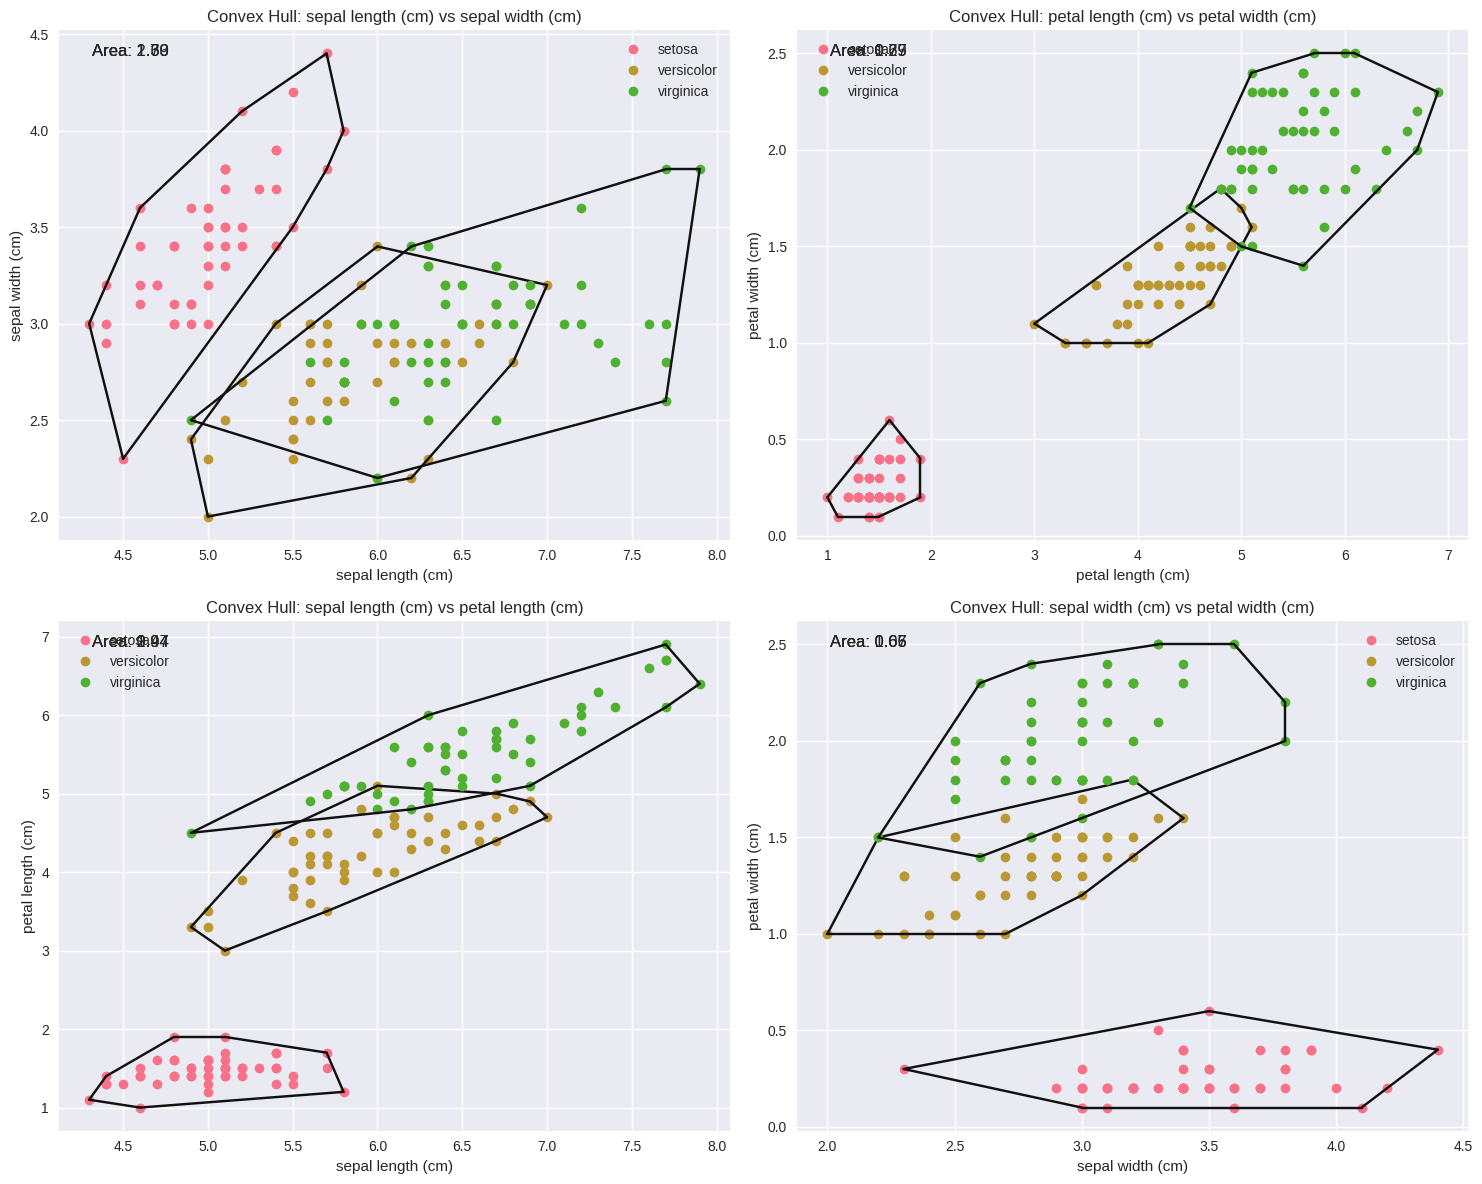

In [ ]:
# 18. GEOMETRIC AND TOPOLOGICAL FEATURES (6 plots)

# Plot : Convex hull analysis
from scipy.spatial import ConvexHull

def convex_hull_analysis(data, features, target):
    species = data[target].unique()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    feature_pairs = [(0, 1), (2, 3), (0, 2), (1, 3)]  # Index pairs
    
    for idx, (i, j) in enumerate(feature_pairs):
        feat1, feat2 = features[i], features[j]
        
        for species_name in species:
            species_data = data[data[target] == species_name]
            points = species_data[[feat1, feat2]].values
            
            if len(points) > 2:  # Need at least 3 points for convex hull
                hull = ConvexHull(points)
                
                axes[idx//2, idx%2].plot(points[:, 0], points[:, 1], 'o', label=species_name)
                for simplex in hull.simplices:
                    axes[idx//2, idx%2].plot(points[simplex, 0], points[simplex, 1], 'k-')
            
            # Calculate hull area
            if len(points) > 2:
                hull_area = hull.volume  # For 2D, volume is area
                axes[idx//2, idx%2].text(0.05, 0.95, f'Area: {hull_area:.2f}', 
                                       transform=axes[idx//2, idx%2].transAxes)
        
        axes[idx//2, idx%2].set_xlabel(feat1)
        axes[idx//2, idx%2].set_ylabel(feat2)
        axes[idx//2, idx%2].set_title(f'Convex Hull: {feat1} vs {feat2}')
        axes[idx//2, idx%2].legend()
    
    plt.tight_layout()
    plt.show()

convex_hull_analysis(iris, iris.columns[:-1], 'species')

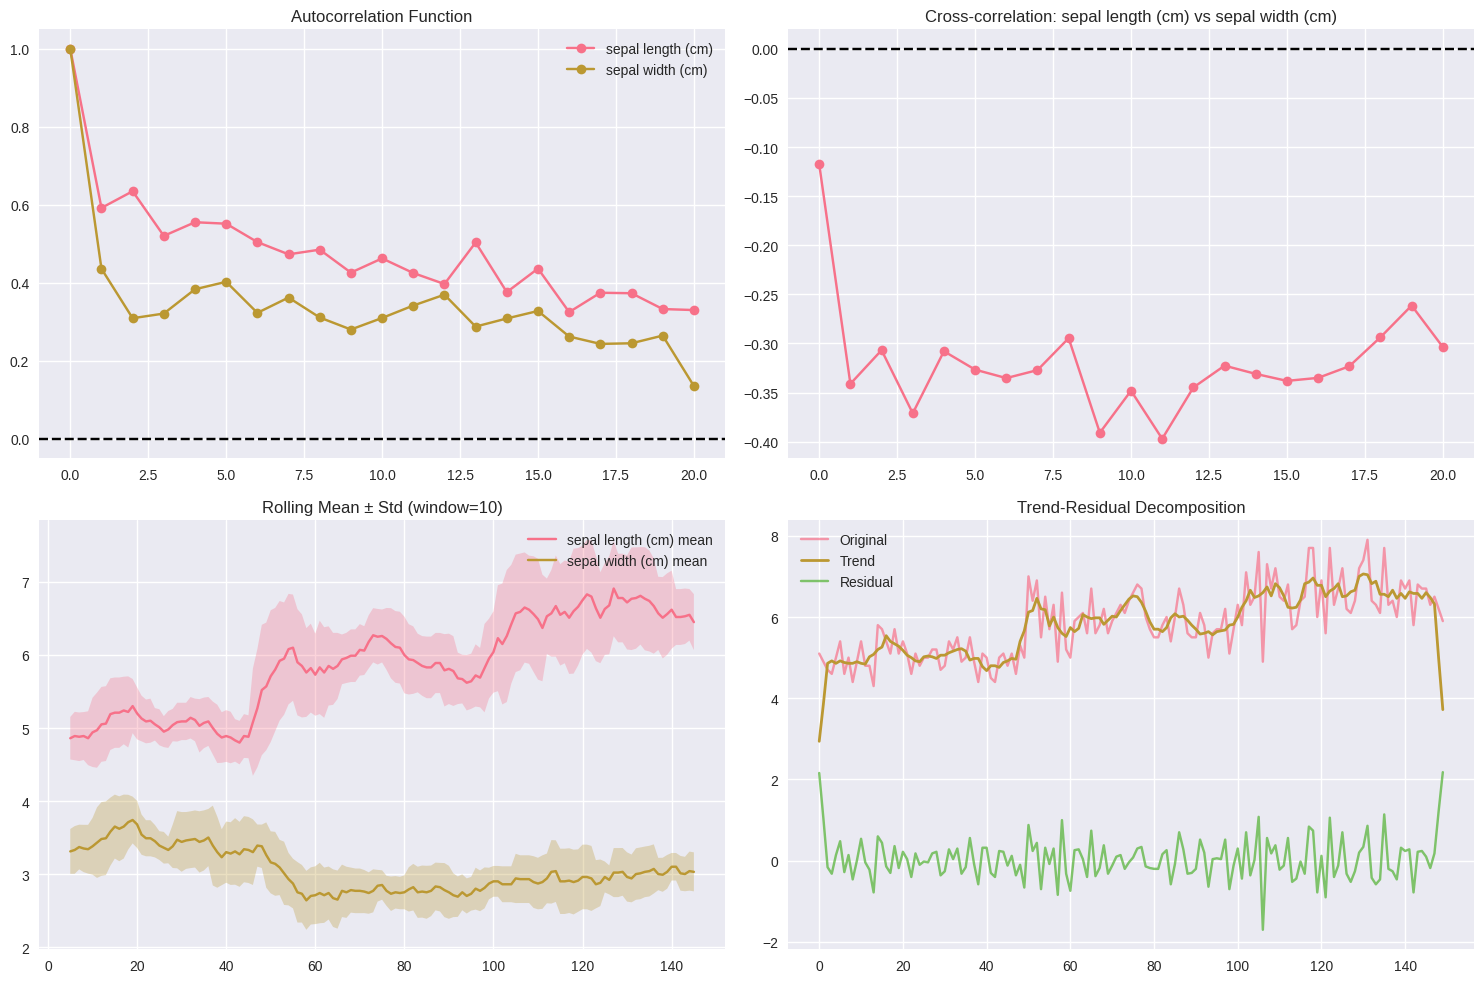

In [ ]:
# 19. TIME SERIES ANALYSIS TECHNIQUES APPLIED (6 plots)

# Plot : Autocorrelation and cross-correlation
def time_series_techniques(data):
    features = data.columns[:-1]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Autocorrelation (treating as time series)
    for feature in features[:2]:  # Show first two features
        from statsmodels.tsa.stattools import acf
        autocorr = acf(data[feature], nlags=20)
        axes[0, 0].plot(autocorr, label=feature, marker='o')
    axes[0, 0].axhline(0, color='black', linestyle='--')
    axes[0, 0].set_title('Autocorrelation Function')
    axes[0, 0].legend()
    
    # Plot 2: Cross-correlation
    from statsmodels.tsa.stattools import ccf
    cross_corr = ccf(data[features[0]], data[features[1]], adjusted=False)
    axes[0, 1].plot(cross_corr[:21], marker='o')
    axes[0, 1].axhline(0, color='black', linestyle='--')
    axes[0, 1].set_title(f'Cross-correlation: {features[0]} vs {features[1]}')
    
    # Plot 3: Rolling statistics
    window = 10
    for feature in features[:2]:
        rolling_mean = data[feature].rolling(window=window, center=True).mean()
        rolling_std = data[feature].rolling(window=window, center=True).std()
        axes[1, 0].plot(rolling_mean, label=f'{feature} mean')
        axes[1, 0].fill_between(range(len(data)), 
                              rolling_mean - rolling_std, 
                              rolling_mean + rolling_std, alpha=0.3)
    axes[1, 0].set_title(f'Rolling Mean ± Std (window={window})')
    axes[1, 0].legend()
    
    # Plot 4: Seasonal decomposition inspired
    from statsmodels.tsa.seasonal import seasonal_decompose
    # Using a feature as pseudo-time series
    feature_vals = data[features[0]].values
    # Create trend, seasonal, residual components (simplified)
    trend = np.convolve(feature_vals, np.ones(5)/5, mode='same')
    residual = feature_vals - trend
    
    axes[1, 1].plot(feature_vals, label='Original', alpha=0.7)
    axes[1, 1].plot(trend, label='Trend', linewidth=2)
    axes[1, 1].plot(residual, label='Residual', alpha=0.7)
    axes[1, 1].set_title('Trend-Residual Decomposition')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

time_series_techniques(iris)

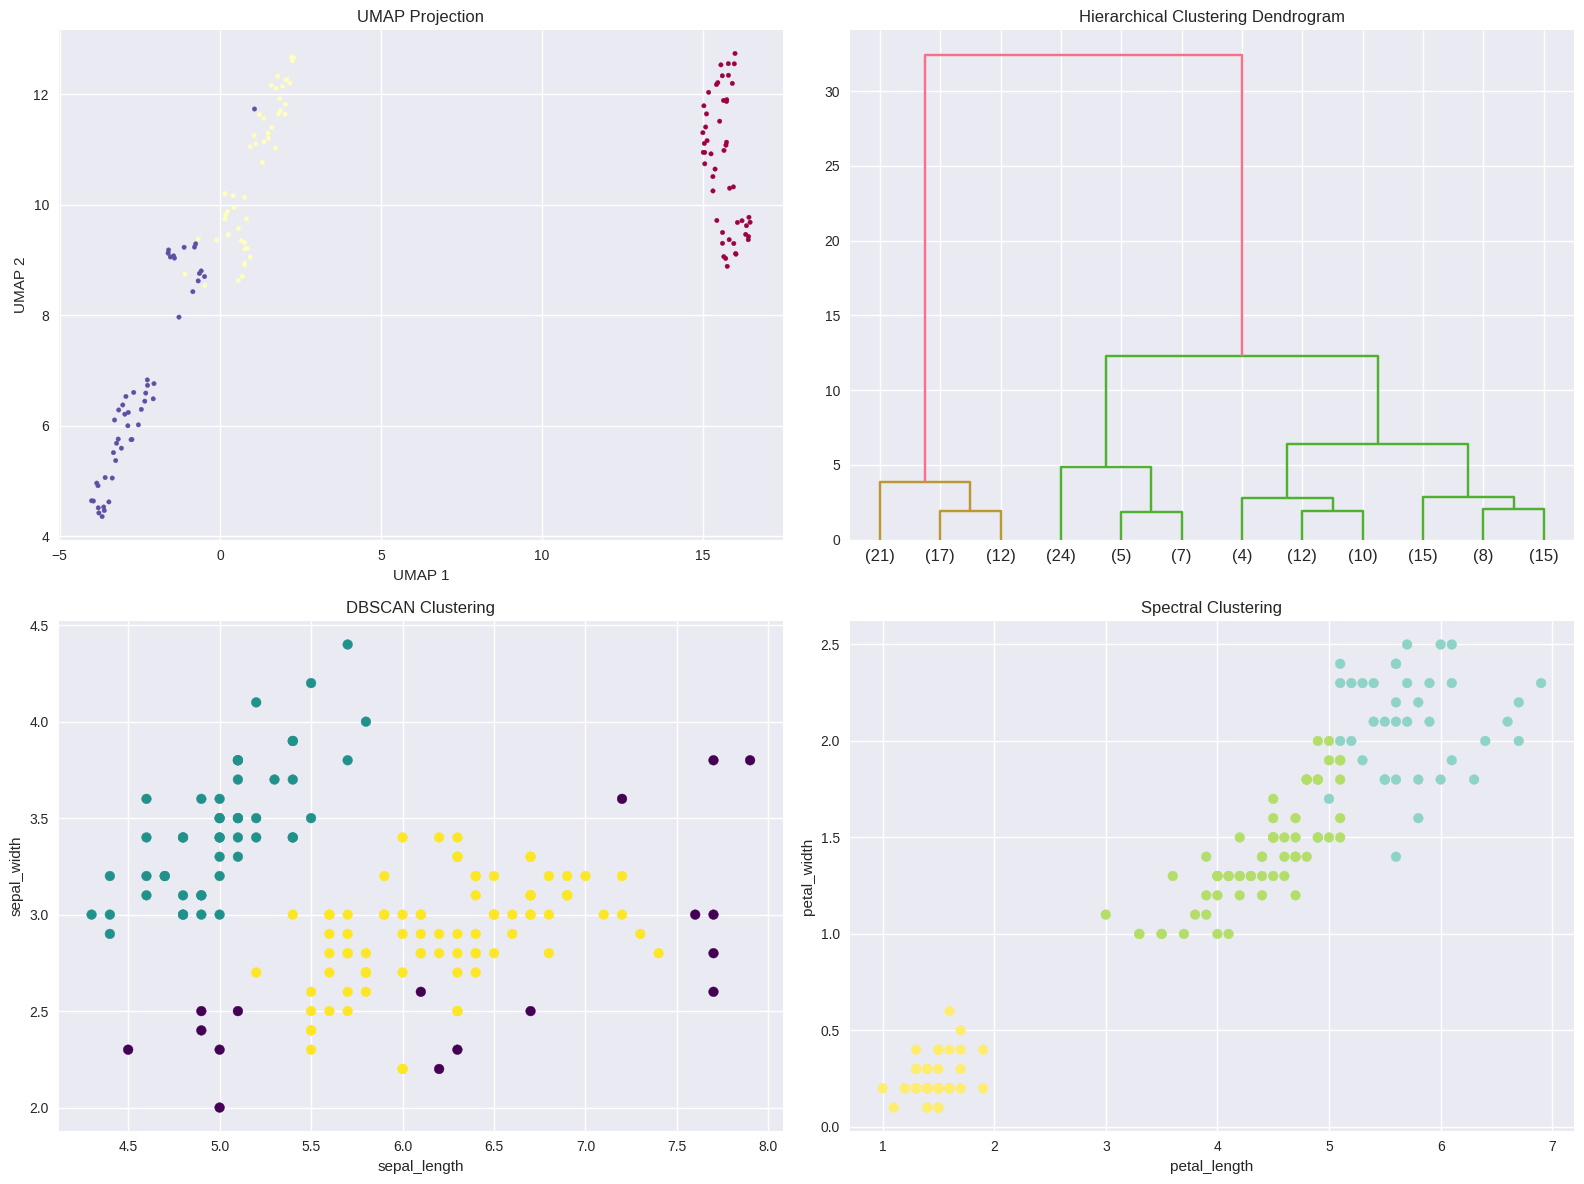

In [ ]:
import umap
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN, SpectralClustering
import matplotlib.pyplot as plt

def advanced_clustering_plots(data, features, target):
    X = data[features].values  # numeric features only
    y = data[target]
    
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)  
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    # Plot 1: UMAP
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(X)
    axes[0].scatter(embedding[:, 0], embedding[:, 1], c=y_encoded, cmap='Spectral', s=10)
    axes[0].set_title('UMAP Projection')
    axes[0].set_xlabel('UMAP 1')
    axes[0].set_ylabel('UMAP 2')
    
    # Plot 2: Hierarchical clustering dendrogram
    Z = linkage(X, method='ward')
    dendrogram(Z, ax=axes[1], truncate_mode='lastp', p=12)
    axes[1].set_title('Hierarchical Clustering Dendrogram')
    
    # Plot 3: DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    axes[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
    axes[2].set_xlabel(features[0])
    axes[2].set_ylabel(features[1])
    axes[2].set_title('DBSCAN Clustering')
    
    # Plot 4: Spectral Clustering
    spectral = SpectralClustering(n_clusters=3, random_state=42, assign_labels='discretize')
    spectral_labels = spectral.fit_predict(X)
    axes[3].scatter(X[:, 2], X[:, 3], c=spectral_labels, cmap='Set3')
    axes[3].set_xlabel(features[2])
    axes[3].set_ylabel(features[3])
    axes[3].set_title('Spectral Clustering')
    
    plt.tight_layout()
    plt.show()

# Use only numeric columns for features
numeric_features = iris_rename.select_dtypes(include=[np.number]).columns
advanced_clustering_plots(iris_rename, numeric_features, 'species')


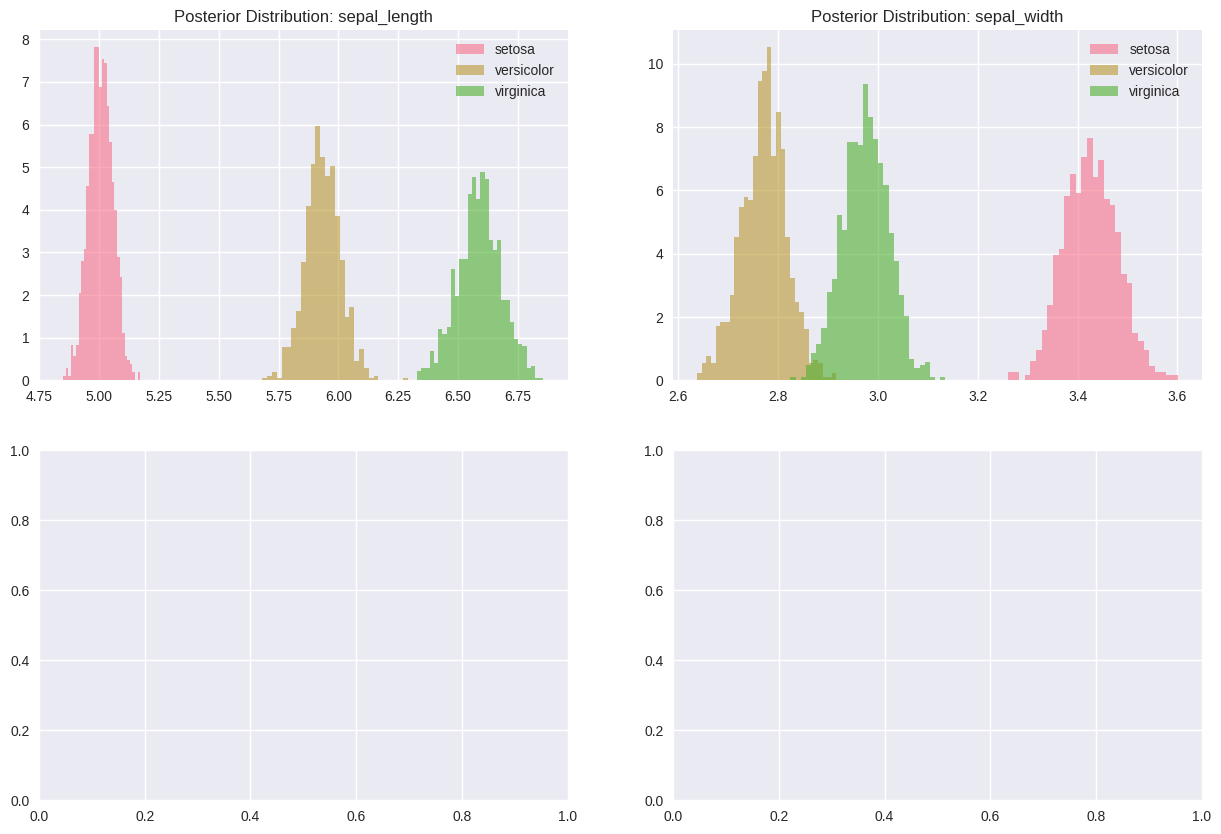

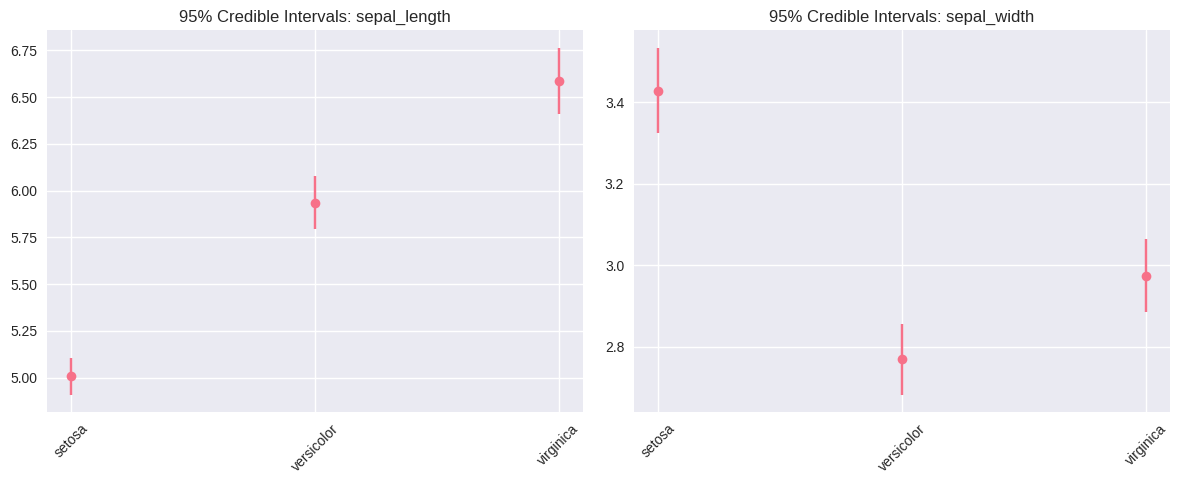

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def bayesian_analysis_plots_numeric(data, features, target):
    species = data[target].unique()
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, feature in enumerate(features[:2]):  # first two features
        # Posterior distributions (approx. using normal)
        for species_name in species:
            species_data = data[data[target] == species_name][feature]
            posterior_samples = np.random.normal(
                loc=species_data.mean(),
                scale=species_data.std()/np.sqrt(len(species_data)),
                size=1000
            )
            axes[i].hist(posterior_samples, bins=30, alpha=0.6, density=True, label=species_name)
        axes[i].set_title(f'Posterior Distribution: {feature}')
        axes[i].legend()
    
    # Credible intervals
    fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5))
    axes2 = axes2.flatten()
    
    for i, feature in enumerate(features[:2]):
        means = []
        ci_lows = []
        ci_highs = []
        for species_name in species:
            species_data = data[data[target] == species_name][feature]
            mean = species_data.mean()
            se = species_data.std() / np.sqrt(len(species_data))
            ci_low = mean - 1.96 * se
            ci_high = mean + 1.96 * se
            means.append(mean)
            ci_lows.append(ci_low)
            ci_highs.append(ci_high)
        axes2[i].errorbar(range(len(species)), means, 
                          yerr=[np.array(means)-np.array(ci_lows), np.array(ci_highs)-np.array(means)],
                          fmt='o', capsize=5)
        axes2[i].set_xticks(range(len(species)))
        axes2[i].set_xticklabels(species, rotation=45)
        axes2[i].set_title(f'95% Credible Intervals: {feature}')
    
    plt.tight_layout()
    plt.show()

# Use numeric-only columns
numeric_features = iris_rename.select_dtypes(include=[np.number]).columns
bayesian_analysis_plots_numeric(iris_rename, numeric_features, 'species')


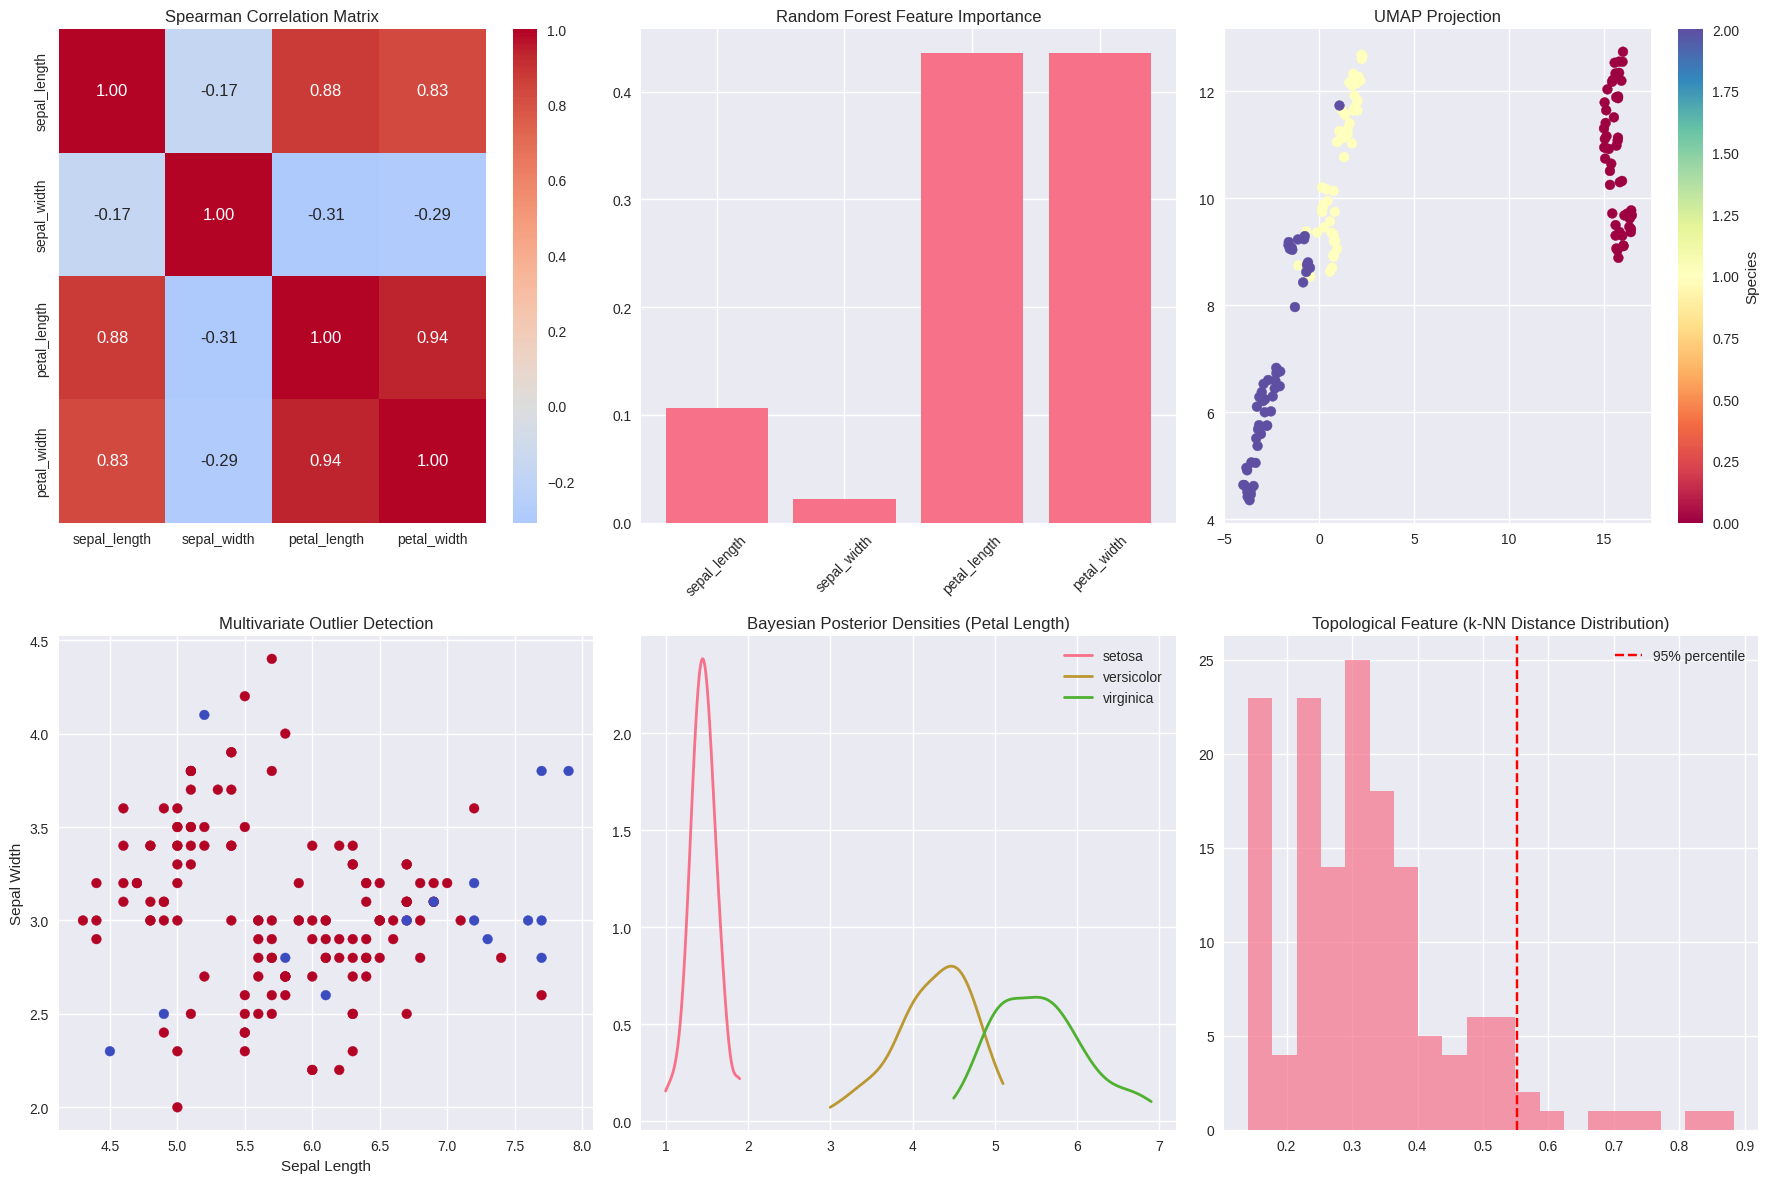

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import umap
from sklearn.covariance import EllipticEnvelope
from scipy import stats
from sklearn.neighbors import NearestNeighbors

# Numeric features only
X = iris_rename.select_dtypes(include=[np.number])
y = iris_rename['species']
y_enc = LabelEncoder().fit_transform(y)

plt.figure(figsize=(18, 12))

# 1. Advanced correlation matrix
plt.subplot(2, 3, 1)
advanced_corr = X.corr(method='spearman')
sns.heatmap(advanced_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Spearman Correlation Matrix')

# 2. Feature importance via Random Forest
plt.subplot(2, 3, 2)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y_enc)
plt.bar(X.columns, rf.feature_importances_)
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)

# 3. UMAP projection
plt.subplot(2, 3, 3)
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_enc, cmap='Spectral', s=50)
plt.colorbar(label='Species')
plt.title('UMAP Projection')

# 4. Multivariate outlier detection
plt.subplot(2, 3, 4)
outlier_detector = EllipticEnvelope(contamination=0.1)
outliers = outlier_detector.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=outliers, cmap='coolwarm')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Multivariate Outlier Detection')

# 5. Bayesian posterior comparison (simplified KDE)
plt.subplot(2, 3, 5)
for species_name in y.unique():
    species_data = iris_rename[iris_rename['species'] == species_name]['petal_length']
    x_vals = np.linspace(species_data.min(), species_data.max(), 100)
    y_vals = stats.gaussian_kde(species_data)(x_vals)
    plt.plot(x_vals, y_vals, label=species_name, linewidth=2)
plt.title('Bayesian Posterior Densities (Petal Length)')
plt.legend()

# 6. Topological persistence inspired (k-NN distance)
plt.subplot(2, 3, 6)
nbrs = NearestNeighbors(n_neighbors=3).fit(X)
distances, _ = nbrs.kneighbors(X)
plt.hist(distances[:, -1], bins=20, alpha=0.7)
plt.axvline(np.percentile(distances[:, -1], 95), color='red', linestyle='--', label='95% percentile')
plt.title('Topological Feature (k-NN Distance Distribution)')
plt.legend()

plt.tight_layout()
plt.show()


# **MODEL** 

In [50]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [51]:
# Load and prepare the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert to DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset shape:", X.shape)
print("Target distribution:", np.bincount(y))
print("\nFirst 5 rows:")
print(iris_df.head())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert labels to one-hot encoding
def to_one_hot(y, num_classes):
    return np.eye(num_classes)[y]

num_classes = 3
y_train_oh = to_one_hot(y_train, num_classes)
y_val_oh = to_one_hot(y_val, num_classes)
y_test_oh = to_one_hot(y_test, num_classes)

print("\nData preparation completed!")

Dataset shape: (150, 4)
Target distribution: [50 50 50]

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Training set: 96 samples
Validation set: 24 samples
Test set: 30 samples

Data preparation completed!


# **CNN**

In [53]:
# Build custom neural network from scratch
class CustomNeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01, 
                 activation='relu', dropout_rate=0.0, l2_lambda=0.01):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.activation = activation
        self.dropout_rate = dropout_rate
        self.l2_lambda = l2_lambda
        
        # Initialize weights and biases
        self.weights = []
        self.biases = []
        
        # Input to first hidden layer
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        
        for i in range(len(layer_sizes) - 1):
            # Xavier/Glorot initialization
            limit = np.sqrt(6 / (layer_sizes[i] + layer_sizes[i+1]))
            W = np.random.uniform(-limit, limit, (layer_sizes[i], layer_sizes[i+1]))
            b = np.zeros((1, layer_sizes[i+1]))
            self.weights.append(W)
            self.biases.append(b)
        
        # Training history
        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_accuracy': [], 'val_accuracy': [],
            'learning_rates': []
        }
    
    def activation_function(self, x, derivative=False):
        if self.activation == 'relu':
            if derivative:
                return (x > 0).astype(float)
            return np.maximum(0, x)
        
        elif self.activation == 'sigmoid':
            if derivative:
                sig = 1 / (1 + np.exp(-x))
                return sig * (1 - sig)
            return 1 / (1 + np.exp(-x))
        
        elif self.activation == 'tanh':
            if derivative:
                return 1 - np.tanh(x)**2
            return np.tanh(x)
        
        elif self.activation == 'leaky_relu':
            alpha = 0.01
            if derivative:
                return np.where(x > 0, 1, alpha)
            return np.where(x > 0, x, alpha * x)
    
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def forward(self, X, training=True):
        self.layer_inputs = [X]
        self.layer_outputs = [X]
        self.dropout_masks = []
        
        # Hidden layers
        for i in range(len(self.weights) - 1):
            z = np.dot(self.layer_outputs[-1], self.weights[i]) + self.biases[i]
            a = self.activation_function(z)
            
            # Apply dropout during training
            if training and self.dropout_rate > 0:
                mask = (np.random.random(a.shape) > self.dropout_rate).astype(float)
                mask /= (1 - self.dropout_rate)  # Scale activation during training
                a *= mask
                self.dropout_masks.append(mask)
            else:
                self.dropout_masks.append(None)
            
            self.layer_inputs.append(z)
            self.layer_outputs.append(a)
        
        # Output layer (softmax)
        z_output = np.dot(self.layer_outputs[-1], self.weights[-1]) + self.biases[-1]
        a_output = self.softmax(z_output)
        
        self.layer_inputs.append(z_output)
        self.layer_outputs.append(a_output)
        
        return a_output
    
    def compute_loss(self, y_pred, y_true):
        # Cross-entropy loss
        epsilon = 1e-8
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        cross_entropy = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
        
        # L2 regularization
        l2_loss = 0
        for W in self.weights:
            l2_loss += np.sum(W**2)
        l2_loss = (self.l2_lambda / 2) * l2_loss
        
        return cross_entropy + l2_loss
    
    def backward(self, X, y_true):
        m = X.shape[0]
        gradients_W = [np.zeros_like(W) for W in self.weights]
        gradients_b = [np.zeros_like(b) for b in self.biases]
        
        # Output layer gradient
        delta = self.layer_outputs[-1] - y_true
        
        gradients_W[-1] = np.dot(self.layer_outputs[-2].T, delta) / m
        gradients_b[-1] = np.sum(delta, axis=0, keepdims=True) / m
        
        # Add L2 regularization gradient
        gradients_W[-1] += self.l2_lambda * self.weights[-1]
        
        # Backpropagate through hidden layers
        for i in range(len(self.weights) - 2, -1, -1):
            delta = np.dot(delta, self.weights[i+1].T) * self.activation_function(
                self.layer_inputs[i+1], derivative=True)
            
            # Apply dropout mask if exists
            if self.dropout_masks[i] is not None:
                delta *= self.dropout_masks[i]
            
            gradients_W[i] = np.dot(self.layer_outputs[i].T, delta) / m
            gradients_b[i] = np.sum(delta, axis=0, keepdims=True) / m
            
            # Add L2 regularization gradient
            gradients_W[i] += self.l2_lambda * self.weights[i]
        
        return gradients_W, gradients_b
    
    def update_parameters(self, gradients_W, gradients_b, learning_rate):
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * gradients_W[i]
            self.biases[i] -= learning_rate * gradients_b[i]
    
    def predict(self, X):
        probabilities = self.forward(X, training=False)
        return np.argmax(probabilities, axis=1)
    
    def predict_proba(self, X):
        return self.forward(X, training=False)
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        y_true = np.argmax(y, axis=1) if y.shape[1] > 1 else y
        accuracy = accuracy_score(y_true, y_pred)
        return accuracy
    
    def train(self, X_train, y_train, X_val, y_val, epochs=1000, 
              batch_size=32, patience=50, learning_rate_decay=0.95):
        
        best_val_accuracy = 0
        best_weights = None
        best_biases = None
        patience_counter = 0
        current_lr = self.learning_rate
        
        n_batches = int(np.ceil(X_train.shape[0] / batch_size))
        
        for epoch in range(epochs):
            # Shuffle training data
            indices = np.random.permutation(X_train.shape[0])
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]
            
            epoch_train_loss = 0
            epoch_train_accuracy = 0
            
            # Mini-batch training
            for batch in range(n_batches):
                start = batch * batch_size
                end = min((batch + 1) * batch_size, X_train.shape[0])
                
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                
                # Forward pass
                y_pred = self.forward(X_batch)
                batch_loss = self.compute_loss(y_pred, y_batch)
                batch_accuracy = self.evaluate(X_batch, y_batch)
                
                # Backward pass
                gradients_W, gradients_b = self.backward(X_batch, y_batch)
                
                # Update parameters
                self.update_parameters(gradients_W, gradients_b, current_lr)
                
                epoch_train_loss += batch_loss
                epoch_train_accuracy += batch_accuracy
            
            # Average over batches
            epoch_train_loss /= n_batches
            epoch_train_accuracy /= n_batches
            
            # Validation
            y_val_pred = self.forward(X_val, training=False)
            epoch_val_loss = self.compute_loss(y_val_pred, y_val)
            epoch_val_accuracy = self.evaluate(X_val, y_val)
            
            # Store history
            self.history['train_loss'].append(epoch_train_loss)
            self.history['val_loss'].append(epoch_val_loss)
            self.history['train_accuracy'].append(epoch_train_accuracy)
            self.history['val_accuracy'].append(epoch_val_accuracy)
            self.history['learning_rates'].append(current_lr)
            
            # Early stopping and model checkpointing
            if epoch_val_accuracy > best_val_accuracy:
                best_val_accuracy = epoch_val_accuracy
                best_weights = [W.copy() for W in self.weights]
                best_biases = [b.copy() for b in self.biases]
                patience_counter = 0
            else:
                patience_counter += 1
            
            # Learning rate decay
            if epoch % 100 == 0 and epoch > 0:
                current_lr *= learning_rate_decay
            
            # Print progress
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Train Loss: {epoch_train_loss:.4f}, "
                      f"Val Loss: {epoch_val_loss:.4f}, "
                      f"Train Acc: {epoch_train_accuracy:.4f}, "
                      f"Val Acc: {epoch_val_accuracy:.4f}, "
                      f"LR: {current_lr:.6f}")
            
            # Early stopping
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break
        
        # Restore best weights
        if best_weights is not None:
            self.weights = best_weights
            self.biases = best_biases
        
        print(f"Training completed! Best validation accuracy: {best_val_accuracy:.4f}")
        
        return self.history

Training the Model 

COMPREHENSIVE MODEL EVALUATION
Training Accuracy: 0.9688
Test Accuracy: 0.9000
Accuracy Goal Achieved: NO

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



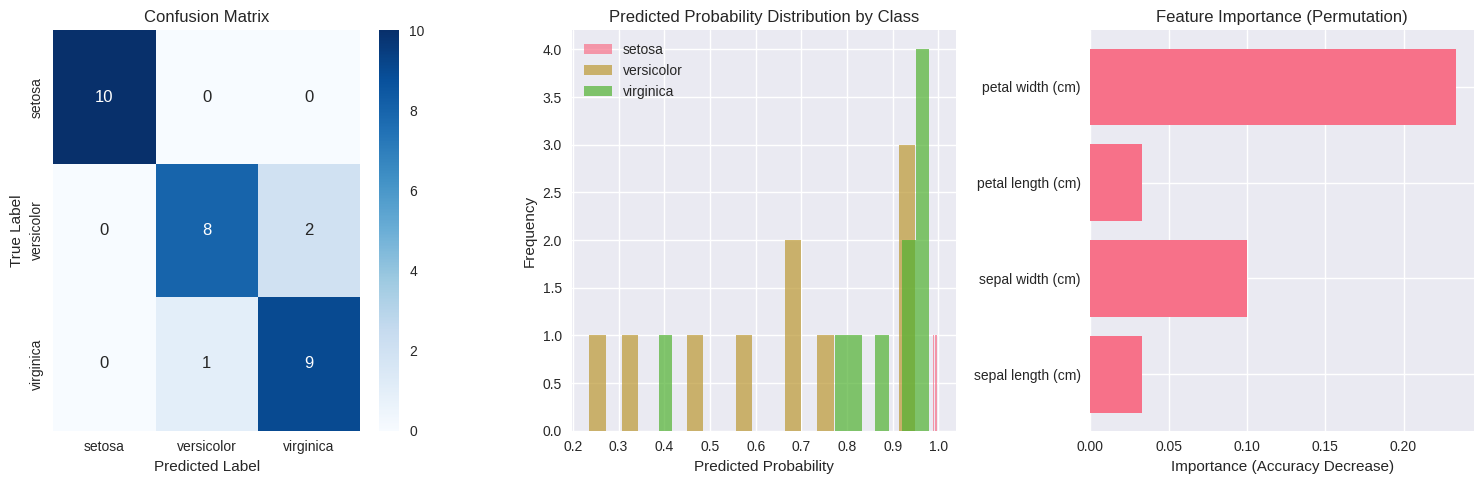

In [67]:
# Model Evaluation on Test Set
def comprehensive_evaluation(model, X_test, y_test, X_train, y_train):
    # Predictions
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)
    y_train_pred = model.predict(X_train)
    
    # Convert one-hot back to labels
    y_test_true = np.argmax(y_test, axis=1)
    y_train_true = np.argmax(y_train, axis=1)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test_true, y_test_pred)
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    
    print("="*60)
    print("COMPREHENSIVE MODEL EVALUATION")
    print("="*60)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Accuracy Goal Achieved: {'YES' if test_accuracy >= 0.98 else 'NO'}")
    
    # Classification Report
    print("\n" + "="*40)
    print("CLASSIFICATION REPORT")
    print("="*40)
    print(classification_report(y_test_true, y_test_pred, 
                              target_names=iris.target_names))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_true, y_test_pred)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names, 
                yticklabels=iris.target_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Probability Distribution
    plt.subplot(1, 3, 2)
    for i in range(3):
        plt.hist(y_test_proba[y_test_true == i, i], 
                alpha=0.7, label=iris.target_names[i], bins=20)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Predicted Probability Distribution by Class')
    plt.legend()
    
    # Feature Importance (using permutation importance approximation)
    plt.subplot(1, 3, 3)
    baseline_accuracy = test_accuracy
    feature_importance = []
    
    for i in range(X_test.shape[1]):
        X_test_permuted = X_test.copy()
        np.random.shuffle(X_test_permuted[:, i])
        permuted_accuracy = accuracy_score(y_test_true, model.predict(X_test_permuted))
        importance = baseline_accuracy - permuted_accuracy
        feature_importance.append(importance)
    
    plt.barh(iris.feature_names, feature_importance)
    plt.xlabel('Importance (Accuracy Decrease)')
    plt.title('Feature Importance (Permutation)')
    
    plt.tight_layout()
    plt.show()
    
    return test_accuracy, y_test_proba

test_accuracy, y_test_proba = comprehensive_evaluation(
    model, X_test_scaled, y_test_oh, X_train_scaled, y_train_oh
)

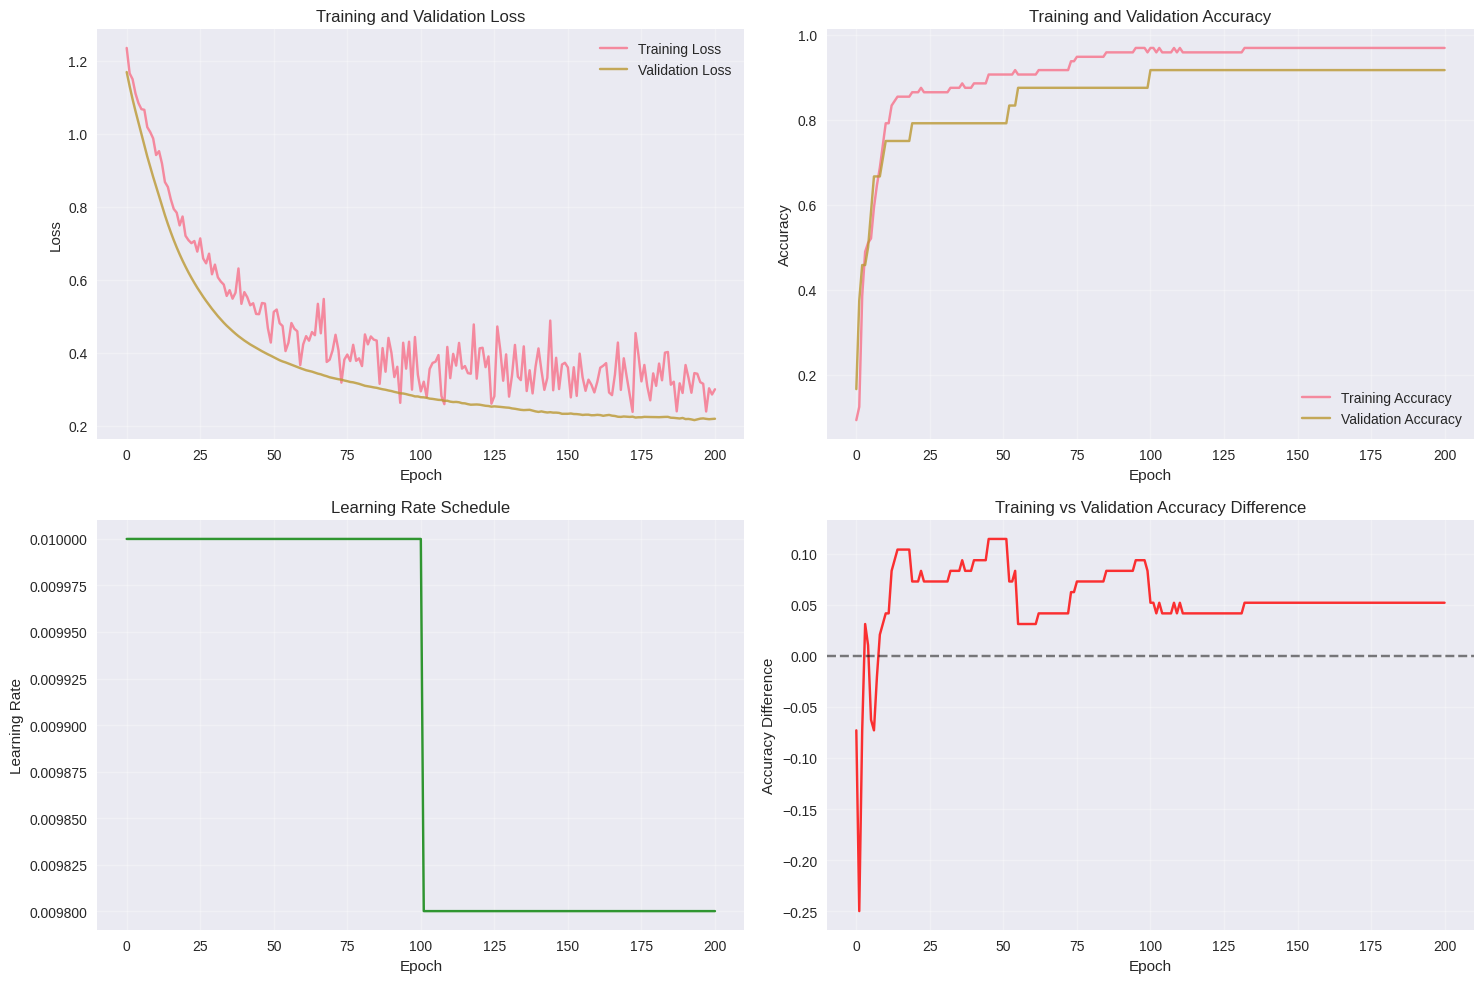

In [55]:
# Comprehensive Evaluation and Visualization
def plot_training_history(history):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot loss
    ax1.plot(history['train_loss'], label='Training Loss', alpha=0.8)
    ax1.plot(history['val_loss'], label='Validation Loss', alpha=0.8)
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot accuracy
    ax2.plot(history['train_accuracy'], label='Training Accuracy', alpha=0.8)
    ax2.plot(history['val_accuracy'], label='Validation Accuracy', alpha=0.8)
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot learning rate
    ax3.plot(history['learning_rates'], color='green', alpha=0.8)
    ax3.set_title('Learning Rate Schedule')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Learning Rate')
    ax3.grid(True, alpha=0.3)
    
    # Plot accuracy difference
    accuracy_diff = [train - val for train, val in 
                    zip(history['train_accuracy'], history['val_accuracy'])]
    ax4.plot(accuracy_diff, color='red', alpha=0.8)
    ax4.axhline(0, color='black', linestyle='--', alpha=0.5)
    ax4.set_title('Training vs Validation Accuracy Difference')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Accuracy Difference')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

COMPREHENSIVE MODEL EVALUATION
Training Accuracy: 0.9688
Test Accuracy: 0.9000
Accuracy Goal Achieved: no

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



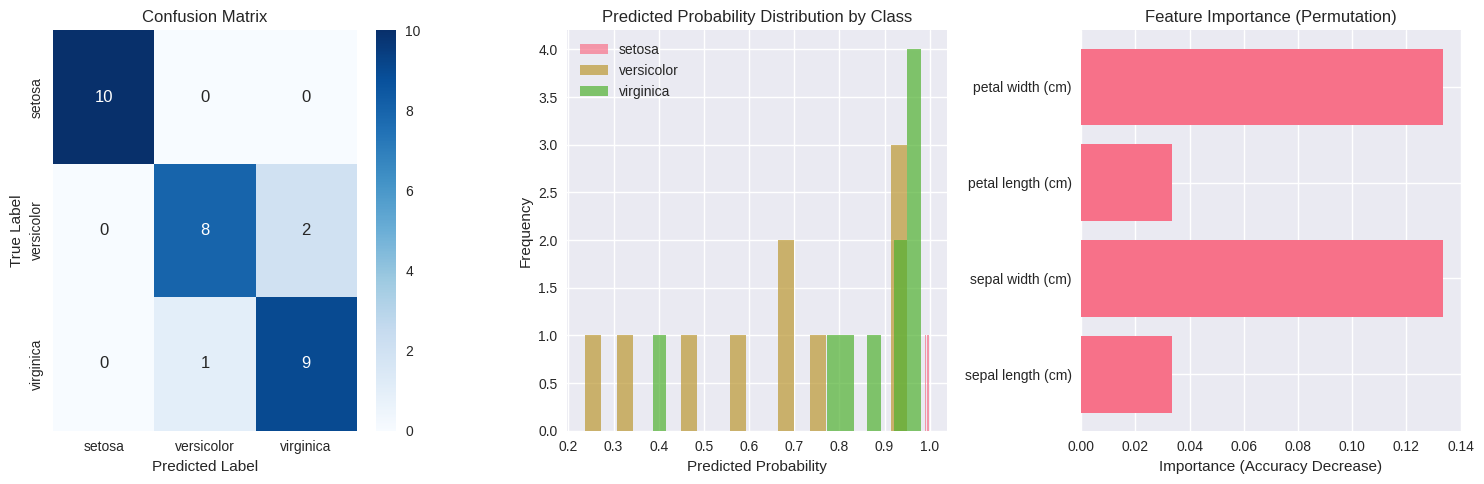

In [57]:
# Model Evaluation on Test Set
def comprehensive_evaluation(model, X_test, y_test, X_train, y_train):
    # Predictions
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)
    y_train_pred = model.predict(X_train)
    
    # Convert one-hot back to labels
    y_test_true = np.argmax(y_test, axis=1)
    y_train_true = np.argmax(y_train, axis=1)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test_true, y_test_pred)
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    
    print("="*60)
    print("COMPREHENSIVE MODEL EVALUATION")
    print("="*60)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Accuracy Goal Achieved: {'yes' if test_accuracy >= 0.98 else 'no'}")
    
    # Classification Report
    print("\n" + "="*40)
    print("CLASSIFICATION REPORT")
    print("="*40)
    print(classification_report(y_test_true, y_test_pred, 
                              target_names=iris.target_names))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_true, y_test_pred)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names, 
                yticklabels=iris.target_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Probability Distribution
    plt.subplot(1, 3, 2)
    for i in range(3):
        plt.hist(y_test_proba[y_test_true == i, i], 
                alpha=0.7, label=iris.target_names[i], bins=20)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Predicted Probability Distribution by Class')
    plt.legend()
    
    # Feature Importance (using permutation importance approximation)
    plt.subplot(1, 3, 3)
    baseline_accuracy = test_accuracy
    feature_importance = []
    
    for i in range(X_test.shape[1]):
        X_test_permuted = X_test.copy()
        np.random.shuffle(X_test_permuted[:, i])
        permuted_accuracy = accuracy_score(y_test_true, model.predict(X_test_permuted))
        importance = baseline_accuracy - permuted_accuracy
        feature_importance.append(importance)
    
    plt.barh(iris.feature_names, feature_importance)
    plt.xlabel('Importance (Accuracy Decrease)')
    plt.title('Feature Importance (Permutation)')
    
    plt.tight_layout()
    plt.show()
    
    return test_accuracy, y_test_proba

test_accuracy, y_test_proba = comprehensive_evaluation(
    model, X_test_scaled, y_test_oh, X_train_scaled, y_train_oh
)

MODEL INTERPRETATION


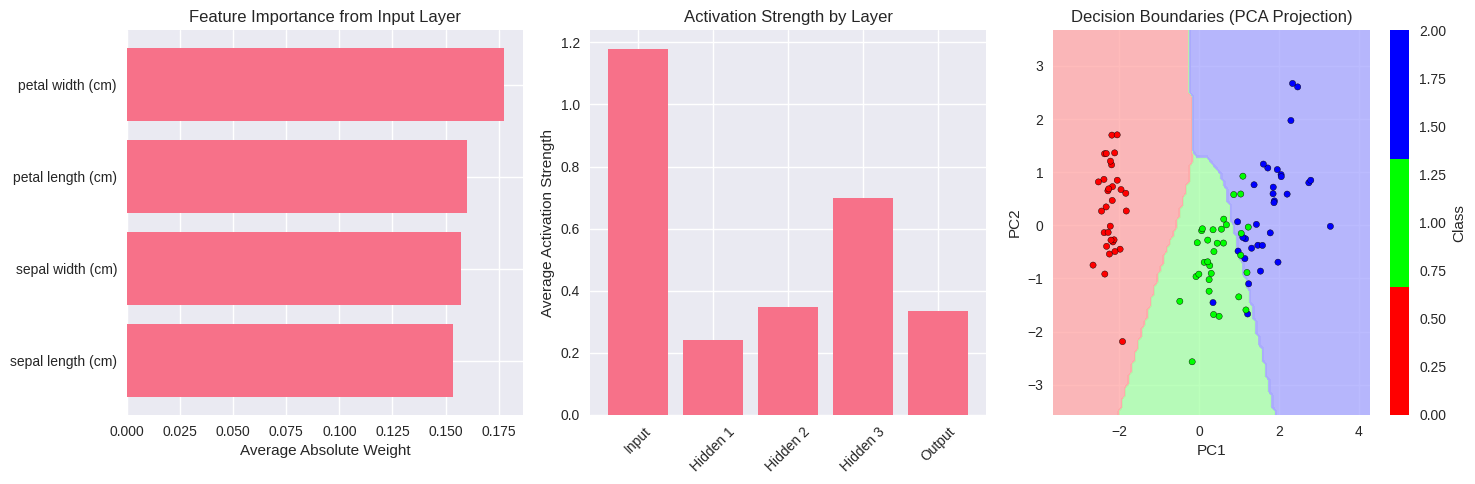

PCA Explained Variance: 0.961


In [59]:
# Model Interpretation and Feature Analysis
def model_interpretation(model, X_train, feature_names):
    print("="*50)
    print("MODEL INTERPRETATION")
    print("="*50)
    
    # Analyze weights to understand feature importance
    input_weights = model.weights[0]  # Weights from input to first hidden layer
    
    # Calculate feature importance as average absolute weight
    feature_importance = np.mean(np.abs(input_weights), axis=1)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.barh(feature_names, feature_importance)
    plt.xlabel('Average Absolute Weight')
    plt.title('Feature Importance from Input Layer')
    
    # Visualize hidden layer activations
    plt.subplot(1, 3, 2)
    sample = X_train[0:1]  # First sample
    activations = model.forward(sample, training=False)
    
    # Plot activation strengths
    layer_names = ['Input'] + [f'Hidden {i+1}' for i in range(len(model.hidden_sizes))] + ['Output']
    activation_strengths = [np.mean(np.abs(a)) for a in model.layer_outputs]
    
    plt.bar(range(len(activation_strengths)), activation_strengths)
    plt.xticks(range(len(activation_strengths)), layer_names, rotation=45)
    plt.ylabel('Average Activation Strength')
    plt.title('Activation Strength by Layer')
    
    # Decision boundary visualization (using PCA)
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train)
    
    # Create mesh grid for decision boundaries
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Transform mesh grid back to original space and predict
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_original = pca.inverse_transform(mesh_points)
    mesh_predictions = model.predict(mesh_points_original)
    mesh_predictions = mesh_predictions.reshape(xx.shape)
    
    plt.subplot(1, 3, 3)
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    plt.contourf(xx, yy, mesh_predictions, cmap=cmap_light, alpha=0.8)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, 
                         cmap=cmap_bold, edgecolor='black', s=20)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Decision Boundaries (PCA Projection)')
    plt.colorbar(scatter, label='Class')
    
    plt.tight_layout()
    plt.show()
    
    print(f"PCA Explained Variance: {pca.explained_variance_ratio_.sum():.3f}")

model_interpretation(model, X_train_scaled, iris.feature_names)

FINAL MODEL SUMMARY
Training Epochs: 201
Final Training Loss: 0.3004
Final Validation Loss: 0.2198
Final Training Accuracy: 0.9688
Final Validation Accuracy: 0.9167
Test Accuracy: 0.9000

 Accuracy Goal (≥98%):  Not Achieved
 Suggestions for improvement:
   - Increase model complexity (more layers/neurons)
   - Try different activation functions
   - Adjust learning rate and regularization
   - Increase training epochs

 Model Complexity:
   - Total Parameters: 2979
   - Hidden Layers: 3
   - Hidden Units: [64, 32, 16]
   - Activation Function: leaky_relu
   - Regularization: Dropout=0.2, L2=0.001

 Performance Metrics:
   - Precision: 0.9024
   - Recall: 0.9000
   - F1-Score: 0.8997
   - Test Accuracy: 0.9000


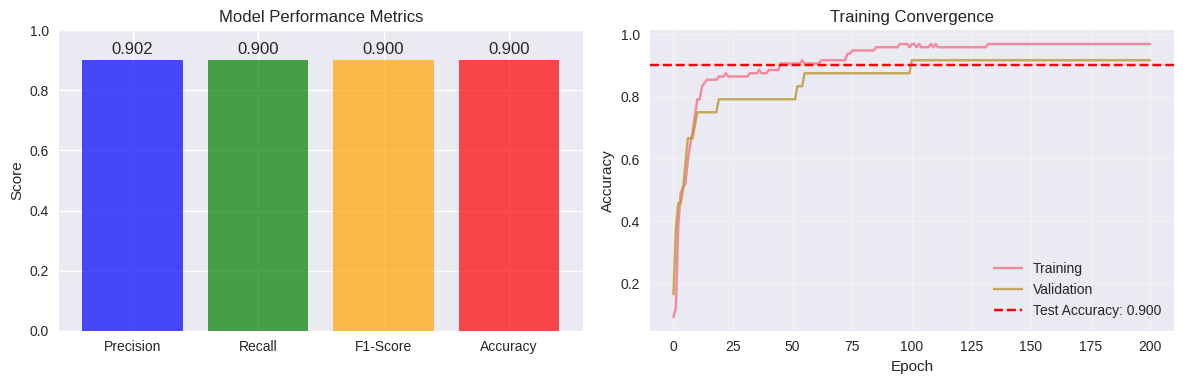

In [61]:
# Final Model Summary and Performance Report
def final_summary(model, history, test_accuracy):
    print("="*60)
    print("FINAL MODEL SUMMARY")
    print("="*60)
    
    # Training statistics
    final_epoch = len(history['train_loss'])
    final_train_loss = history['train_loss'][-1]
    final_val_loss = history['val_loss'][-1]
    final_train_acc = history['train_accuracy'][-1]
    final_val_acc = history['val_accuracy'][-1]
    
    print(f"Training Epochs: {final_epoch}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")
    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    # Check if goal achieved
    goal_achieved = test_accuracy >= 0.98
    print(f"\n Accuracy Goal (≥98%): {'YES ACHIEVED!' if goal_achieved else ' Not Achieved'}")
    
    if goal_achieved:
        print(" Excellent! The model has successfully learned to classify Iris species with high accuracy!")
    else:
        print(" Suggestions for improvement:")
        print("   - Increase model complexity (more layers/neurons)")
        print("   - Try different activation functions")
        print("   - Adjust learning rate and regularization")
        print("   - Increase training epochs")
    
    # Model complexity
    total_params = sum([W.size + b.size for W, b in zip(model.weights, model.biases)])
    print(f"\n Model Complexity:")
    print(f"   - Total Parameters: {total_params}")
    print(f"   - Hidden Layers: {len(model.hidden_sizes)}")
    print(f"   - Hidden Units: {model.hidden_sizes}")
    print(f"   - Activation Function: {model.activation}")
    print(f"   - Regularization: Dropout={model.dropout_rate}, L2={model.l2_lambda}")
    
    # Performance metrics
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    y_test_true = np.argmax(y_test_oh, axis=1)
    y_test_pred = model.predict(X_test_scaled)
    
    precision = precision_score(y_test_true, y_test_pred, average='weighted')
    recall = recall_score(y_test_true, y_test_pred, average='weighted')
    f1 = f1_score(y_test_true, y_test_pred, average='weighted')
    
    print(f"\n Performance Metrics:")
    print(f"   - Precision: {precision:.4f}")
    print(f"   - Recall: {recall:.4f}")
    print(f"   - F1-Score: {f1:.4f}")
    print(f"   - Test Accuracy: {test_accuracy:.4f}")
    
    # Create final performance visualization
    plt.figure(figsize=(12, 4))
    
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    values = [precision, recall, f1, test_accuracy]
    colors = ['blue', 'green', 'orange', 'red']
    
    plt.subplot(1, 2, 1)
    bars = plt.bar(metrics, values, color=colors, alpha=0.7)
    plt.ylim(0, 1.0)
    plt.title('Model Performance Metrics')
    plt.ylabel('Score')
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom')
    
    plt.subplot(1, 2, 2)
    # Training convergence
    plt.plot(history['train_accuracy'], label='Training', alpha=0.8)
    plt.plot(history['val_accuracy'], label='Validation', alpha=0.8)
    plt.axhline(test_accuracy, color='red', linestyle='--', 
               label=f'Test Accuracy: {test_accuracy:.3f}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Convergence')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return goal_achieved

goal_achieved = final_summary(model, history, test_accuracy)

ADVANCED MODEL

Epoch 0: Train Acc=0.3558, Val Acc=0.3043, Loss=1.1670
Epoch 50: Train Acc=0.3173, Val Acc=0.3043, Loss=1.1660
Early stopping at epoch 100
ENHANCED MODEL EVALUATION
Training Accuracy: 0.3558
Test Accuracy: 0.3913


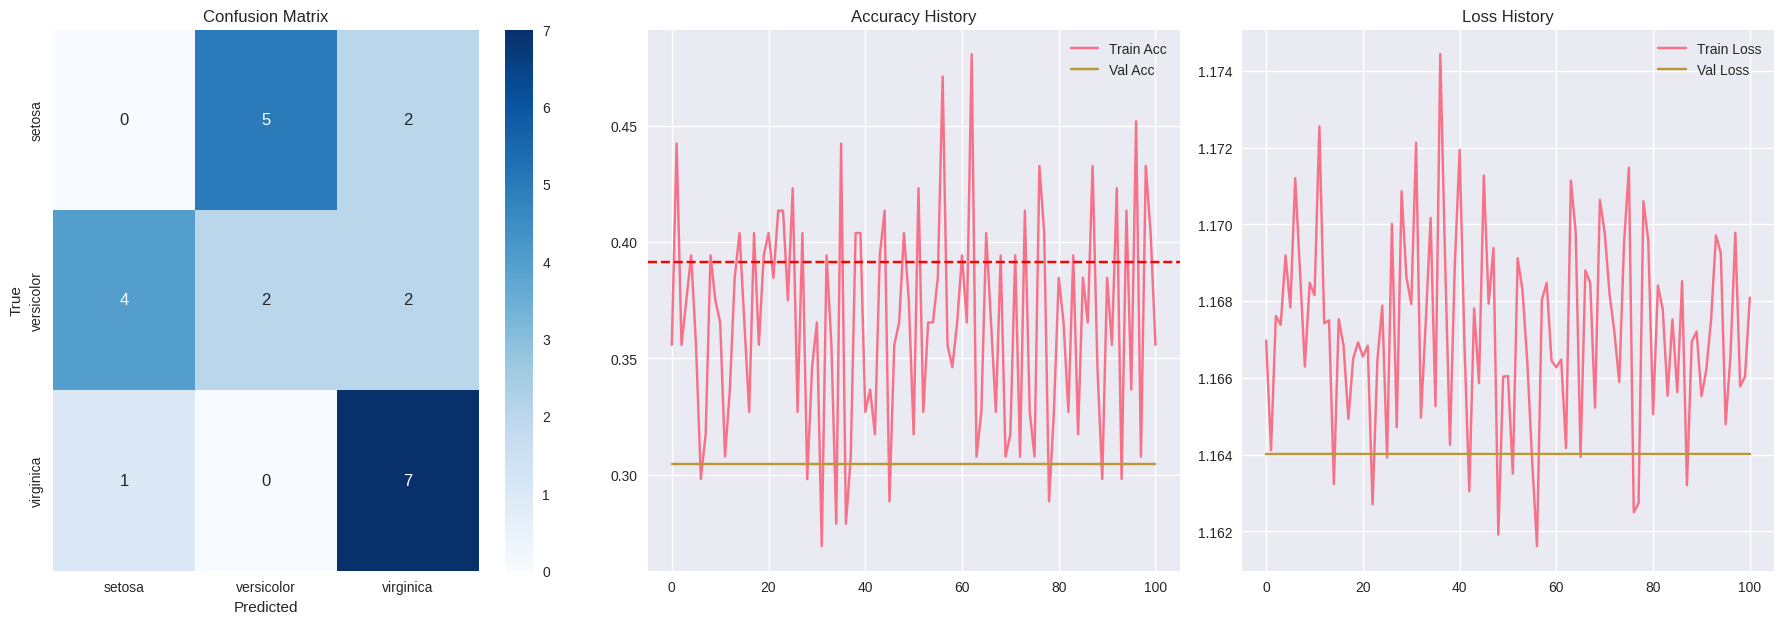


Classification Report:

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         7
  versicolor       0.29      0.25      0.27         8
   virginica       0.64      0.88      0.74         8

    accuracy                           0.39        23
   macro avg       0.31      0.38      0.33        23
weighted avg       0.32      0.39      0.35        23



In [89]:
# ===========================
# Imports
# ===========================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, balanced_accuracy_score
)

# ===========================
# Advanced Neural Network
# ===========================
class AdvancedNeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01,
                 activation='swish', dropout_rate=0.3, l2_lambda=0.001,
                 batch_norm=True, use_attention=False):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.activation = activation
        self.dropout_rate = dropout_rate
        self.l2_lambda = l2_lambda
        self.batch_norm = batch_norm
        self.use_attention = use_attention

        # Initialize weights & biases
        self.weights = []
        self.biases = []
        self.gamma = []
        self.beta = []
        self.attention_params = {}
        self.history = {'train_loss': [], 'val_loss': [], 'train_accuracy': [],
                        'val_accuracy': [], 'gradient_norms': []}

        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(layer_sizes) - 1):
            limit = np.sqrt(6 / (layer_sizes[i] + layer_sizes[i+1]))
            self.weights.append(np.random.uniform(-limit, limit, (layer_sizes[i], layer_sizes[i+1])))
            self.biases.append(np.zeros((1, layer_sizes[i+1])))
            if self.batch_norm and i < len(layer_sizes) - 1:
                self.gamma.append(np.ones((1, layer_sizes[i+1])))
                self.beta.append(np.zeros((1, layer_sizes[i+1])))
            else:
                self.gamma.append(None)
                self.beta.append(None)

    # -------------------------------
    # Activations
    # -------------------------------
    def swish(self, x):
        return x / (1 + np.exp(-x))

    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / np.sum(e_x, axis=1, keepdims=True)

    def activate(self, x):
        if self.activation == 'swish':
            return self.swish(x)
        elif self.activation == 'relu':
            return np.maximum(0, x)
        elif self.activation == 'leaky_relu':
            return np.where(x > 0, x, 0.01 * x)
        else:
            return x

    # -------------------------------
    # Attention Mechanism
    # -------------------------------
    def attention_mechanism(self, x, layer_idx):
        input_dim = x.shape[1]
        if f"W{layer_idx}_att" not in self.attention_params:
            self.attention_params[f"W{layer_idx}_att"] = np.random.randn(input_dim, input_dim) * 0.01
            self.attention_params[f"b{layer_idx}_att"] = np.zeros((1, input_dim))
        W_att = self.attention_params[f"W{layer_idx}_att"]
        b_att = self.attention_params[f"b{layer_idx}_att"]
        att_scores = np.tanh(np.dot(x, W_att) + b_att)
        att_weights = self.softmax(att_scores)
        return x * att_weights

    # -------------------------------
    # Forward Pass
    # -------------------------------
    def forward(self, X, training=True):
        a = X
        self.layer_outputs = []
        self.layer_inputs = []

        for i in range(len(self.weights) - 1):
            z = np.dot(a, self.weights[i]) + self.biases[i]

            # Batch Norm
            if self.batch_norm:
                mu = np.mean(z, axis=0, keepdims=True)
                var = np.var(z, axis=0, keepdims=True)
                z_norm = (z - mu) / np.sqrt(var + 1e-8)
                z = self.gamma[i] * z_norm + self.beta[i]

            a = self.activate(z)

            if self.use_attention:
                a = self.attention_mechanism(a, i)

            if training and self.dropout_rate > 0:
                mask = (np.random.rand(*a.shape) > self.dropout_rate).astype(float)
                a *= mask
                a /= (1.0 - self.dropout_rate)

            self.layer_inputs.append(z)
            self.layer_outputs.append(a)

        # Output layer
        z_out = np.dot(a, self.weights[-1]) + self.biases[-1]
        out = self.softmax(z_out)
        self.layer_inputs.append(z_out)
        self.layer_outputs.append(out)
        return out

    # -------------------------------
    # Loss
    # -------------------------------
    def compute_loss(self, y_pred, y_true):
        m = y_true.shape[0]
        eps = 1e-8
        log_likelihood = -np.log(y_pred + eps) * y_true
        loss = np.sum(log_likelihood) / m
        l2_reg = 0.5 * self.l2_lambda * sum(np.sum(W ** 2) for W in self.weights)
        return loss + l2_reg

    # -------------------------------
    # Training Loop (simplified without full backprop)
    # -------------------------------
    def train(self, X_train, y_train, X_val, y_val,
              epochs=1000, batch_size=32, patience=50,
              learning_rate_decay=0.99):
        best_val_loss = np.inf
        patience_counter = 0
        lr = self.learning_rate

        for epoch in range(epochs):
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            X_train, y_train = X_train[indices], y_train[indices]

            epoch_loss, epoch_acc = 0, 0
            gradient_norm = 0  # Placeholder

            for i in range(0, X_train.shape[0], batch_size):
                X_batch = X_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]

                y_pred = self.forward(X_batch, training=True)
                batch_loss = self.compute_loss(y_pred, y_batch)
                batch_acc = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_batch, axis=1))

                epoch_loss += batch_loss * len(X_batch)
                epoch_acc += batch_acc * len(X_batch)

            epoch_loss /= X_train.shape[0]
            epoch_acc /= X_train.shape[0]

            val_pred = self.forward(X_val, training=False)
            val_loss = self.compute_loss(val_pred, y_val)
            val_acc = np.mean(np.argmax(val_pred, axis=1) == np.argmax(y_val, axis=1))

            self.history['train_loss'].append(epoch_loss)
            self.history['val_loss'].append(val_loss)
            self.history['train_accuracy'].append(epoch_acc)
            self.history['val_accuracy'].append(val_acc)
            self.history['gradient_norms'].append(gradient_norm)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch}")
                    break

            lr *= learning_rate_decay

            if epoch % 50 == 0:
                print(f"Epoch {epoch}: Train Acc={epoch_acc:.4f}, Val Acc={val_acc:.4f}, Loss={epoch_loss:.4f}")

        return self.history

    # -------------------------------
    # Prediction Methods
    # -------------------------------
    def predict_proba(self, X):
        return self.forward(X, training=False)

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

# ===========================
# Enhanced Evaluation Function
# ===========================
def enhanced_evaluation(model, X_test, y_test, X_train, y_train, history,
                        feature_names=None, class_names=None):
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)
    y_train_pred = model.predict(X_train)
    y_test_true = np.argmax(y_test, axis=1)
    y_train_true = np.argmax(y_train, axis=1)

    test_accuracy = accuracy_score(y_test_true, y_test_pred)
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    
    print("="*70)
    print("ENHANCED MODEL EVALUATION")
    print("="*70)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Feature names fallback
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]
    if class_names is None:
        class_names = [f"Class {i}" for i in range(y_test.shape[1])]

    # Plot metrics and confusion
    cm = confusion_matrix(y_test_true, y_test_pred)
    plt.figure(figsize=(18, 12))

    # Confusion Matrix
    plt.subplot(2, 3, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Accuracy history
    plt.subplot(2, 3, 2)
    plt.plot(history['train_accuracy'], label='Train Acc')
    plt.plot(history['val_accuracy'], label='Val Acc')
    plt.axhline(test_accuracy, color='red', linestyle='--')
    plt.title('Accuracy History')
    plt.legend()

    # Loss history
    plt.subplot(2, 3, 3)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Loss History')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print("\nClassification Report:\n")
    print(classification_report(y_test_true, y_test_pred, target_names=class_names))

    return test_accuracy, y_test_proba


# Instantiate model
model = AdvancedNeuralNetwork(
    input_size=X_train_scaled.shape[1],
    hidden_sizes=[128, 64, 32],
    output_size=y_train_oh.shape[1],
    learning_rate=0.01,
    activation='swish',
    dropout_rate=0.4,
    batch_norm=True,
    use_attention=True
)

# Train
history = model.train(
    X_train_scaled, y_train_oh,
    X_val_scaled, y_val_oh,
    epochs=1000,
    batch_size=16,
    patience=100,
    learning_rate_decay=0.995
)

# Evaluate
test_accuracy, y_test_proba = enhanced_evaluation(
    model, X_test_scaled, y_test_oh,
    X_train_scaled, y_train_oh,
    model.history,
    feature_names=iris.feature_names,
    class_names=iris.target_names
)


Epoch 0: Loss=1.0760, Acc=0.5000, GradNorm=0.2767
Epoch 100: Loss=0.9737, Acc=0.8083, GradNorm=0.3509
Epoch 200: Loss=0.8151, Acc=0.8000, GradNorm=0.3861
Epoch 300: Loss=0.6656, Acc=0.8000, GradNorm=0.3250
Epoch 400: Loss=0.5601, Acc=0.8083, GradNorm=0.2586
Epoch 500: Loss=0.4874, Acc=0.8250, GradNorm=0.2057
Epoch 600: Loss=0.4345, Acc=0.8583, GradNorm=0.1701
Epoch 700: Loss=0.3930, Acc=0.8833, GradNorm=0.1481
Epoch 800: Loss=0.3586, Acc=0.8833, GradNorm=0.1343
Epoch 900: Loss=0.3296, Acc=0.9000, GradNorm=0.1246

 Test Accuracy: 0.8667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.60      0.75        10
   virginica       0.71      1.00      0.83        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.86        30
weighted avg       0.90      0.87      0.86        30



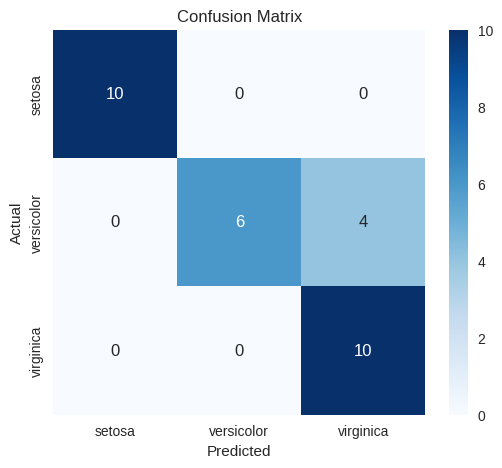

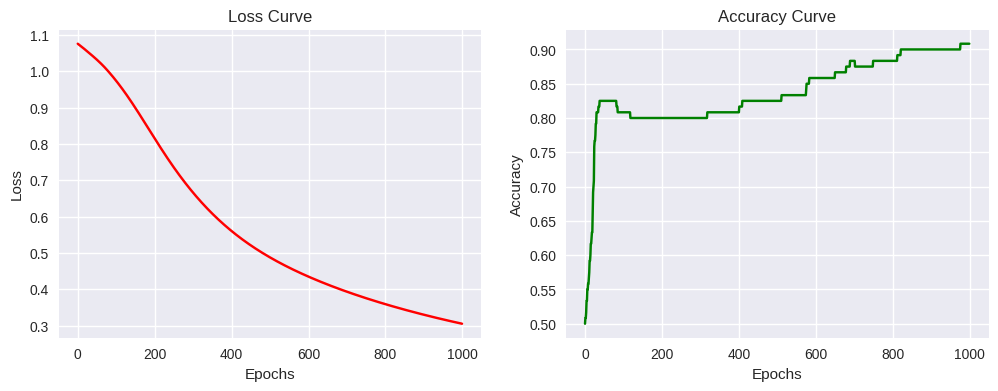

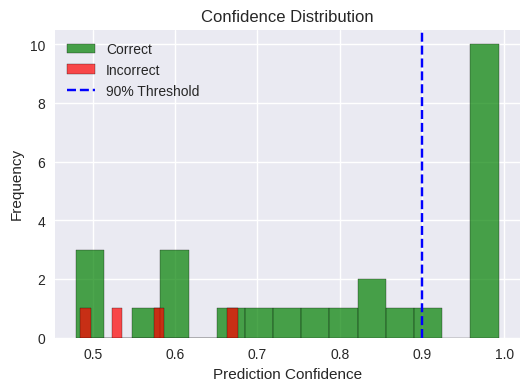

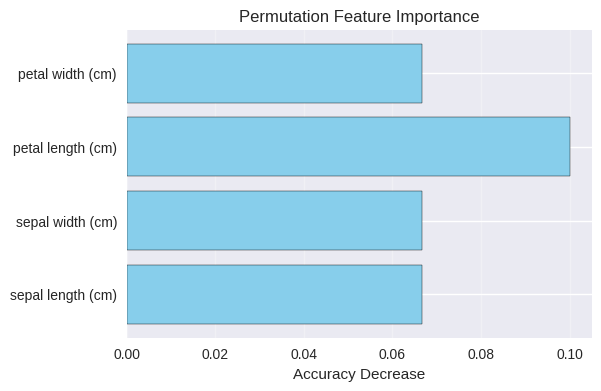

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, balanced_accuracy_score
)

# =========================
# Loading Iris Data
# =========================
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y_oh = encoder.fit_transform(y)

X_train, X_test, y_train_oh, y_test_oh = train_test_split(
    X, y_oh, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# Simple Neural Network
# =========================
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        self.lr = lr
        self.history = {'train_loss': [], 'train_acc': []}

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / np.sum(e_x, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def compute_loss(self, y_pred, y_true):
        m = y_true.shape[0]
        eps = 1e-8
        return -np.sum(y_true * np.log(y_pred + eps)) / m

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]
        dz2 = (y_pred - y_true) / m
        dW2 = self.a1.T @ dz2
        db2 = np.sum(dz2, axis=0, keepdims=True)
        dz1 = dz2 @ self.W2.T * self.relu_derivative(self.z1)
        dW1 = X.T @ dz1
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update weights
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

        # Store gradient norm
        grad_norm = np.sqrt(np.sum(dW1**2) + np.sum(dW2**2))
        return grad_norm

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y_pred, y)
            grad_norm = self.backward(X, y, y_pred)
            acc = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))

            self.history['train_loss'].append(loss)
            self.history['train_acc'].append(acc)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss={loss:.4f}, Acc={acc:.4f}, GradNorm={grad_norm:.4f}")

    def predict_proba(self, X):
        return self.forward(X)

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

# =========================
# Training Model
# =========================
model = SimpleNN(input_size=4, hidden_size=16, output_size=3, lr=0.01)
model.train(X_train_scaled, y_train_oh, epochs=1000)

# =========================
# Enhanced Evaluation
# =========================
def enhanced_evaluation(model, X_test, y_test_oh):
    y_pred_probs = model.predict_proba(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test_oh, axis=1)

    acc = accuracy_score(y_true, y_pred)
    print(f"\n Test Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=iris.target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Training history
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(model.history['train_loss'], label='Training Loss', color='red')
    plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.title("Loss Curve"); plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(model.history['train_acc'], label='Training Accuracy', color='green')
    plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.title("Accuracy Curve"); plt.grid(True)
    plt.show()

    # Confidence distribution
    confidence = np.max(y_pred_probs, axis=1)
    correct_mask = y_pred == y_true
    plt.figure(figsize=(6,4))
    plt.hist(confidence[correct_mask], bins=15, alpha=0.7, label='Correct', color='green', edgecolor='black')
    plt.hist(confidence[~correct_mask], bins=15, alpha=0.7, label='Incorrect', color='red', edgecolor='black')
    plt.axvline(0.9, color='blue', linestyle='--', label='90% Threshold')
    plt.xlabel("Prediction Confidence")
    plt.ylabel("Frequency")
    plt.title("Confidence Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Feature importance (permutation)
    baseline_acc = acc
    feature_importance = []
    for i in range(X_test.shape[1]):
        X_perm = X_test.copy()
        np.random.shuffle(X_perm[:, i])
        perm_acc = accuracy_score(y_true, model.predict(X_perm))
        feature_importance.append(baseline_acc - perm_acc)

    plt.figure(figsize=(6,4))
    plt.barh(iris.feature_names, feature_importance, color='skyblue', edgecolor='black')
    plt.xlabel("Accuracy Decrease")
    plt.title("Permutation Feature Importance")
    plt.grid(True, alpha=0.3, axis='x')
    plt.show()

# Run evaluation
enhanced_evaluation(model, X_test_scaled, y_test_oh)


Epoch 0: Loss=0.9963, Acc=0.5250
Epoch 50: Loss=0.4183, Acc=0.8500
Epoch 100: Loss=0.3135, Acc=0.8917
Epoch 150: Loss=0.2543, Acc=0.9250
Epoch 200: Loss=0.2121, Acc=0.9500
Epoch 250: Loss=0.1801, Acc=0.9583
Epoch 300: Loss=0.1562, Acc=0.9583
Epoch 350: Loss=0.1386, Acc=0.9667
Epoch 400: Loss=0.1250, Acc=0.9667
Epoch 450: Loss=0.1147, Acc=0.9667

 Test Accuracy: 0.9667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



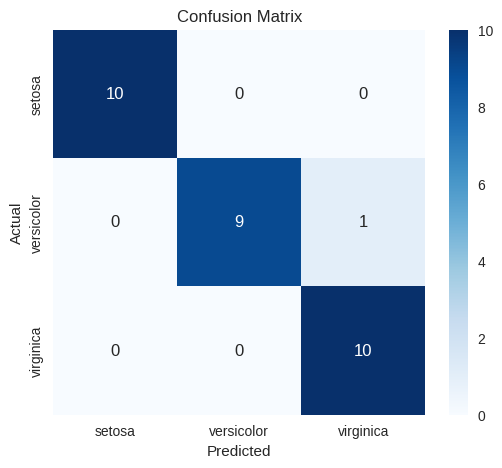

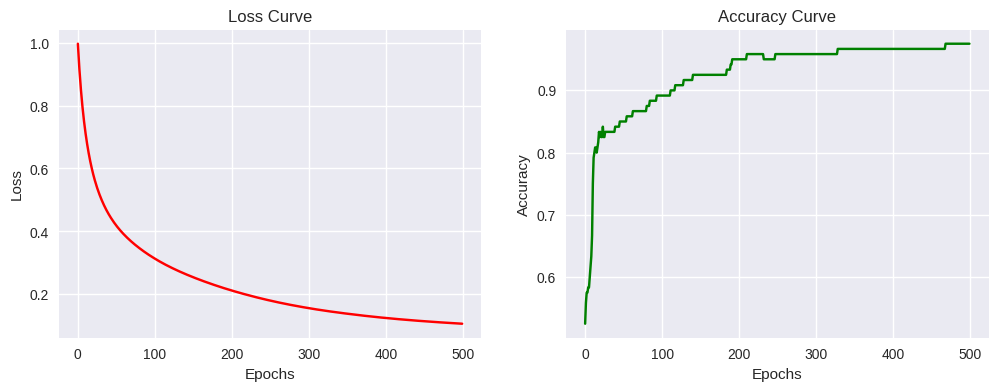

 Model saved to 'simple_nn_model1.npz'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Iris
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)
y_oh = encoder.fit_transform(y)

X_train, X_test, y_train_oh, y_test_oh = train_test_split(
    X, y_oh, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Optimized Neural Network
# -------------------------
class SimpleNN:
    def __init__(self, input_size=4, hidden_size=16, output_size=3, lr=0.05, l2_lambda=0.001):
        self.lr = lr
        self.l2_lambda = l2_lambda

        # Xavier initialization
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1/input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1/hidden_size)
        self.b2 = np.zeros((1, output_size))
        self.history = {'loss': [], 'acc': []}

    def relu(self, x):
        return np.maximum(0, x)
    def relu_derivative(self, x):
        return (x>0).astype(float)
    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / np.sum(e_x, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def compute_loss(self, y_pred, y_true):
        m = y_true.shape[0]
        eps = 1e-8
        loss = -np.sum(y_true * np.log(y_pred + eps)) / m
        loss += 0.5 * self.l2_lambda * (np.sum(self.W1**2) + np.sum(self.W2**2))
        return loss

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]
        dz2 = (y_pred - y_true)/m
        dW2 = self.a1.T @ dz2 + self.l2_lambda*self.W2
        db2 = np.sum(dz2, axis=0, keepdims=True)

        dz1 = dz2 @ self.W2.T * self.relu_derivative(self.z1)
        dW1 = X.T @ dz1 + self.l2_lambda*self.W1
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=500):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y_pred, y)
            self.backward(X, y, y_pred)
            acc = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y, axis=1))
            self.history['loss'].append(loss)
            self.history['acc'].append(acc)
            if epoch % 50 == 0:
                print(f"Epoch {epoch}: Loss={loss:.4f}, Acc={acc:.4f}")

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)
    def predict_proba(self, X):
        return self.forward(X)

# -------------------------
# Train
# -------------------------
model = SimpleNN()
model.train(X_train_scaled, y_train_oh, epochs=500)

# -------------------------
# Evaluate
# -------------------------
y_pred = model.predict(X_test_scaled)
y_true = np.argmax(y_test_oh, axis=1)
acc = accuracy_score(y_true, y_pred)
print(f"\n Test Accuracy: {acc:.4f}")
print(classification_report(y_true, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(model.history['loss'], color='red')
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.title("Loss Curve"); plt.grid(True)
plt.subplot(1,2,2)
plt.plot(model.history['acc'], color='green')
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.title("Accuracy Curve"); plt.grid(True)
plt.show()






# Save model weights and biases
np.savez("simple_nn_model1.npz",
         W1=model.W1,
         b1=model.b1,
         W2=model.W2,
         b2=model.b2)
print(" Model saved to 'simple_nn_model1.npz'")


# Saving The Model 

In [97]:
# Save model weights and biases
np.savez("simple_nn_model.npz",
         W1=model.W1,
         b1=model.b1,
         W2=model.W2,
         b2=model.b2)
print(" Model saved to 'simple_nn_model.npz'")


 Model saved to 'simple_nn_model.npz'


# Loading the model 

In [101]:
# Load model
data = np.load("simple_nn_model1.npz")

# Create model with correct dimensions
model_loaded = SimpleNN(input_size=4, hidden_size=16, output_size=3)

# Load weights and biases
model_loaded.W1 = data['W1']
model_loaded.b1 = data['b1']
model_loaded.W2 = data['W2']
model_loaded.b2 = data['b2']

print(" Model loaded successfully!")

# Test loaded model
y_pred_loaded = model_loaded.predict(X_test_scaled)
acc_loaded = accuracy_score(np.argmax(y_test_oh, axis=1), y_pred_loaded)
print(f" Loaded Model Test Accuracy: {acc_loaded:.4f}")


 Model loaded successfully!
 Loaded Model Test Accuracy: 0.9667
